# Getting Courses
---

Set username and password if you want to login automatically. Not required.

In [1]:
USERNAME = ""
PASSWORD = ""

Log into temple and wait for the request session to be created.

In [2]:
from temple.planner import TUPlanner

planner = TUPlanner(username=USERNAME, password=PASSWORD)

Once the session has been created, execute the cell below to get the code for the term you are planning course for.

In [3]:
planner.print_terms(3)

CODE: 202503, TITLE: 2025 Spring
CODE: 202436, TITLE: 2024 Fall
CODE: 202426, TITLE: 2024 Summer II


Once you have retrieved the term code, update the `TERM_CODE` variable with the code and specify which courses you are planning to take.

In [4]:
TERM_CODE = 202503

# Plotting Courses
---

In [28]:
# SELECTED_COURSES = ["MATH2043", "IH0851", "CIS1068", "MATH2101"] # "CIS2033"
SELECTED_COURSES = ["MATH2043", "IH0851", "CIS1068", "ECON0858"] # "CIS2033"
# SELECTED_COURSES = ["CIS1057", "CIS1166", "ENG0802", "CIS1001", "SCTC1001"]

In [29]:

import json


planner.waitlist(False)
planner.select_term(TERM_CODE)
planner.select_courses(SELECTED_COURSES)
# planner.filter_sections({
#     "MATH2101": ["001"]
# })
# planner.filter_teachers({
#     "MATH2101": ["Erik Wallace"]
# })

def f(_s: any):
    if _s["subjectCourse"] == "IH0851":
        if _s["instructionalMethod"] == "OLL":
            print(_s)
        return _s["instructionalMethod"] == "OLL"
    return True

planner.set_filter(f)


planner.get_course_sections.cache_clear()
# planner.set_filter(lambda s: s["sequenceNumber"] == "001")

schedule_combos = planner.get_combinations()

# print(json.dumps(schedule_combos, indent=4))

# print(json.dumps(a.get_schema(), indent=4))

# print(a.get_teacher("VGVhY2hlci0xMDA4OTk="))

# print(json.dumps(a.get_schools("Temple University"), indent=4))
# print(json.dumps(a.get_teachers("John Davies", "U2Nob29sLTk5OQ=="), indent=4))
# print(json.dumps(a.get_teacher_rating("VGVhY2hlci0xMDA4OTk="), indent=4))


# for teacher in a.get_teachers("John Davies", "U2Nob29sLTk5OQ==", offset=-1):
#     print(teacher)

{'id': 854509, 'term': '202503', 'termDesc': '2025 Spring', 'courseReferenceNumber': '42936', 'partOfTerm': '1', 'courseNumber': '0851', 'subject': 'IH', 'subjectDescription': 'Intellectual Heritage', 'sequenceNumber': '703', 'campusDescription': 'Main', 'scheduleTypeDescription': 'Base Lecture', 'courseTitle': 'Intellectual Heritage I: The Good Life', 'creditHours': None, 'maximumEnrollment': 28, 'enrollment': 11, 'seatsAvailable': 17, 'waitCapacity': 5, 'waitCount': 0, 'waitAvailable': 5, 'crossList': None, 'crossListCapacity': None, 'crossListCount': None, 'crossListAvailable': None, 'creditHourHigh': None, 'creditHourLow': 3, 'creditHourIndicator': None, 'openSection': True, 'linkIdentifier': None, 'isSectionLinked': False, 'subjectCourse': 'IH0851', 'faculty': [{'bannerId': '193538', 'category': None, 'class': 'net.hedtech.banner.student.faculty.FacultyResultDecorator', 'courseReferenceNumber': '42936', 'displayName': 'Gary D. Pratt', 'emailAddress': 'gpratt@temple.edu', 'primaryI

In [30]:
from temple.schedule import Schedule, ScheduleCompare



schedules = set(Schedule(schedule) for schedule in schedule_combos)
schedules = sorted(filter(ScheduleCompare.not_overlap, schedules), key=lambda x: (100000 - ScheduleCompare.teacher_rating(x, penalty_rating=0.0, penalty_num_ratings=100.0), ScheduleCompare.between_total(x)))
# schedules = list(schedules)[:5]
print(len(schedules))

105


In [8]:
# import json

# for schedule in schedules:
#     for class_type, class_list in schedule.classes.items():
#         for cls in class_list:
#             cls.info["faculty"] = None
#             print(json.dumps(cls.info, indent=4))

In [31]:
for i in range(len(schedules)):
    print(i)
    found = set()
    for class_type in dict(sorted(schedules[i].classes.items(), key=lambda t: t[0])).values():
        for _class in sorted(class_type, key=lambda c: c.subject_course):
            if _class.subject_course not in found:
                found.add(_class.subject_course)
                teachers = _class.get_teachers()
                if len(teachers) == 0:
                    print("  ", _class.subject_course, _class.section, "Teacher(Unknown)")
                else:
                    for _teacher in teachers:
                            print("  ", _class.subject_course, _class.section, _teacher)
    print("  ", "RATING:", ScheduleCompare.teacher_rating(schedules[i], penalty_rating=0.0, penalty_num_ratings=100.0))

0
   CIS1068 007 Teacher(John Fiore, 4.4, 98)
   ECON0858 002 Teacher(Unknown)
   MATH2043 001 Teacher(Farzana Chaudhry, 3.4000000000000004, 102)
   IH0851 707 Teacher(Rebekah Zhuraw, 3.8000000000000003, 100)
   RATING: 2.895
1
   CIS1068 001 Teacher(John Fiore, 4.4, 98)
   ECON0858 002 Teacher(Unknown)
   MATH2043 001 Teacher(Farzana Chaudhry, 3.4000000000000004, 102)
   IH0851 707 Teacher(Rebekah Zhuraw, 3.8000000000000003, 100)
   RATING: 2.895
2
   CIS1068 002 Teacher(John Fiore, 4.4, 98)
   ECON0858 003 Teacher(Unknown)
   MATH2043 001 Teacher(Farzana Chaudhry, 3.4000000000000004, 102)
   IH0851 707 Teacher(Rebekah Zhuraw, 3.8000000000000003, 100)
   RATING: 2.895
3
   CIS1068 002 Teacher(John Fiore, 4.4, 98)
   ECON0858 002 Teacher(Unknown)
   MATH2043 001 Teacher(Farzana Chaudhry, 3.4000000000000004, 102)
   IH0851 707 Teacher(Rebekah Zhuraw, 3.8000000000000003, 100)
   RATING: 2.895
4
   CIS1068 001 Teacher(John Fiore, 4.4, 98)
   ECON0858 001 Teacher(Unknown)
   MATH2043 003 T

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


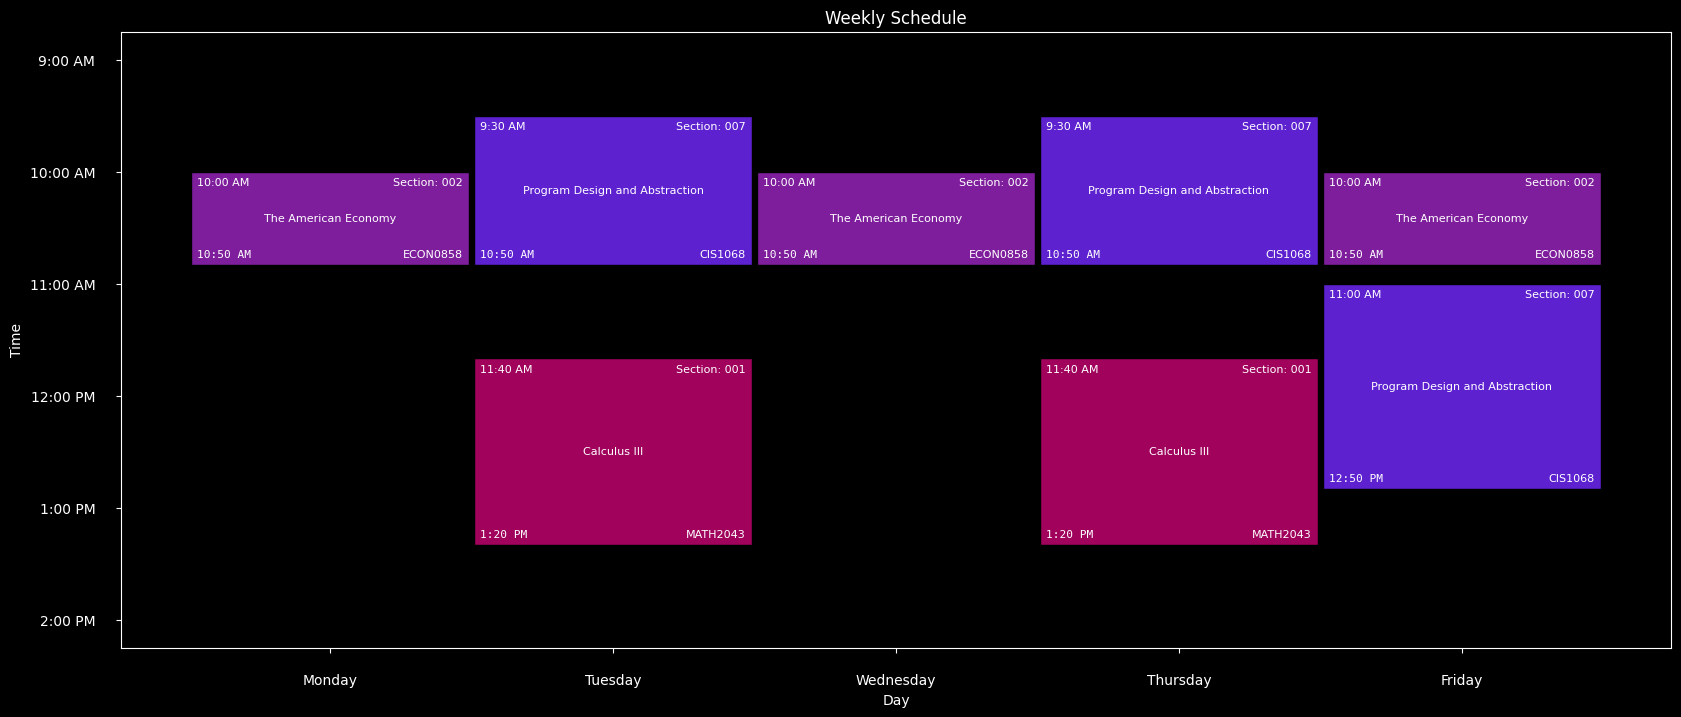

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


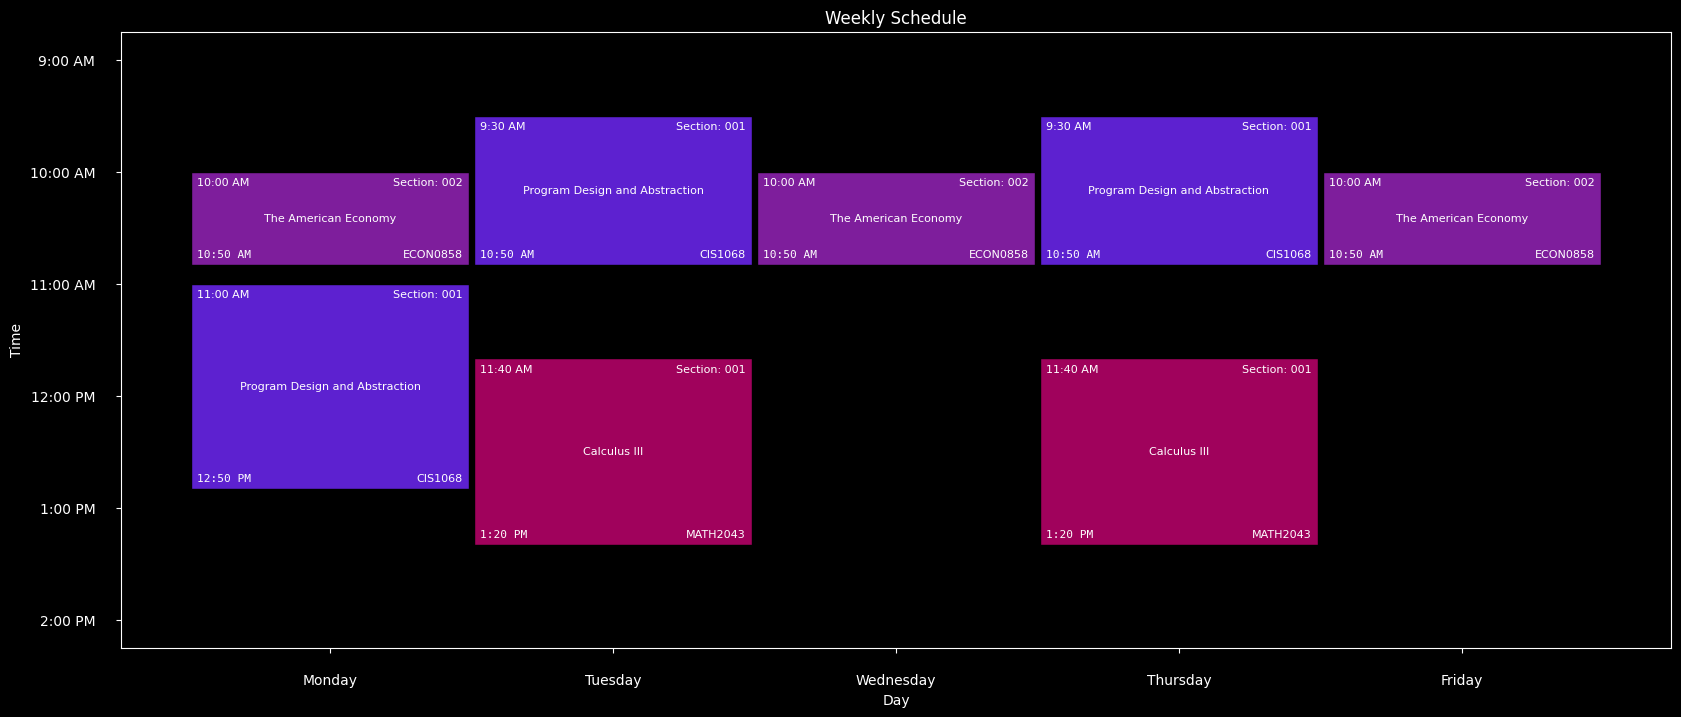

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 13.17 hrs, BREAK_TOTAL: 2.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


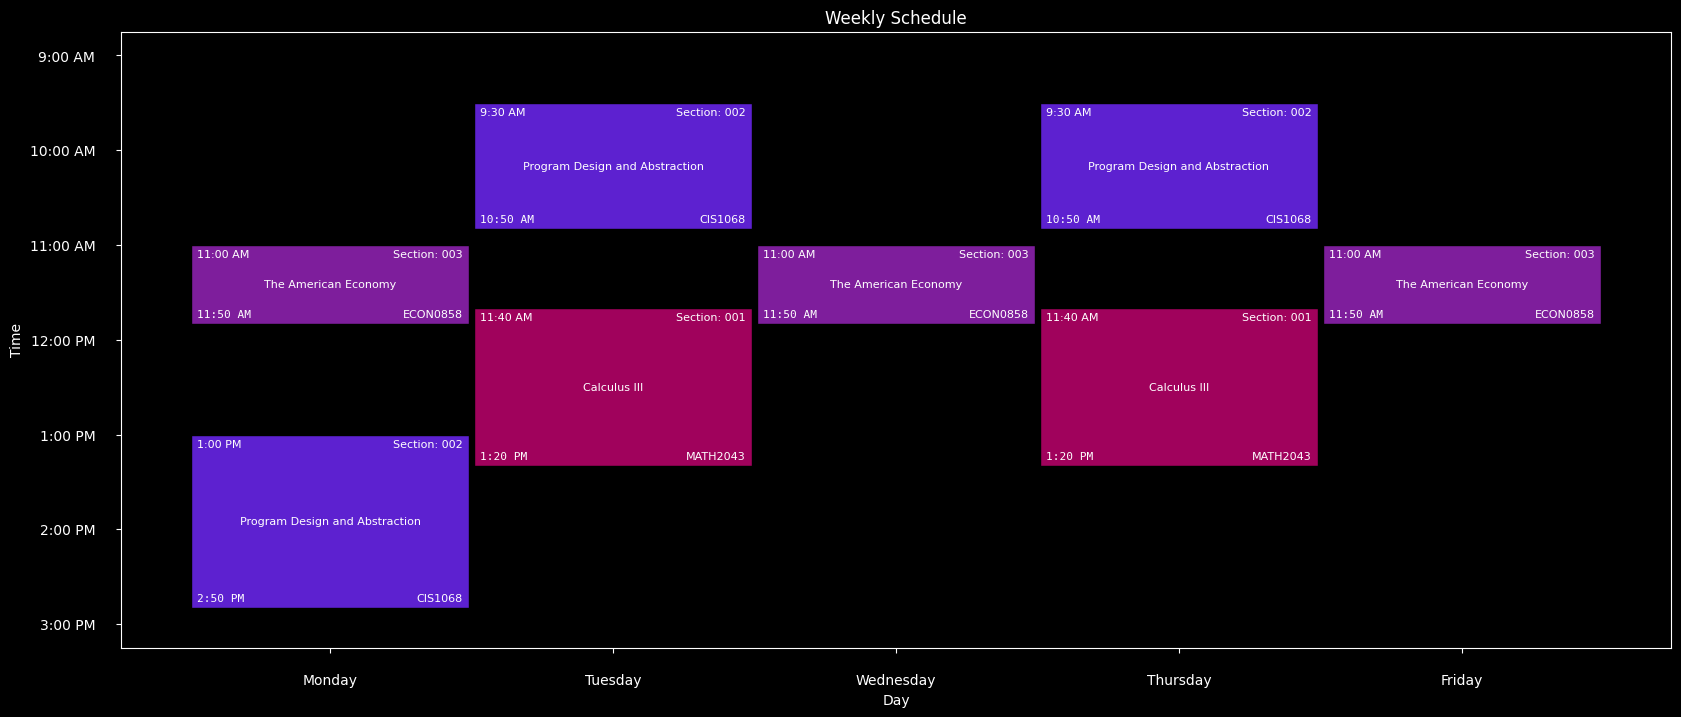

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 14.17 hrs, BREAK_TOTAL: 3.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


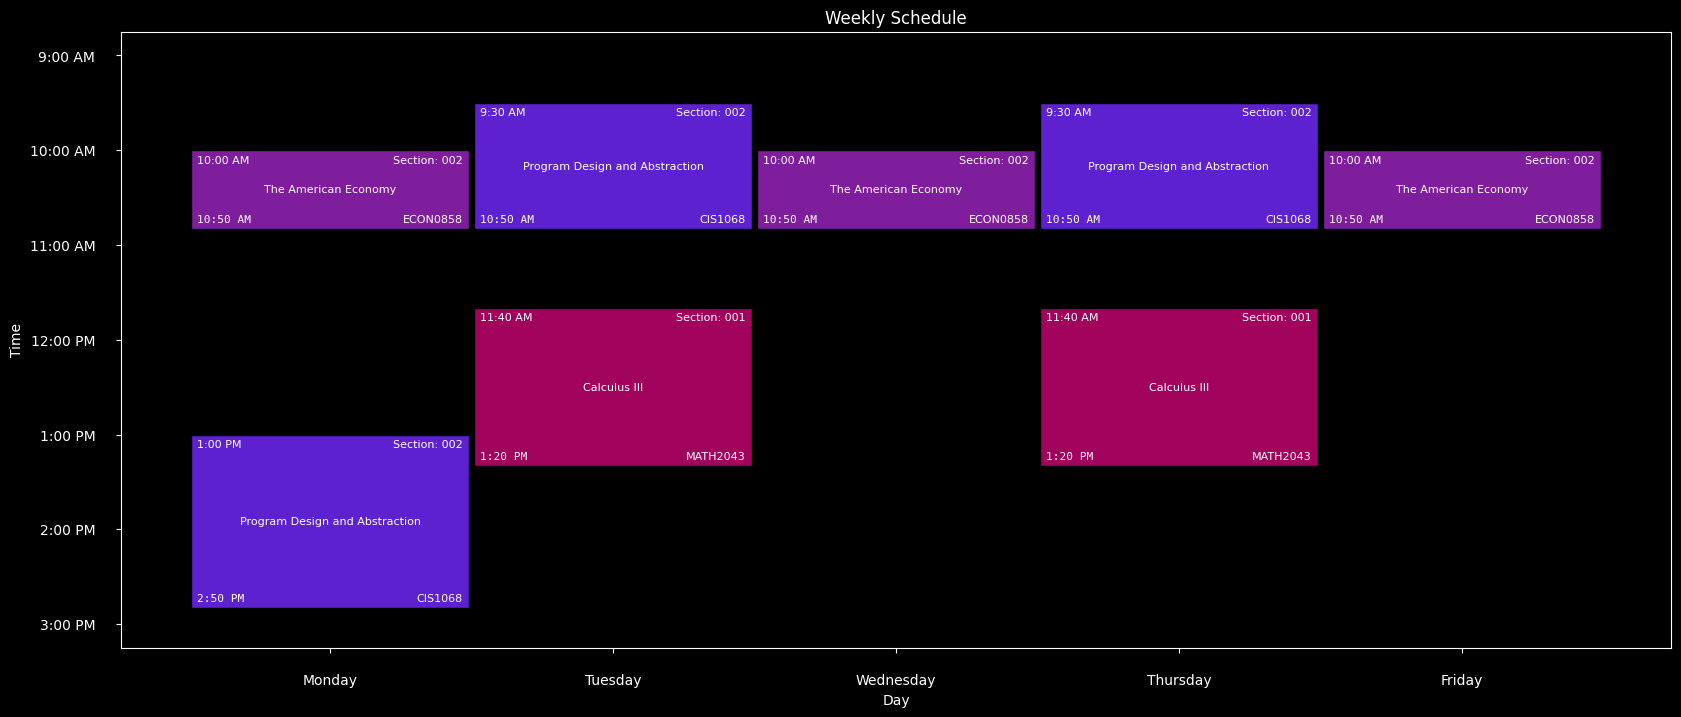

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


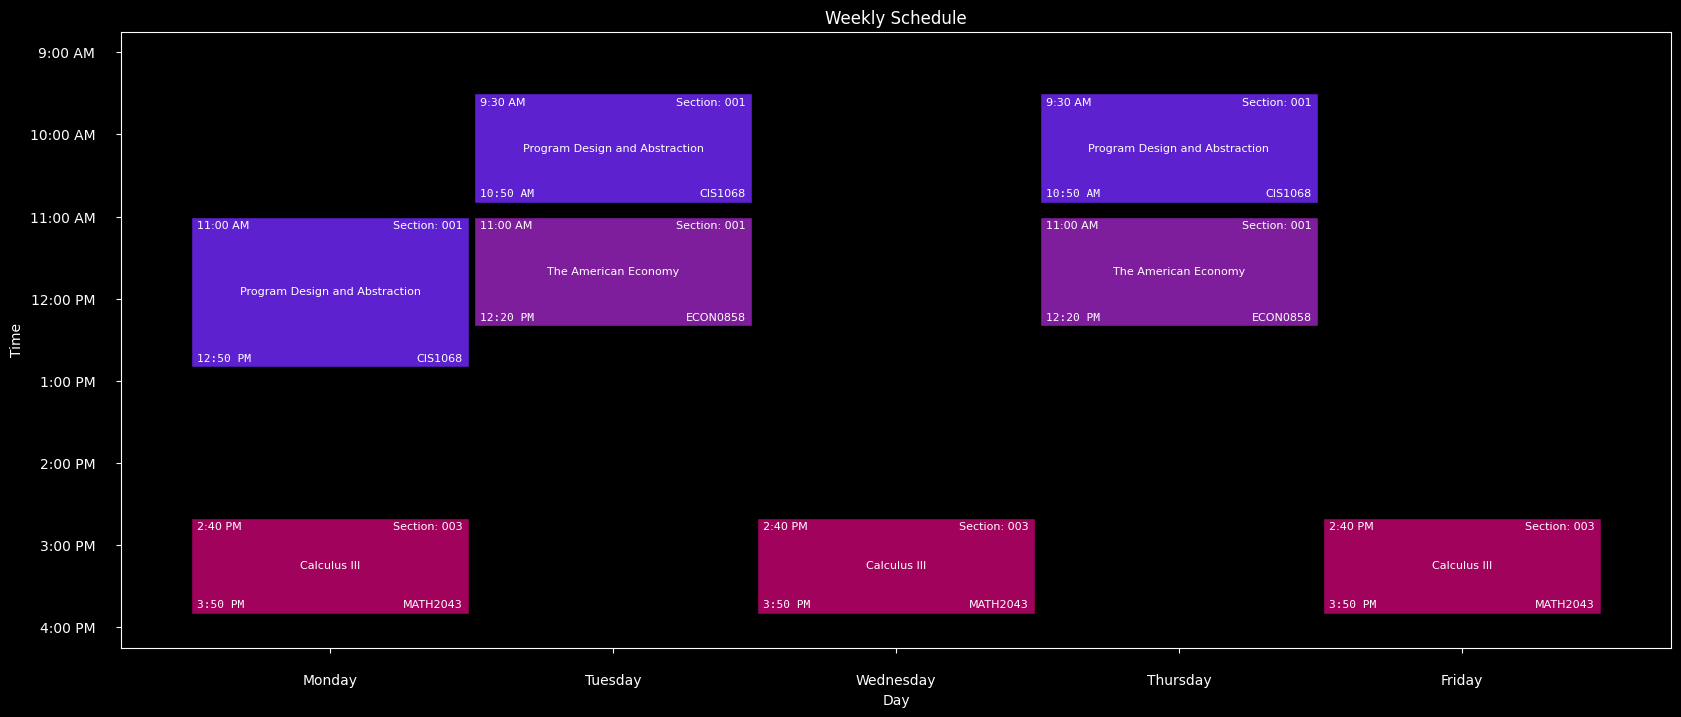

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


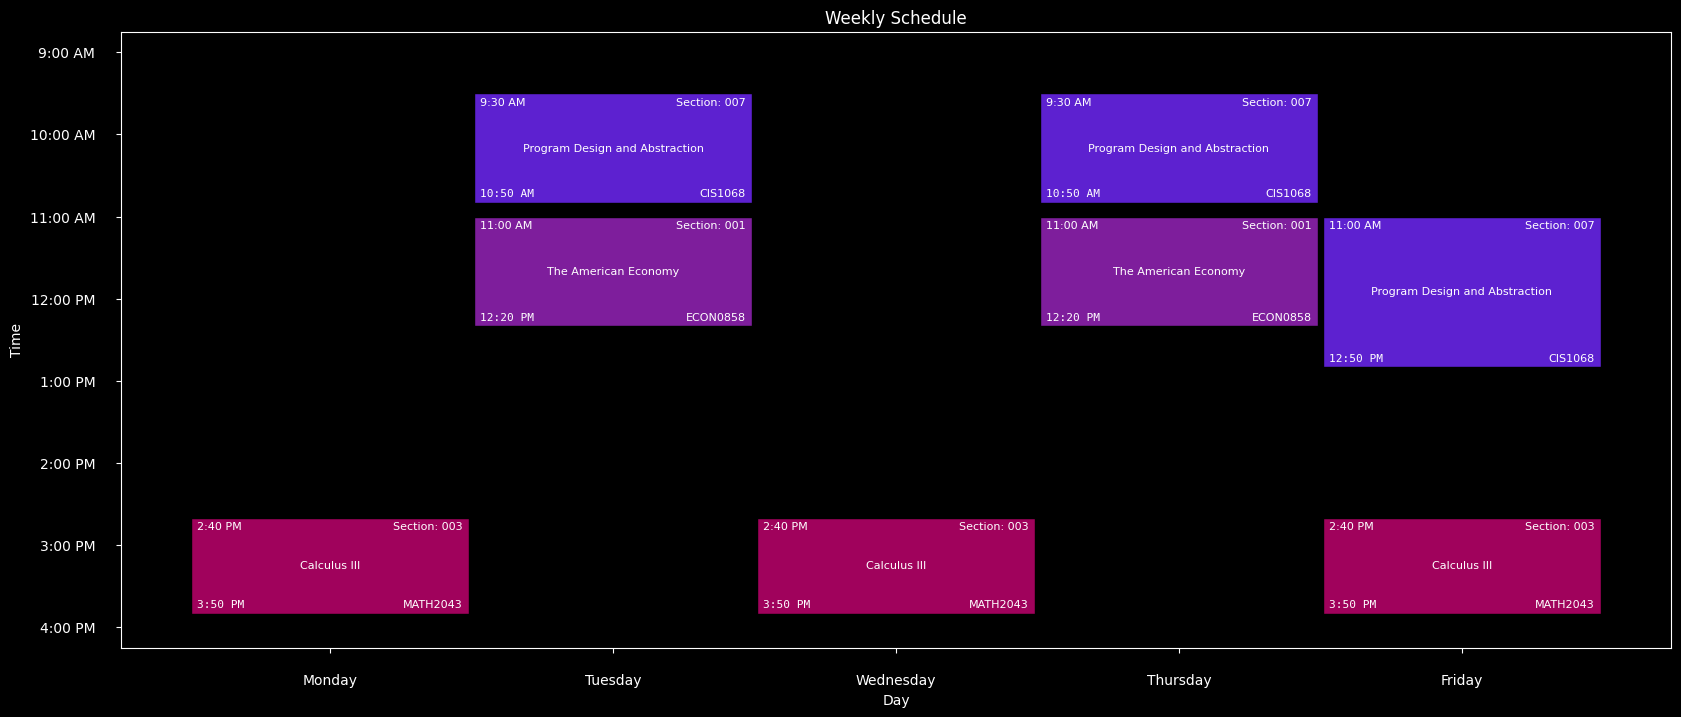

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


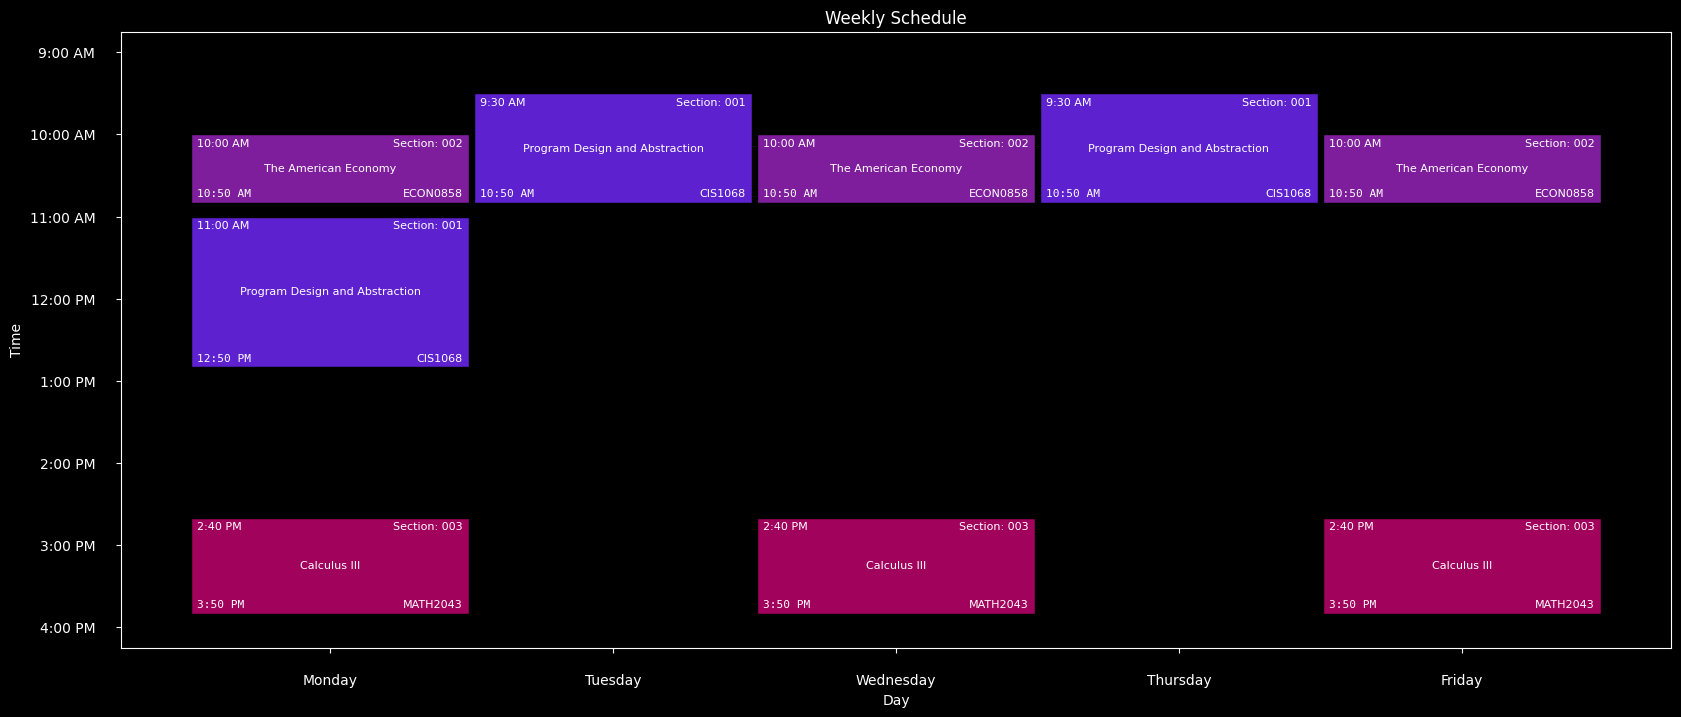

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


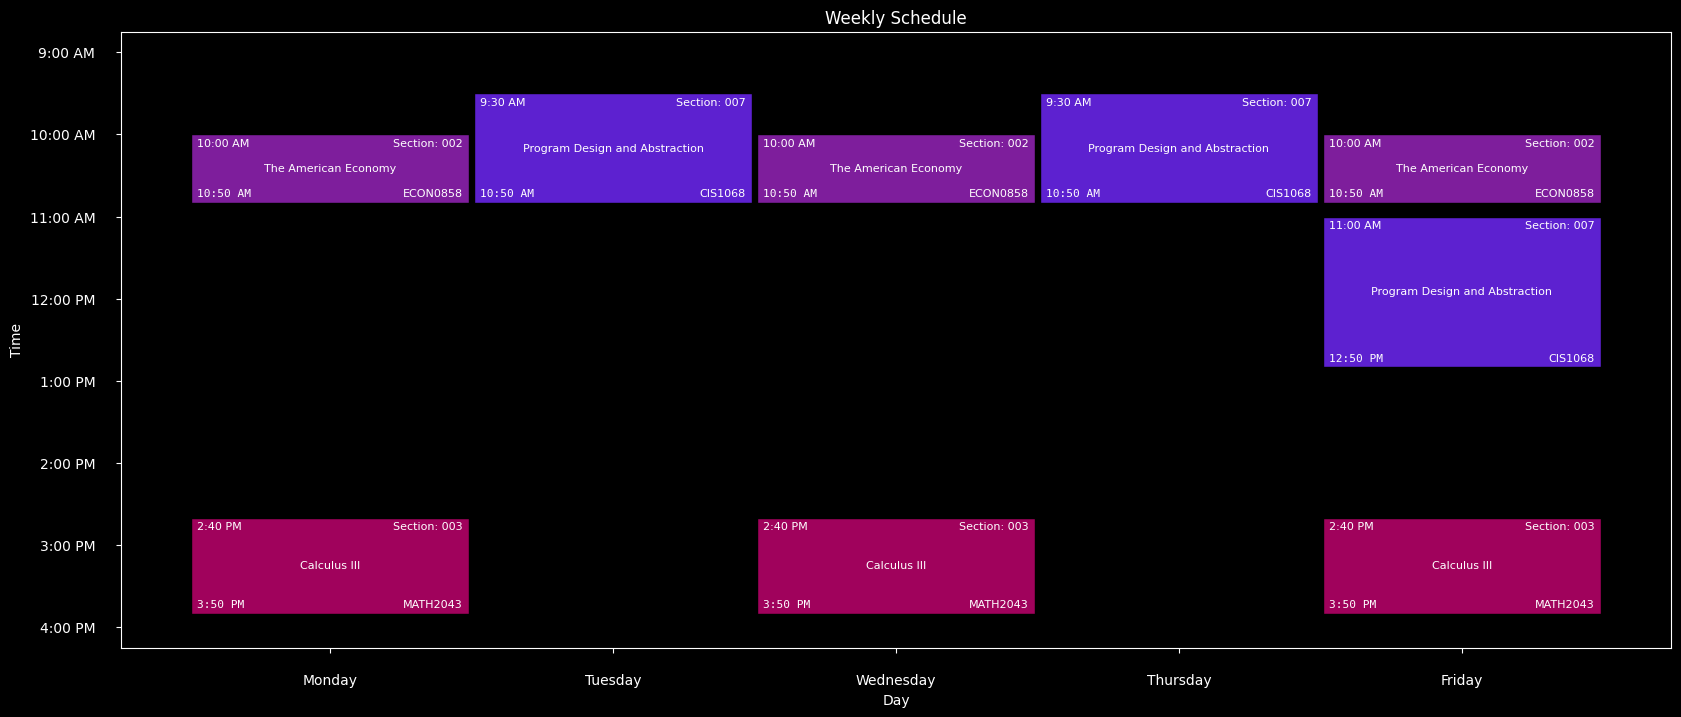

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


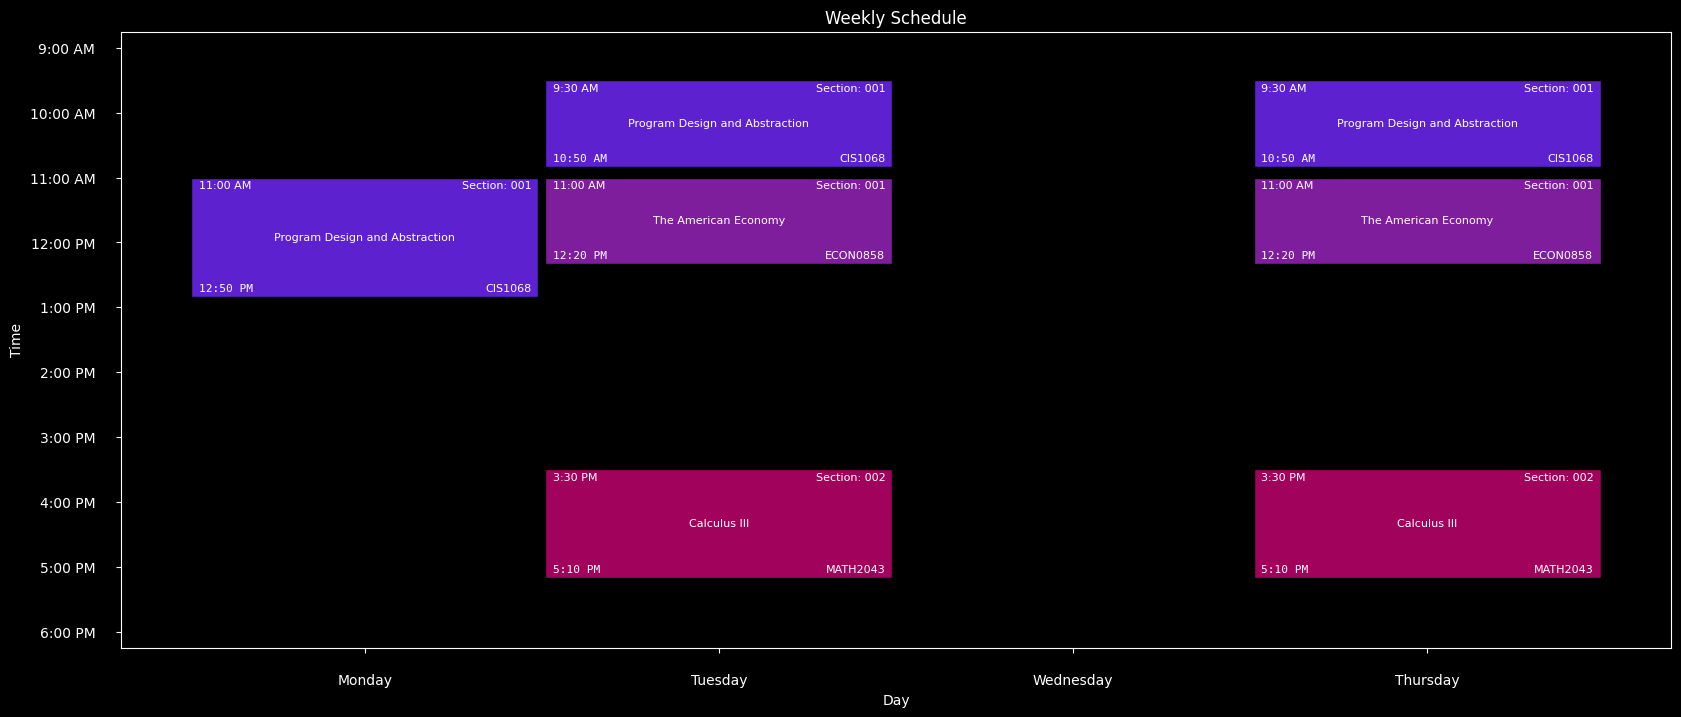

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


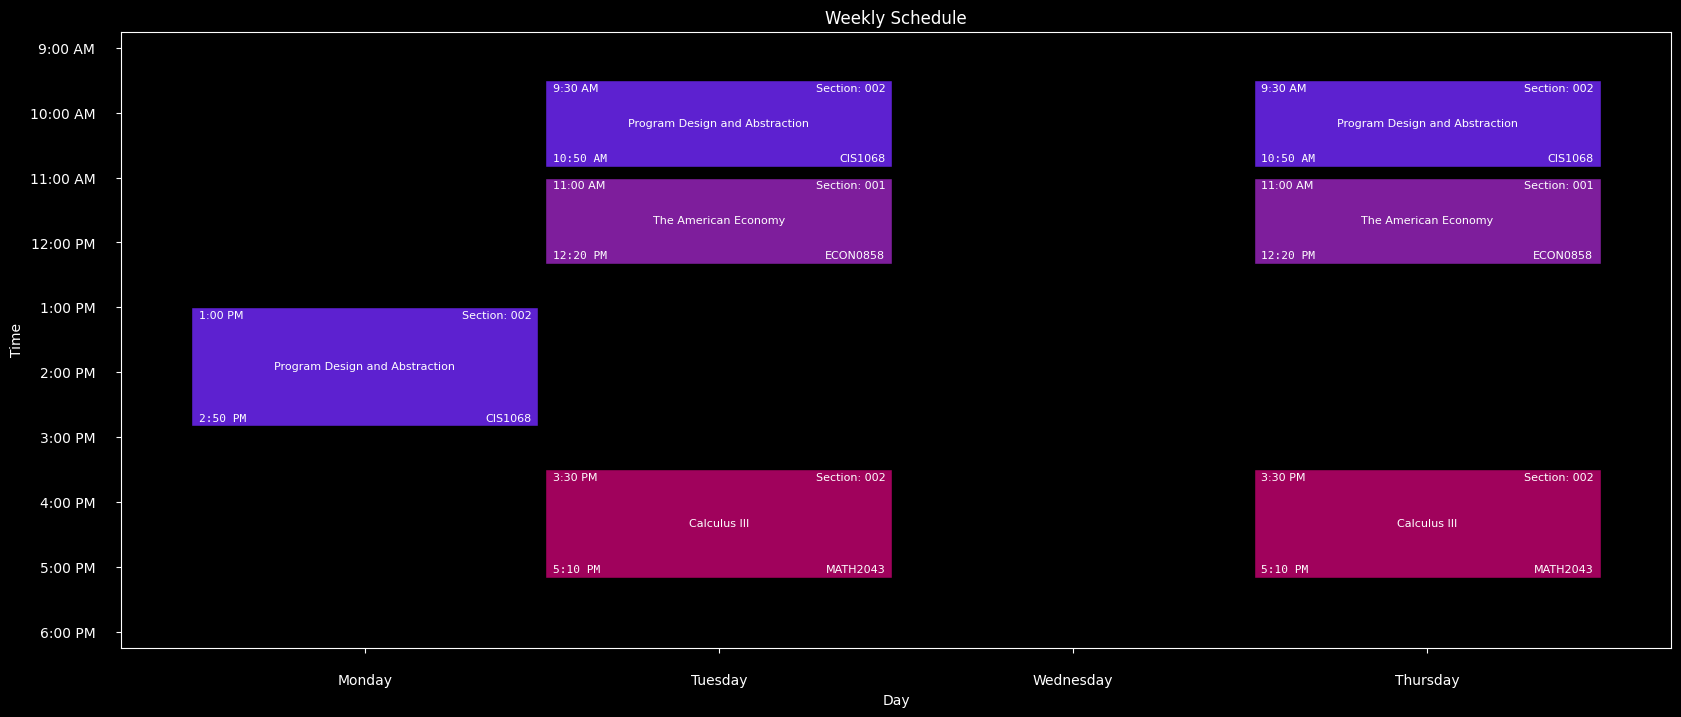

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


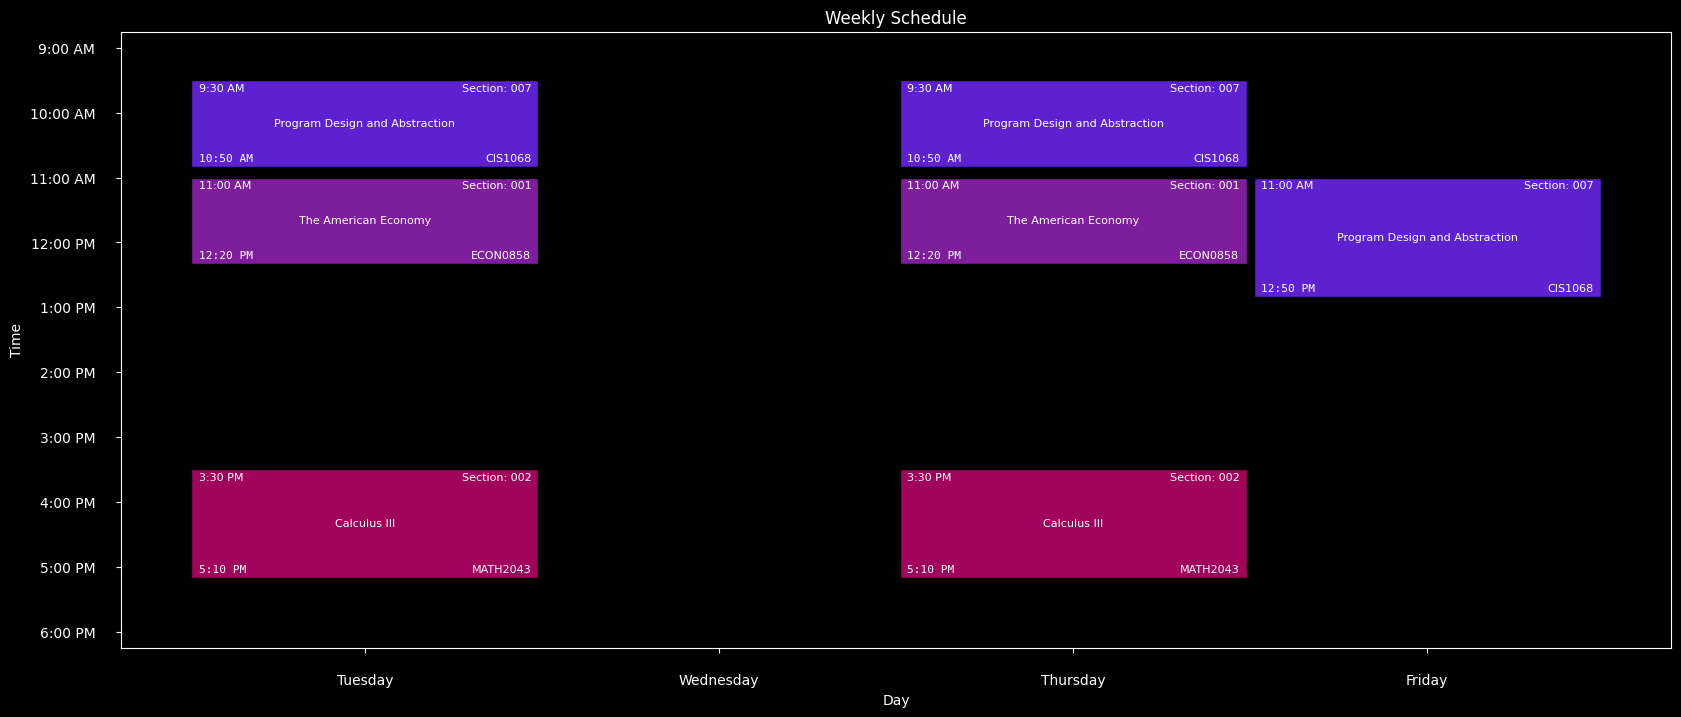

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


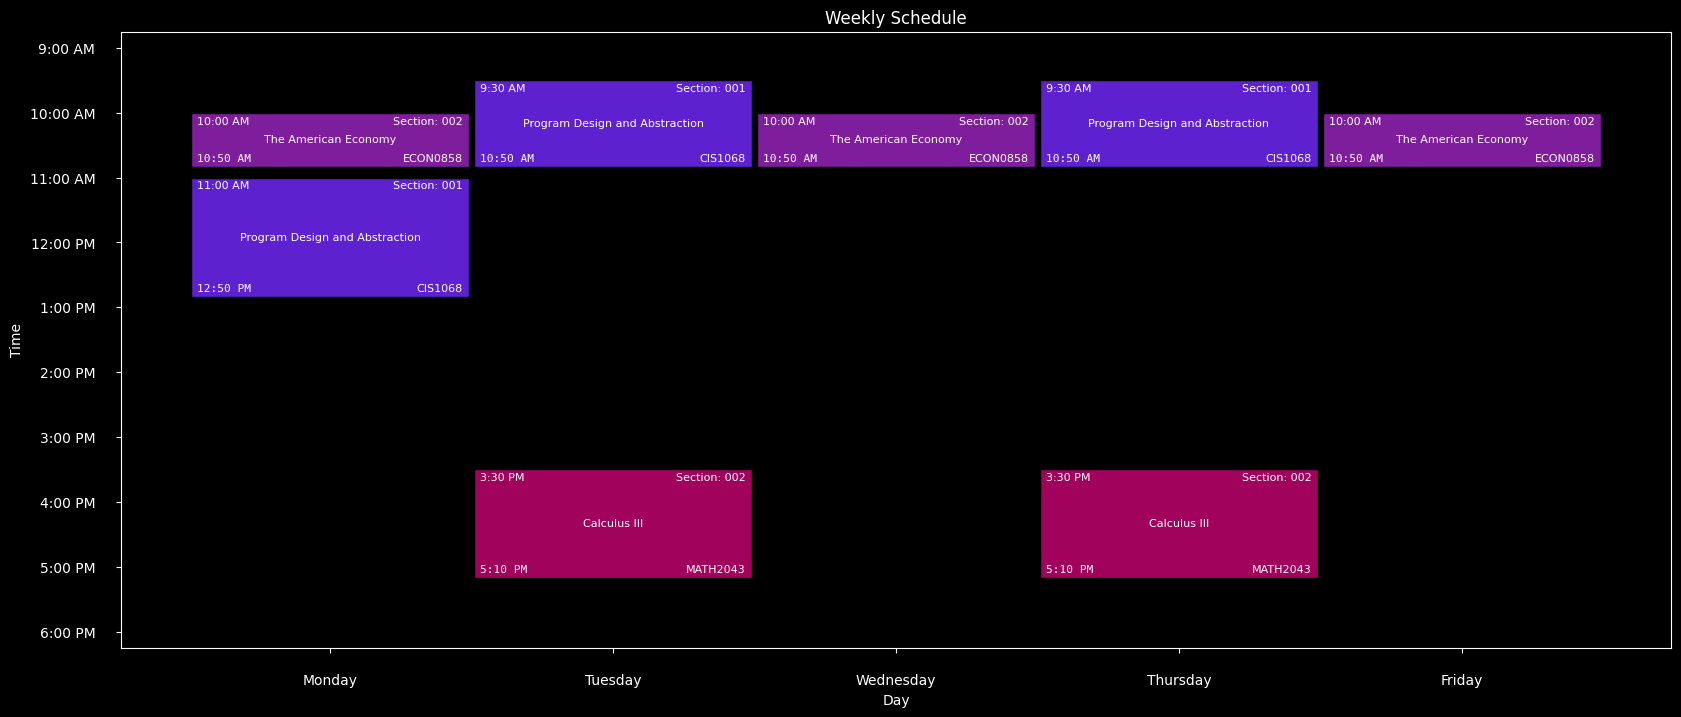

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


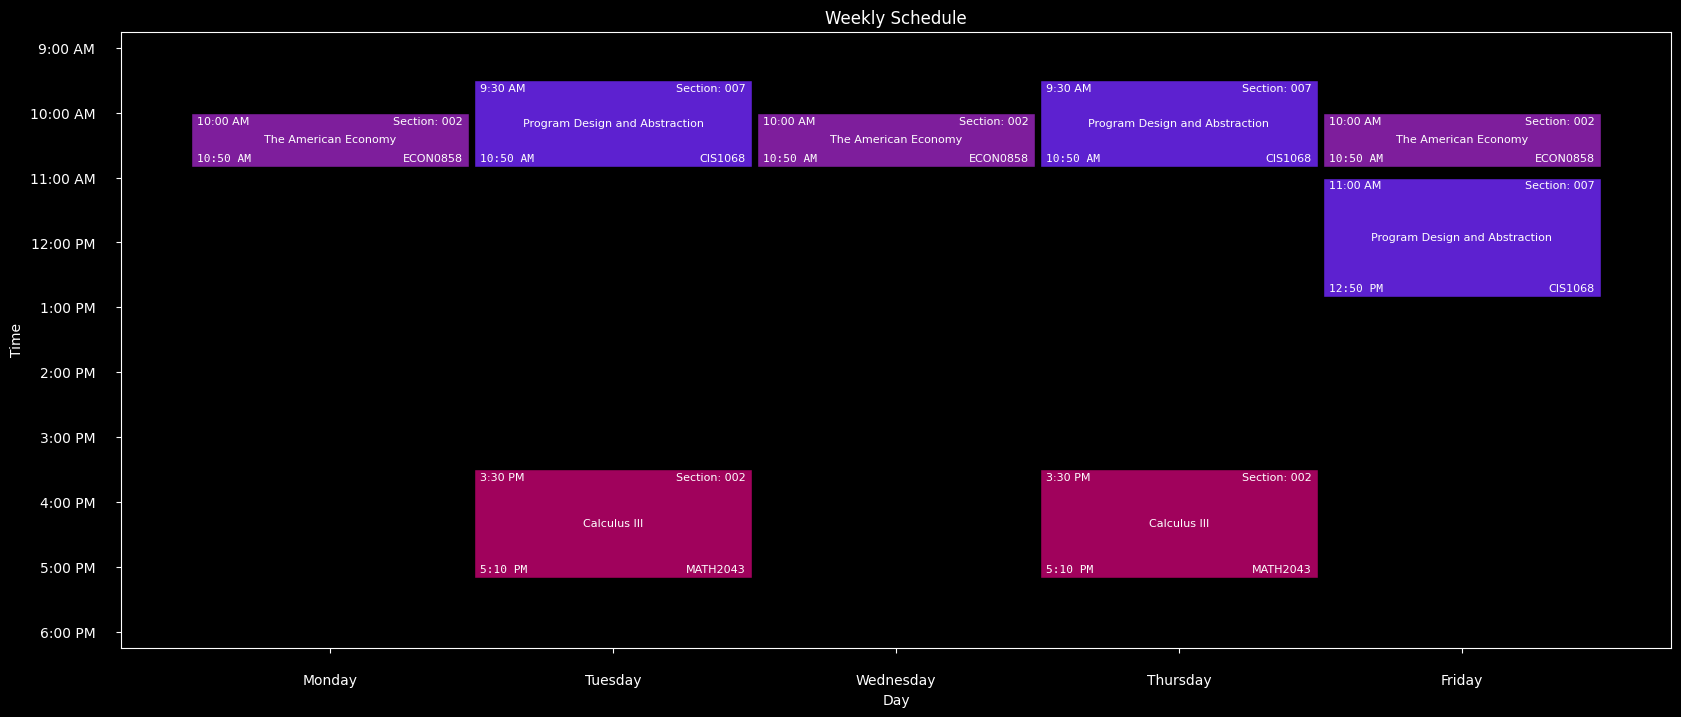

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 20.83 hrs, BREAK_TOTAL: 10.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


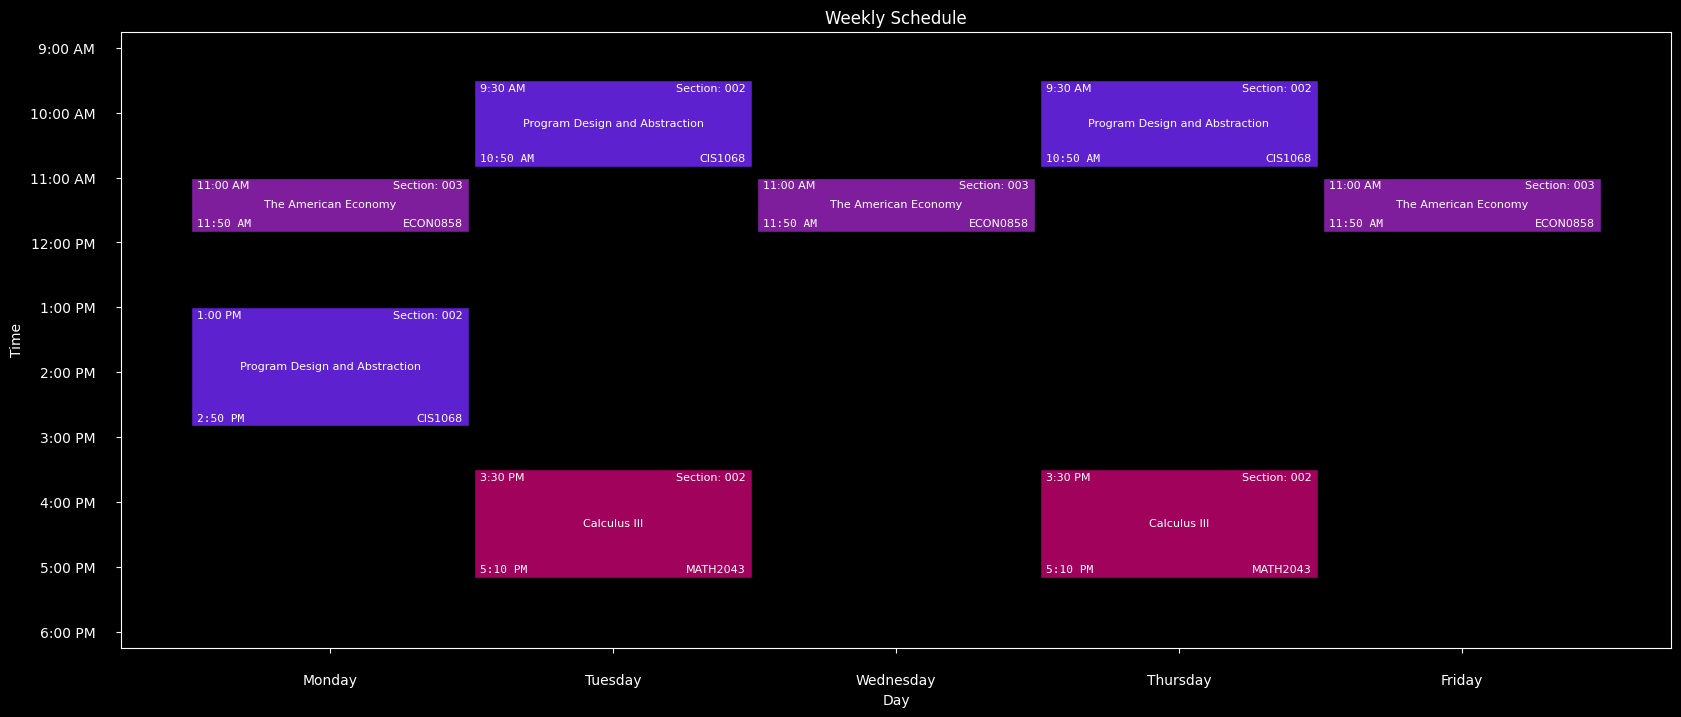

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 21.83 hrs, BREAK_TOTAL: 11.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 707 | Rebekah Zhuraw | 3.80 | Online | 3 |


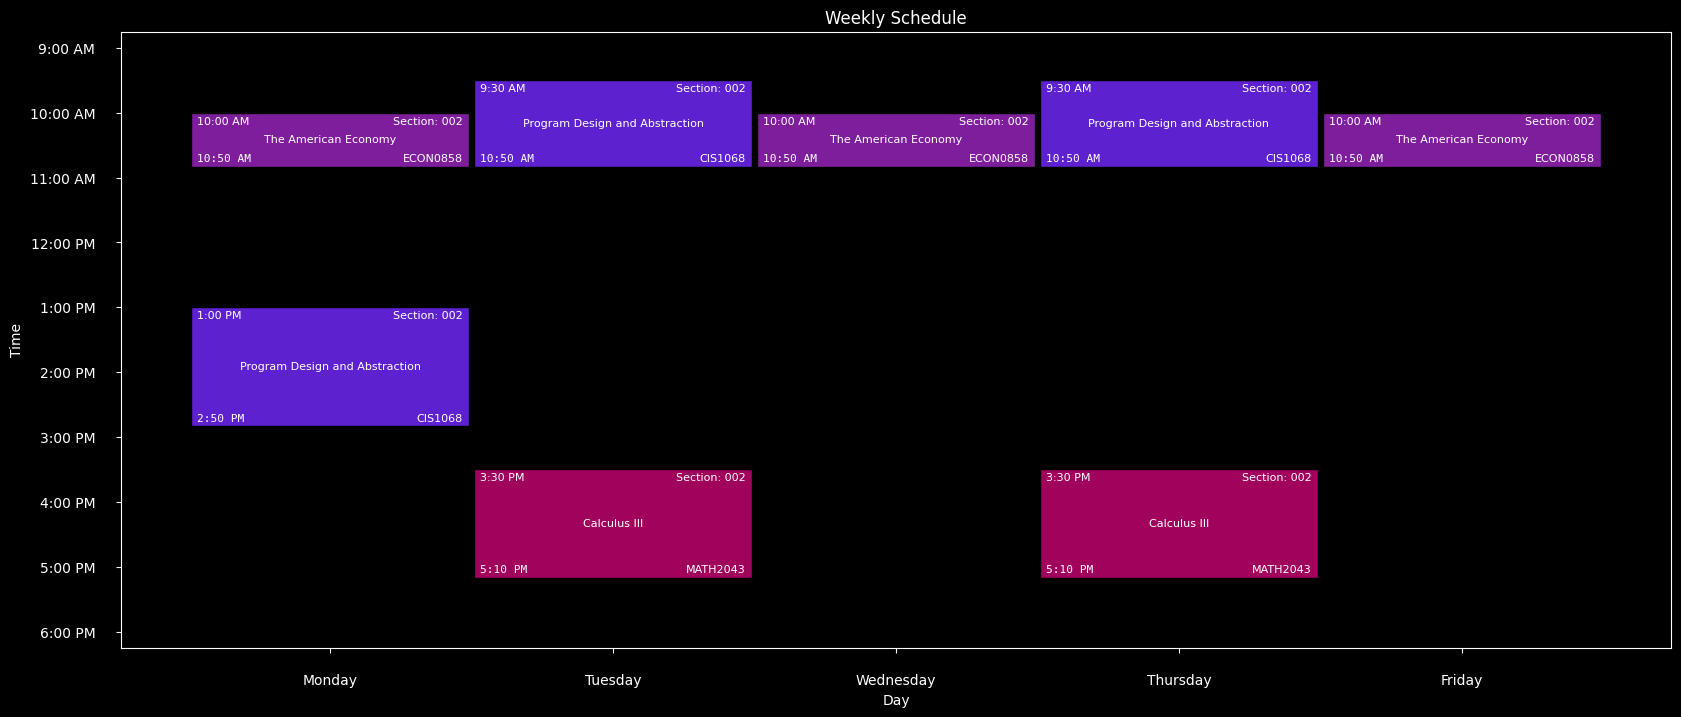

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


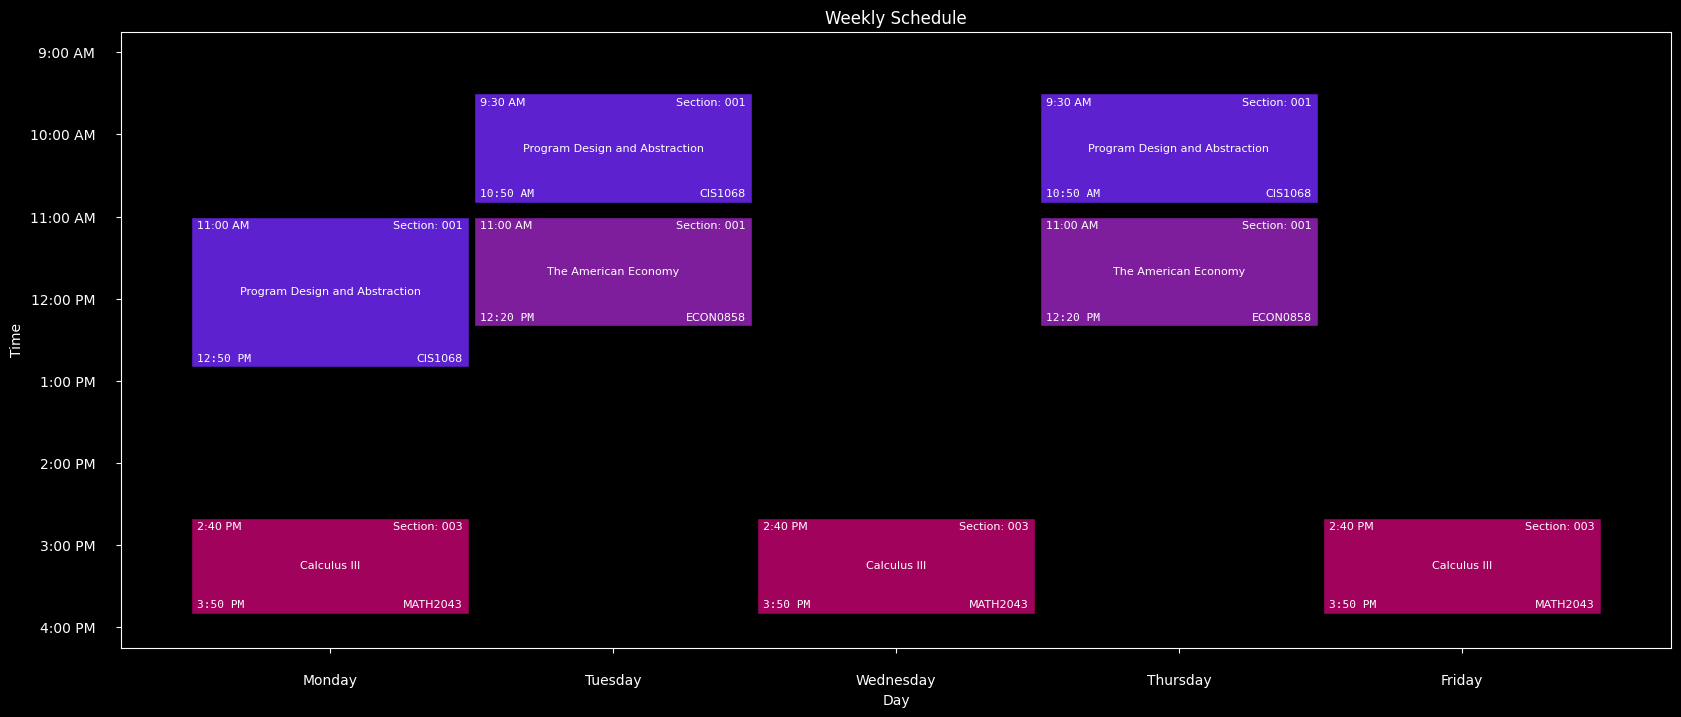

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


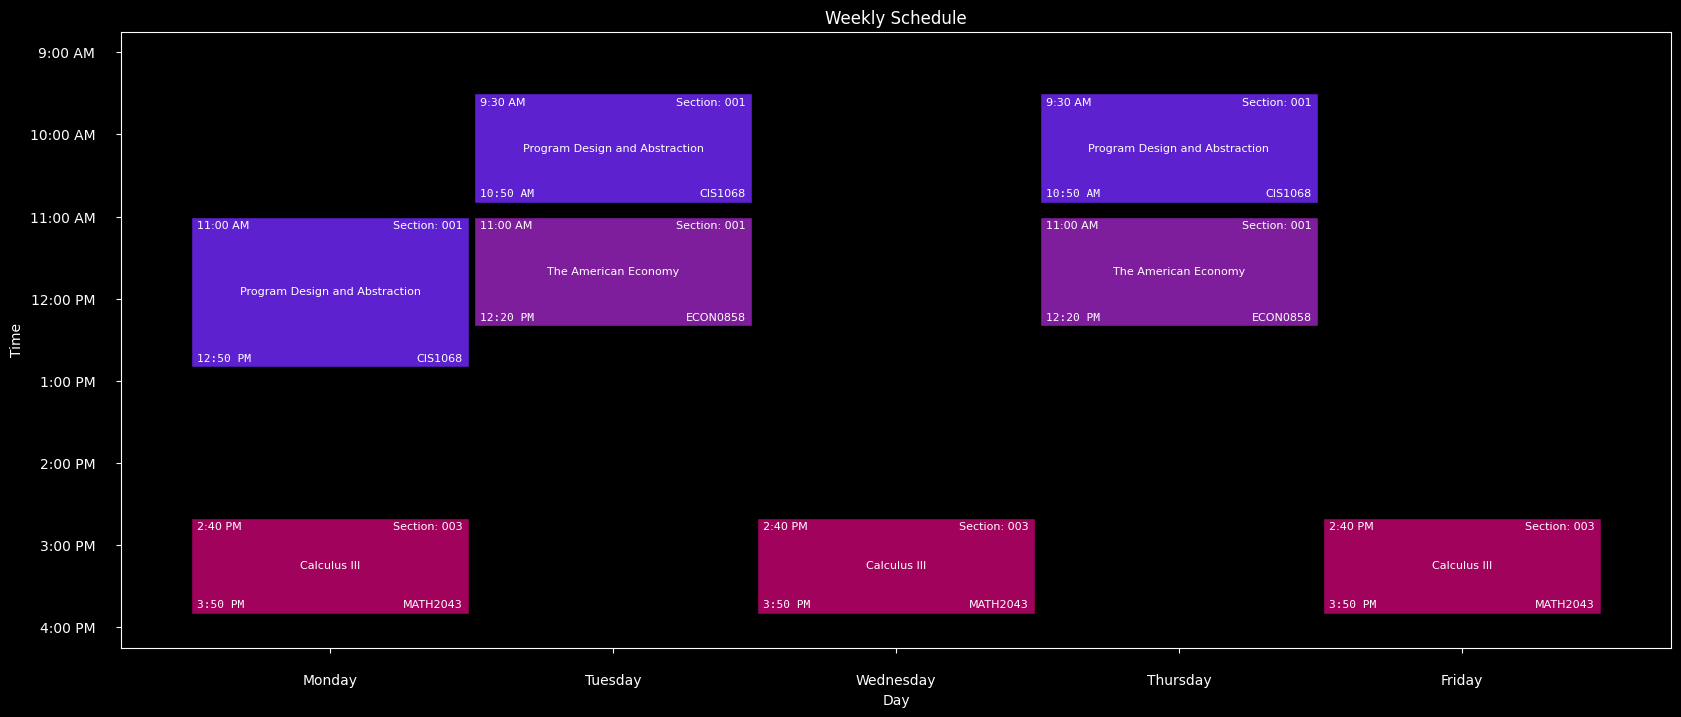

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


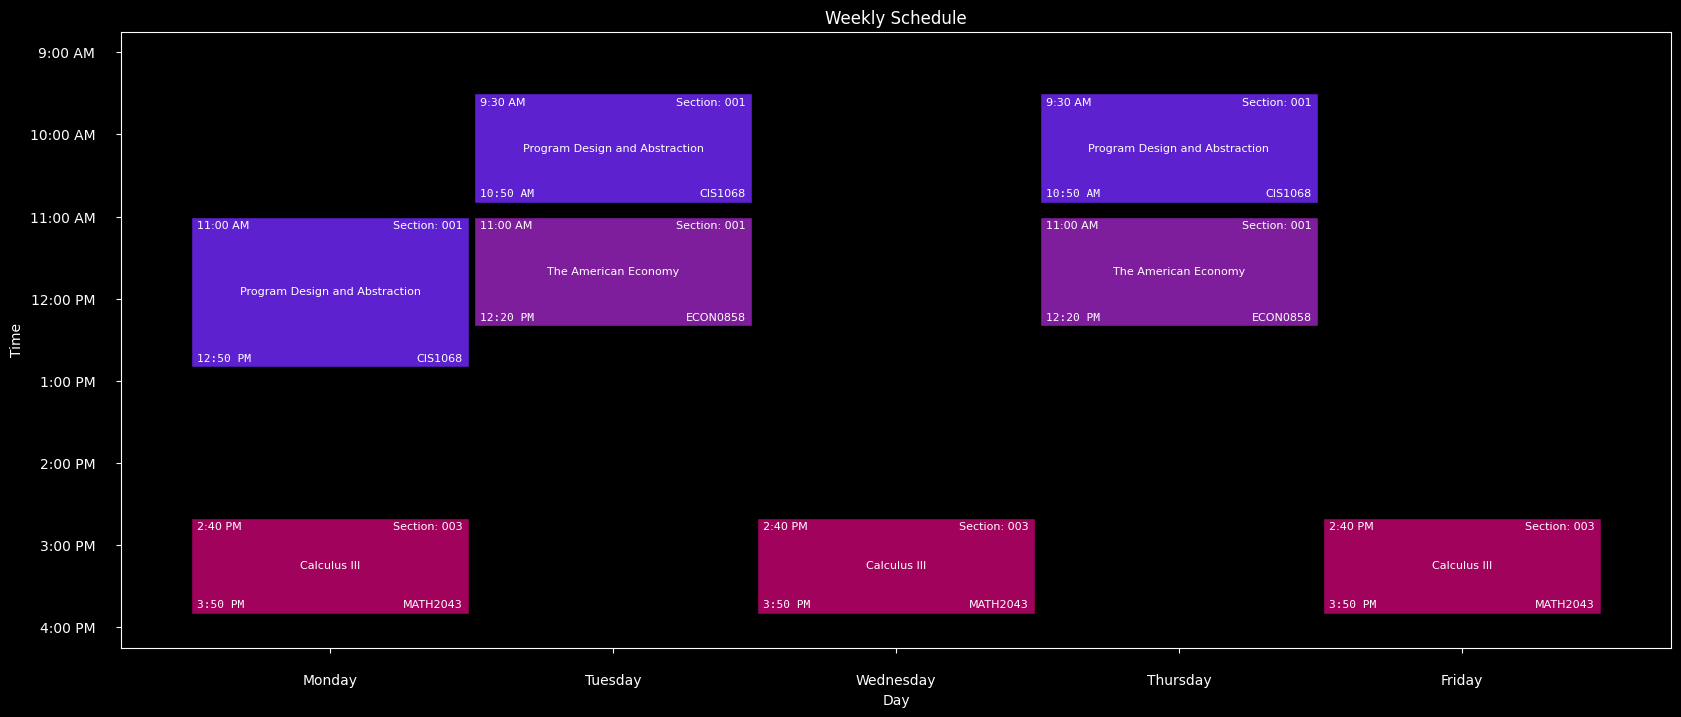

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


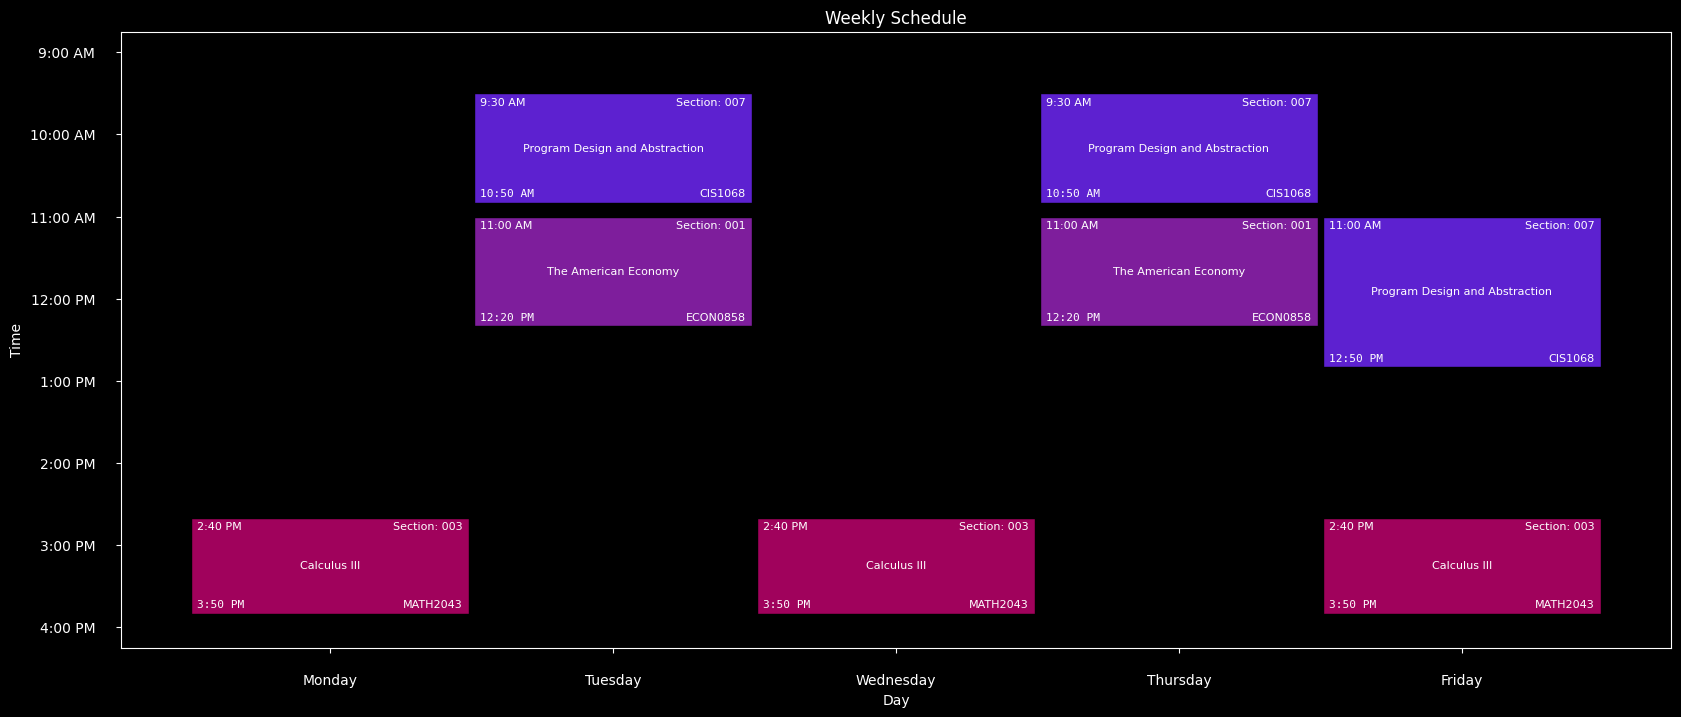

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


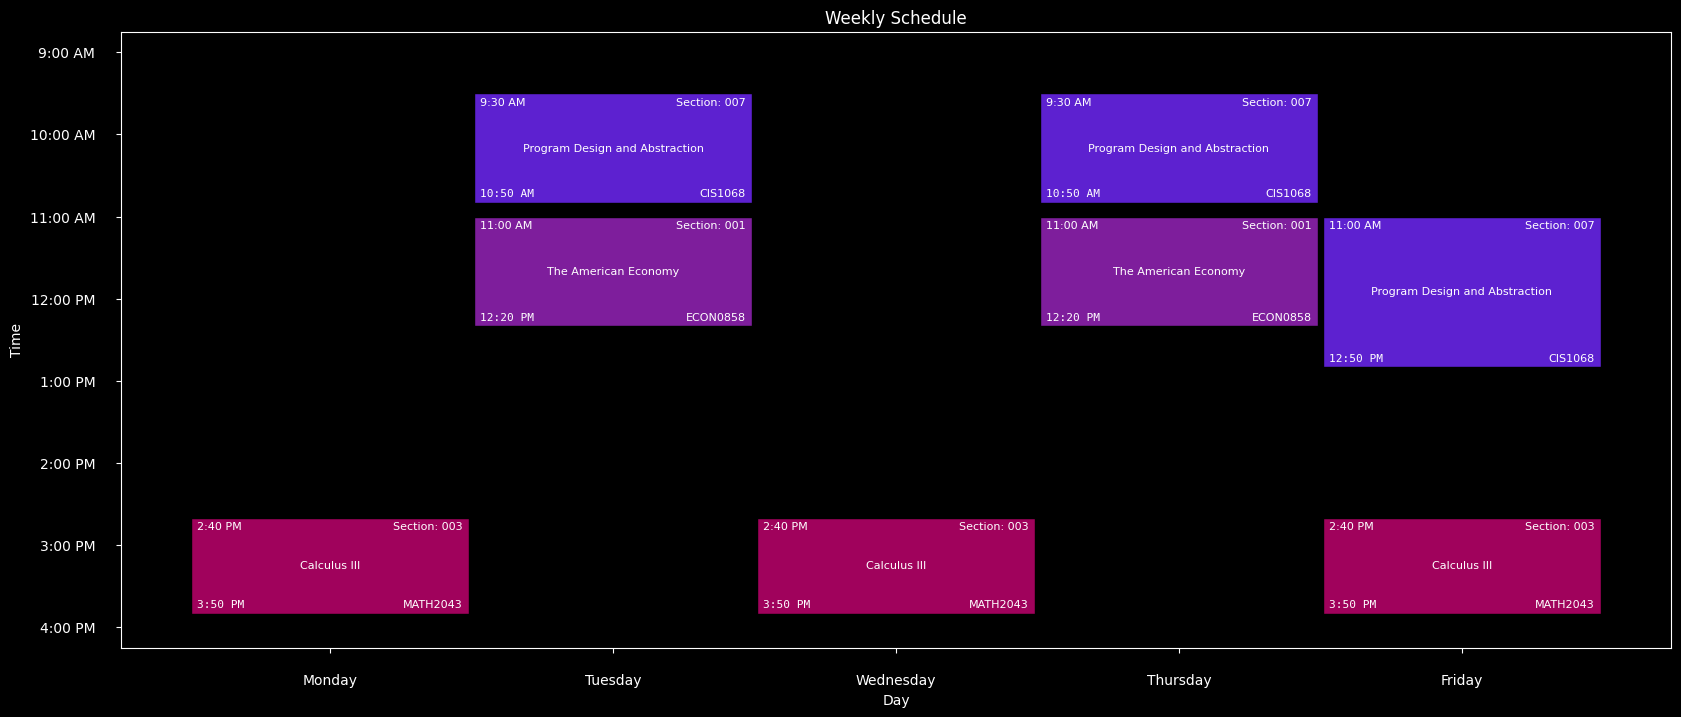

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


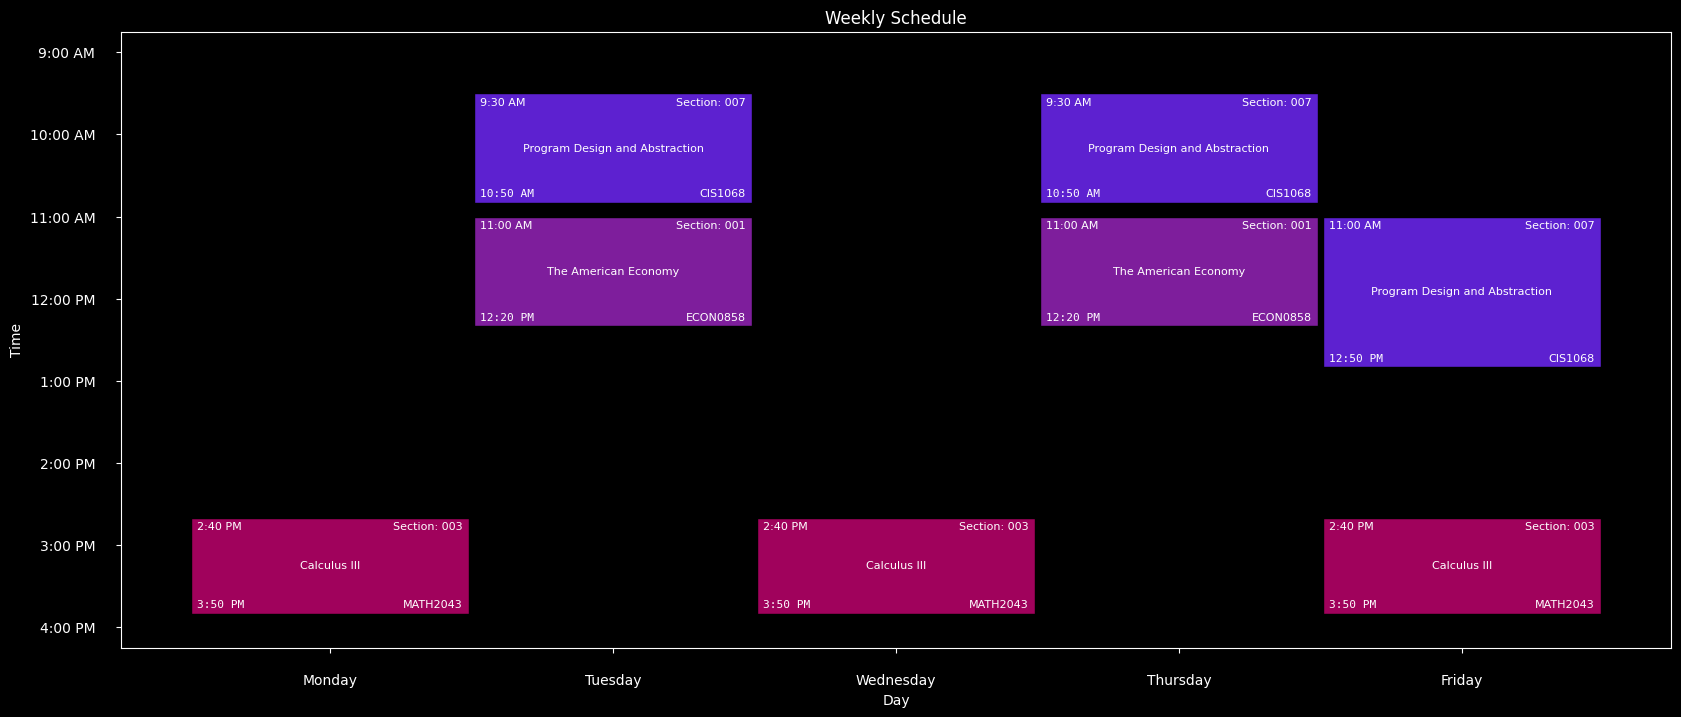

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


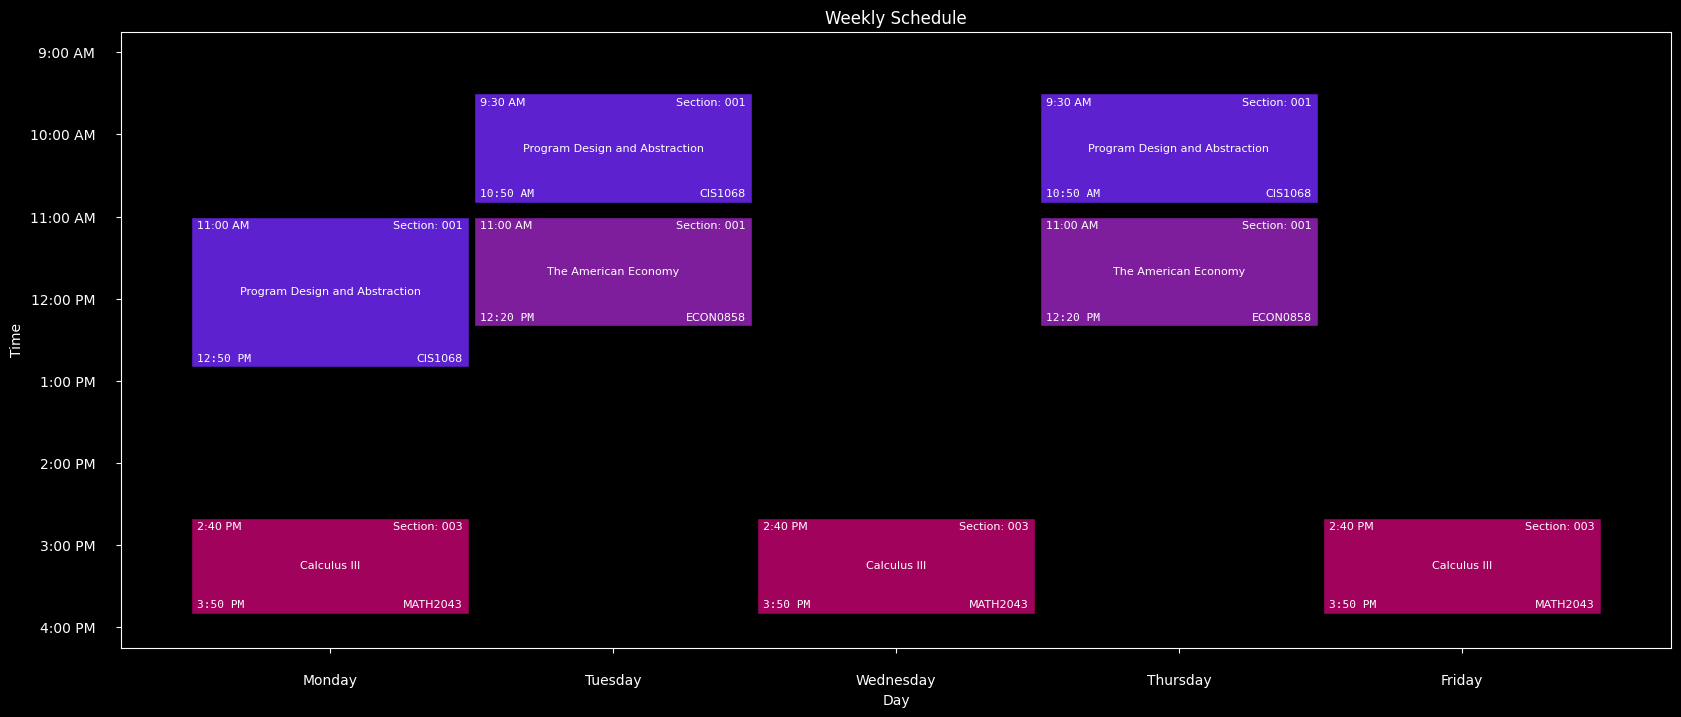

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


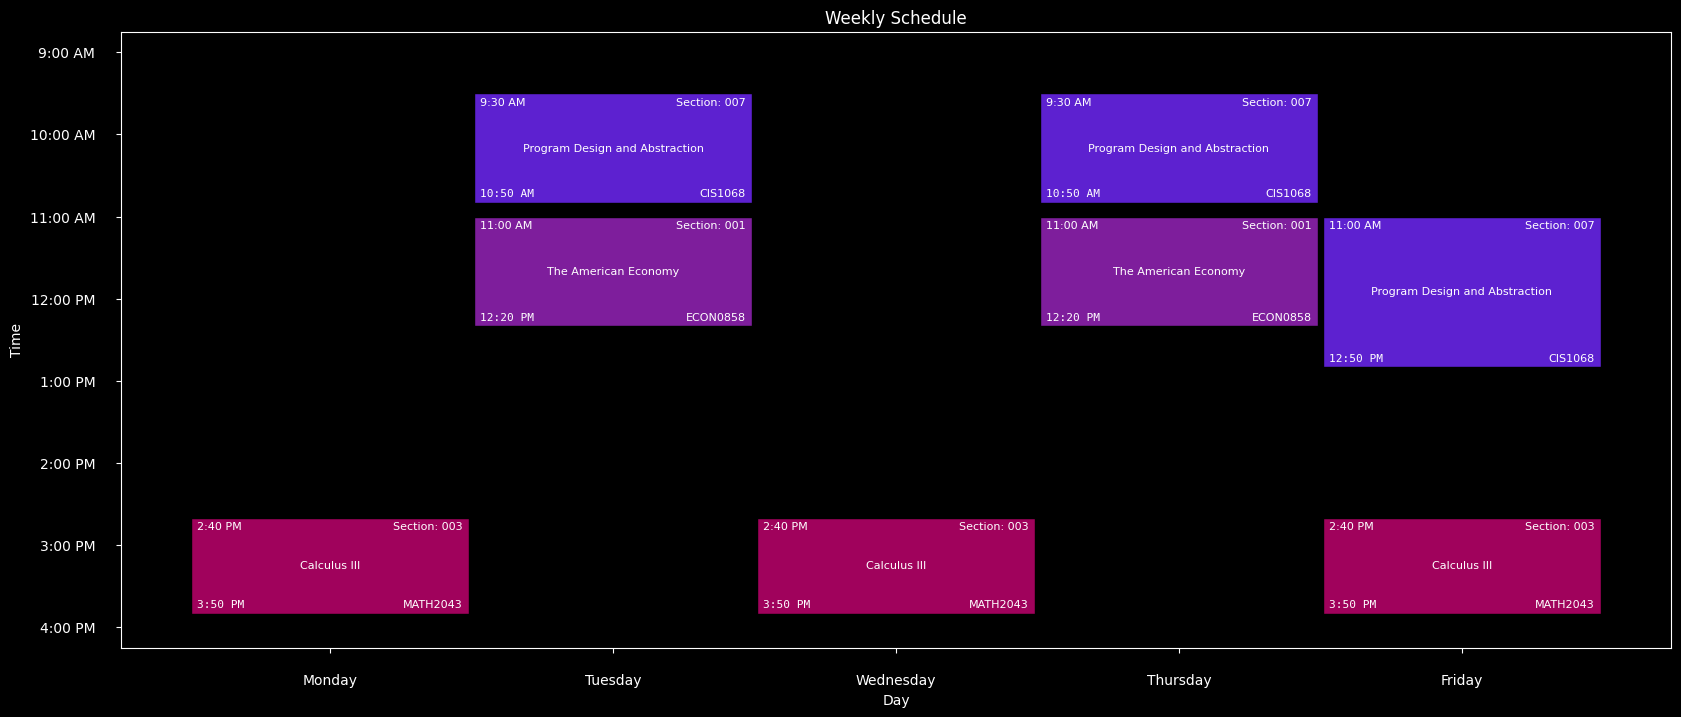

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


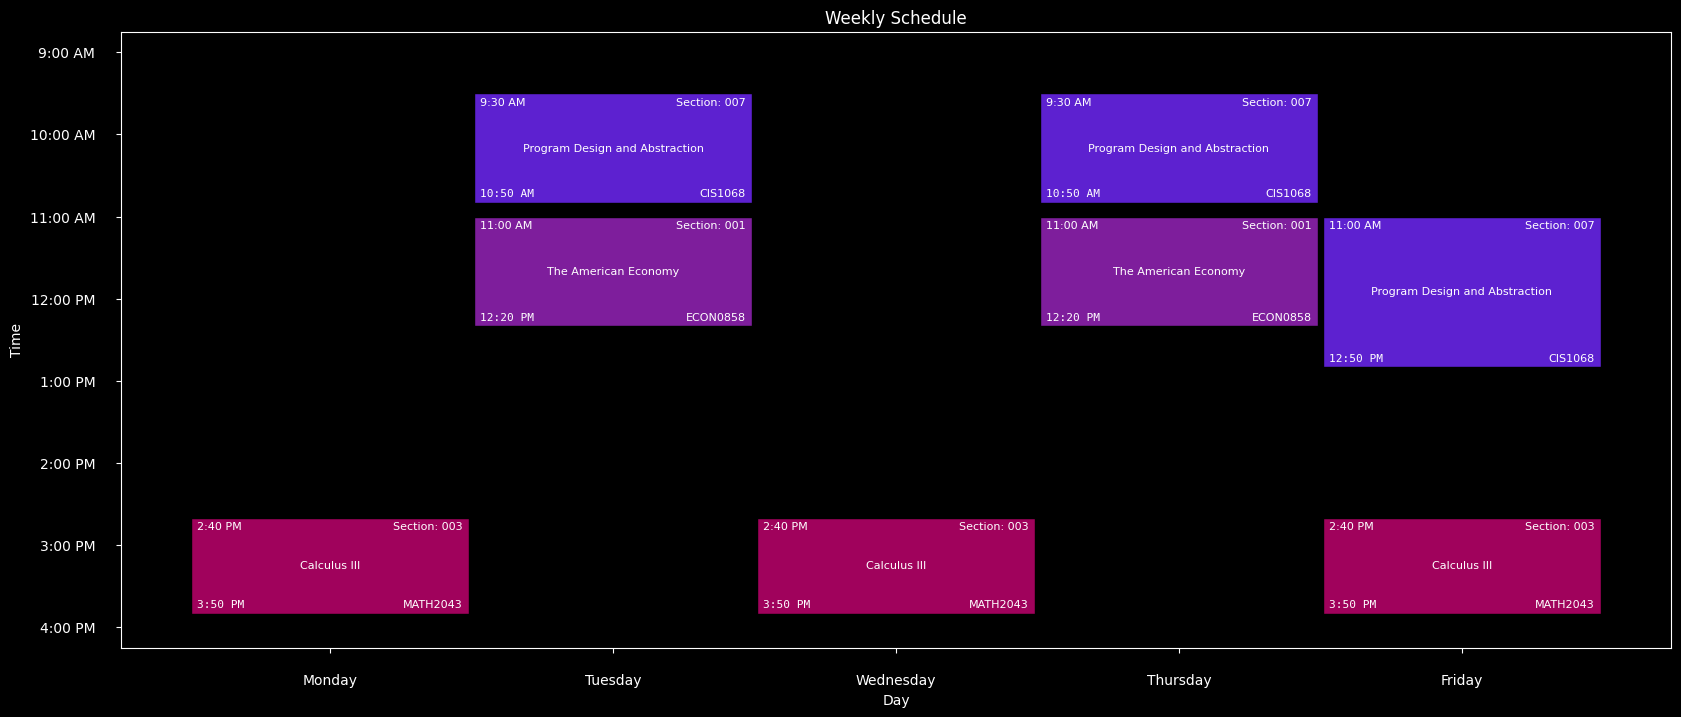

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


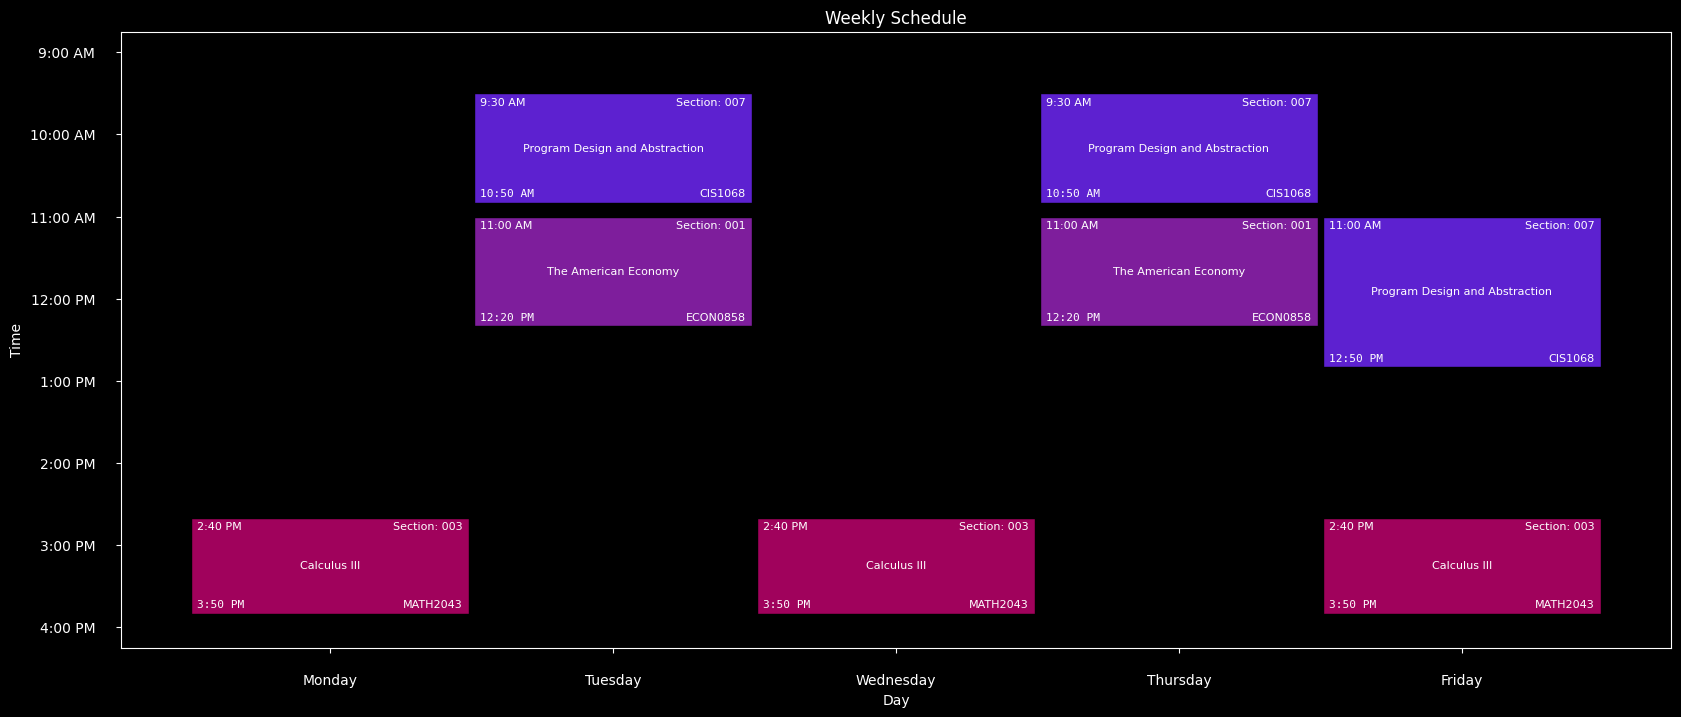

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


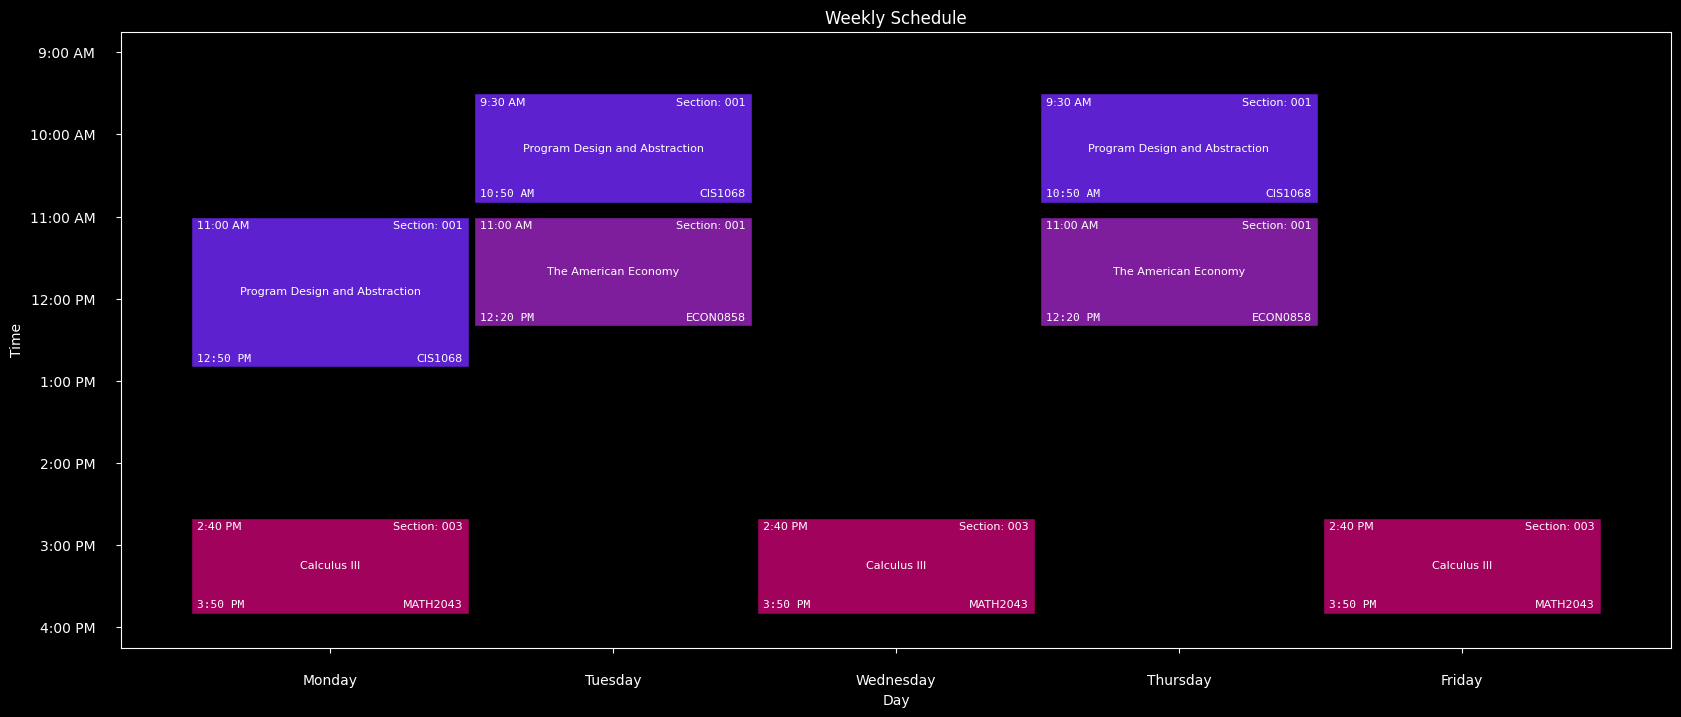

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 12.83 hrs, BREAK_TOTAL: 2.17 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


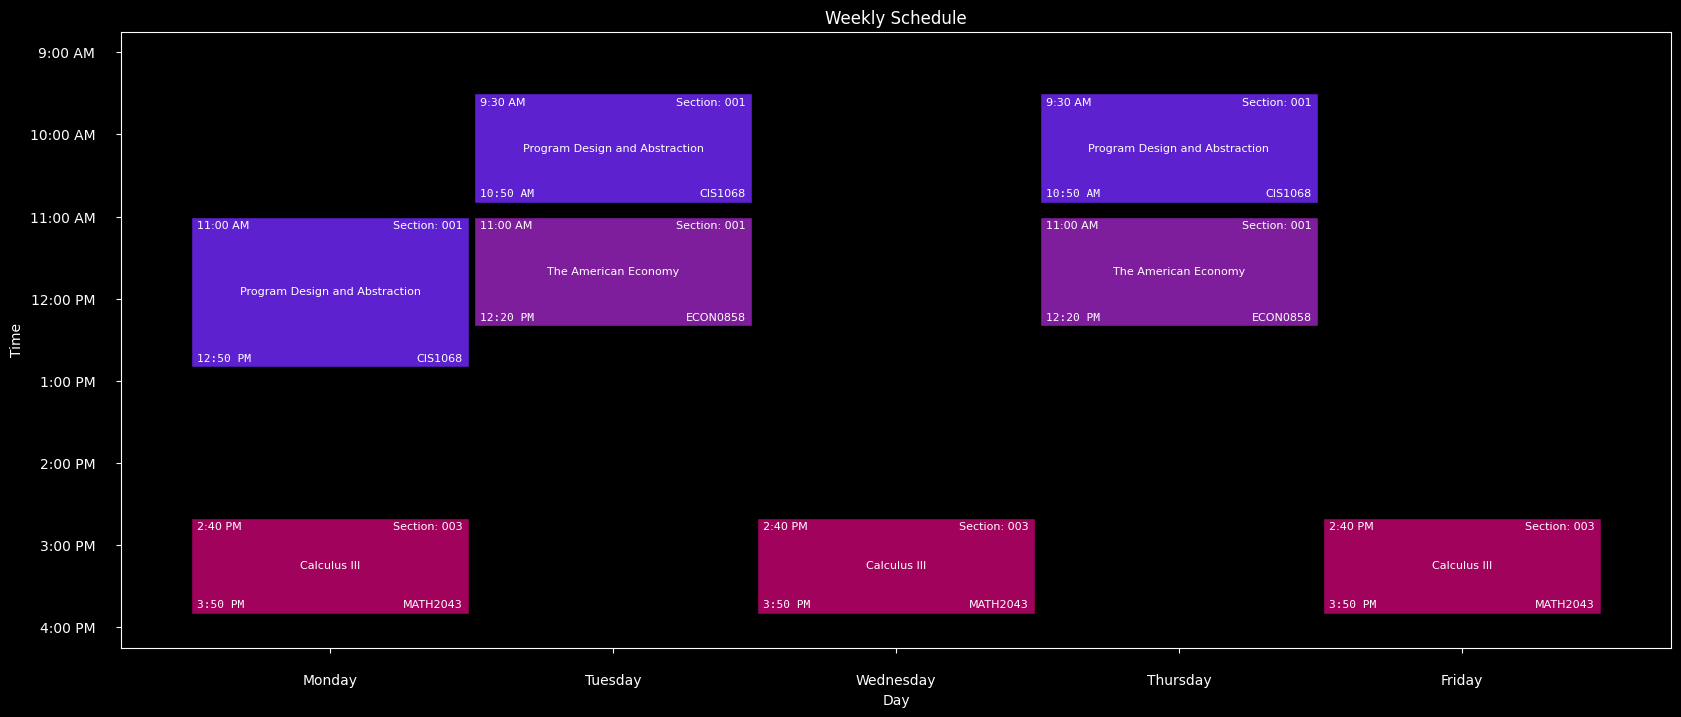

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


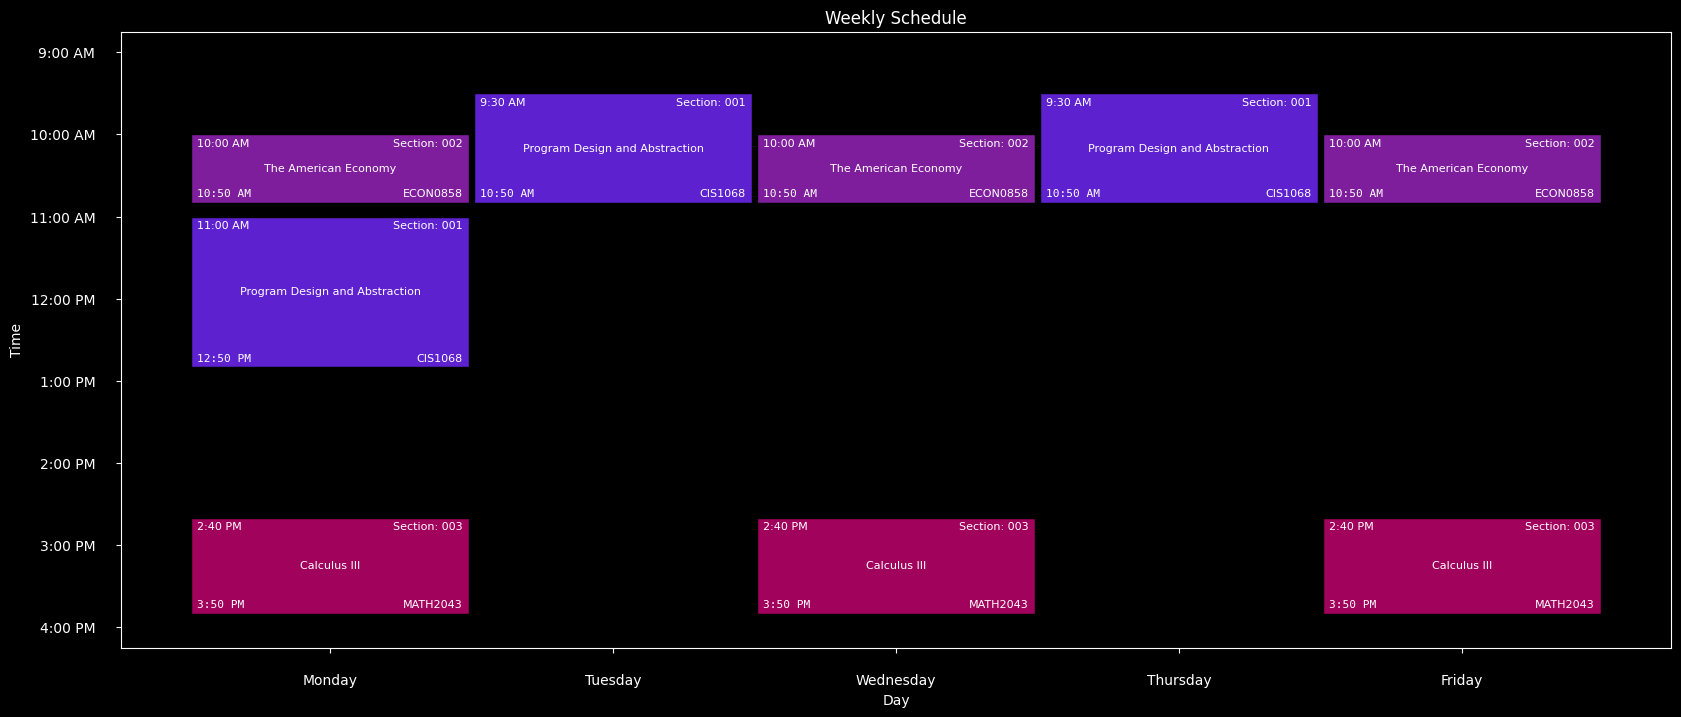

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


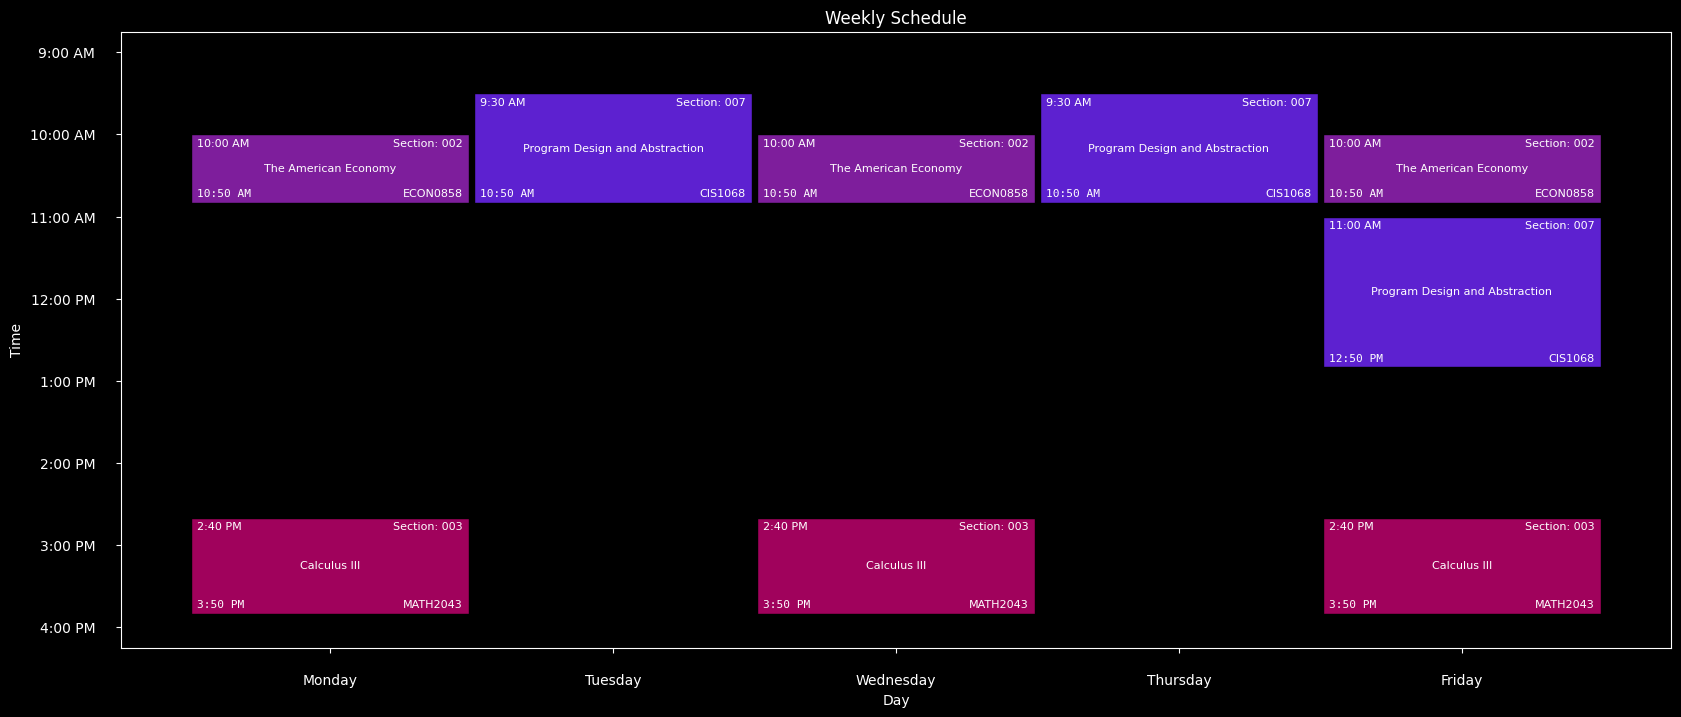

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


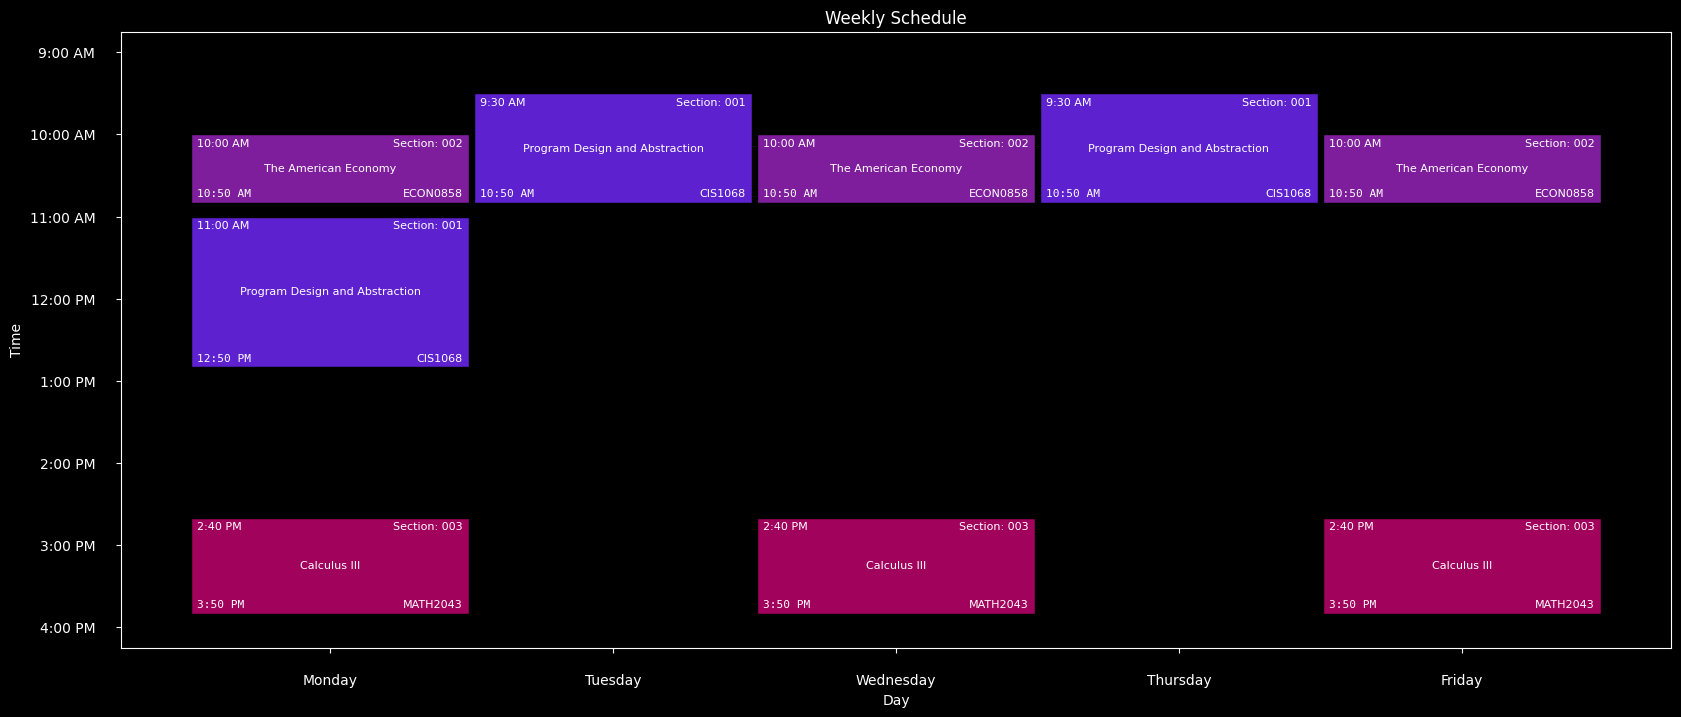

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


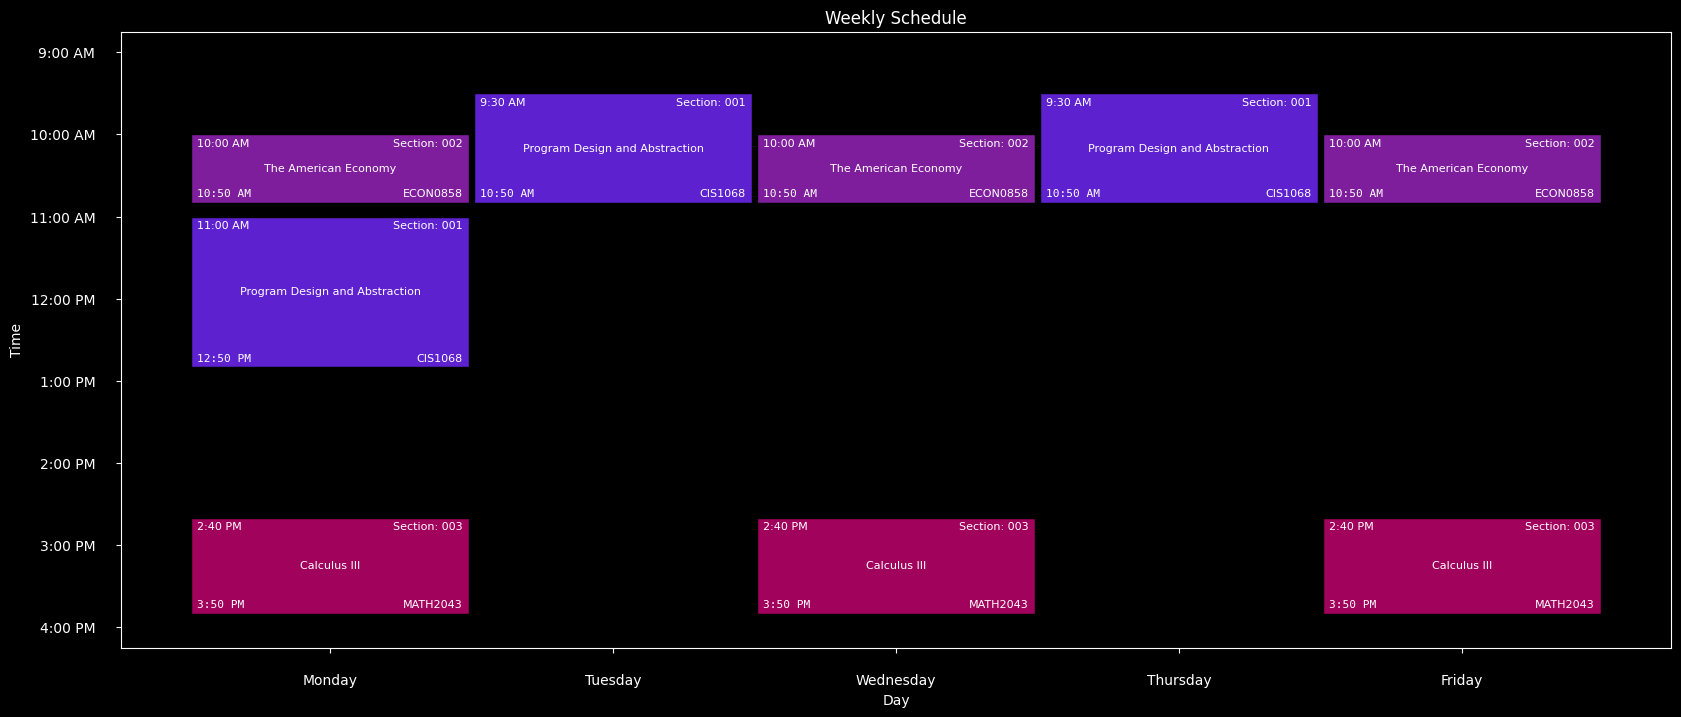

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


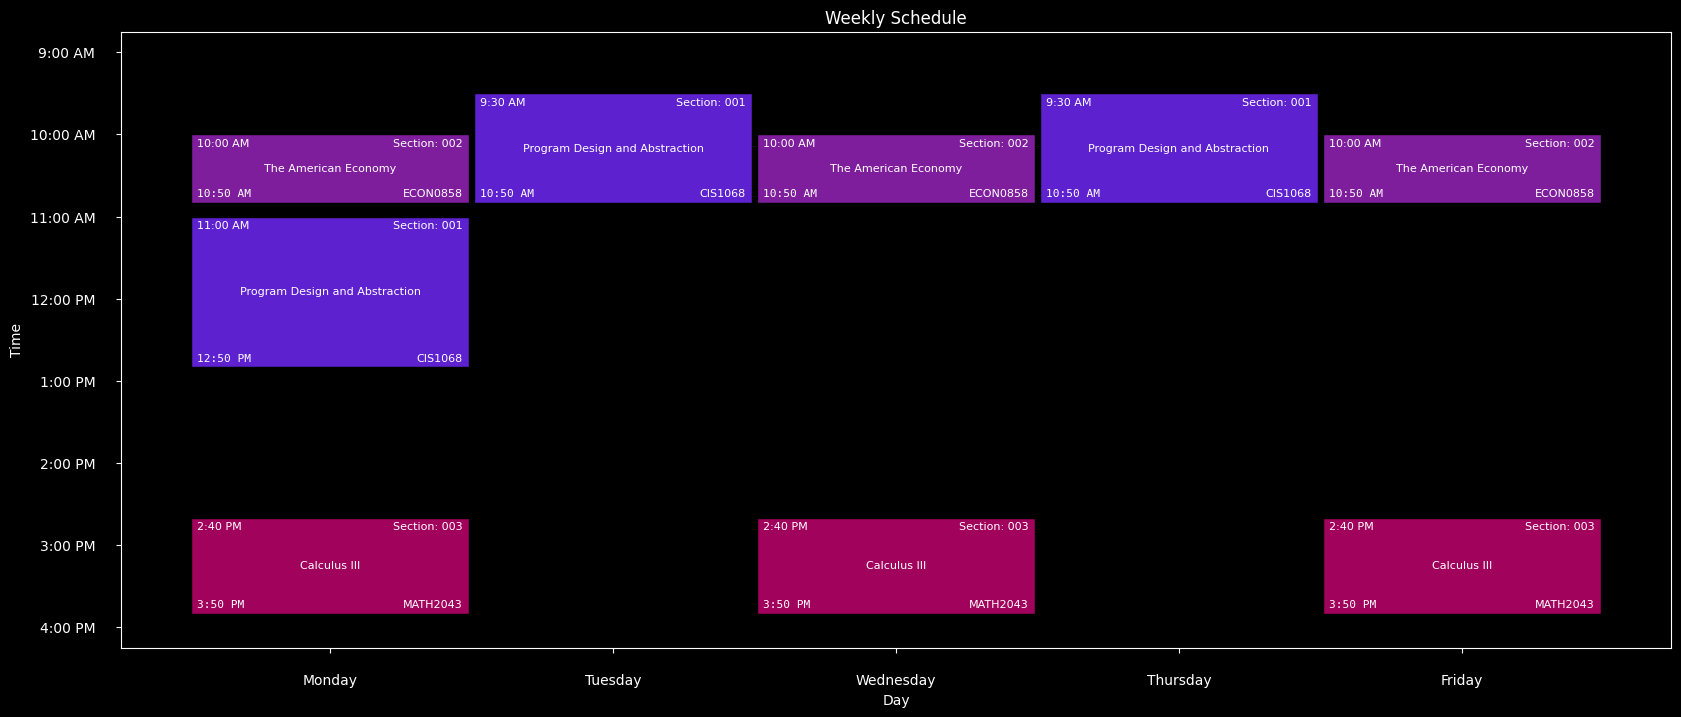

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


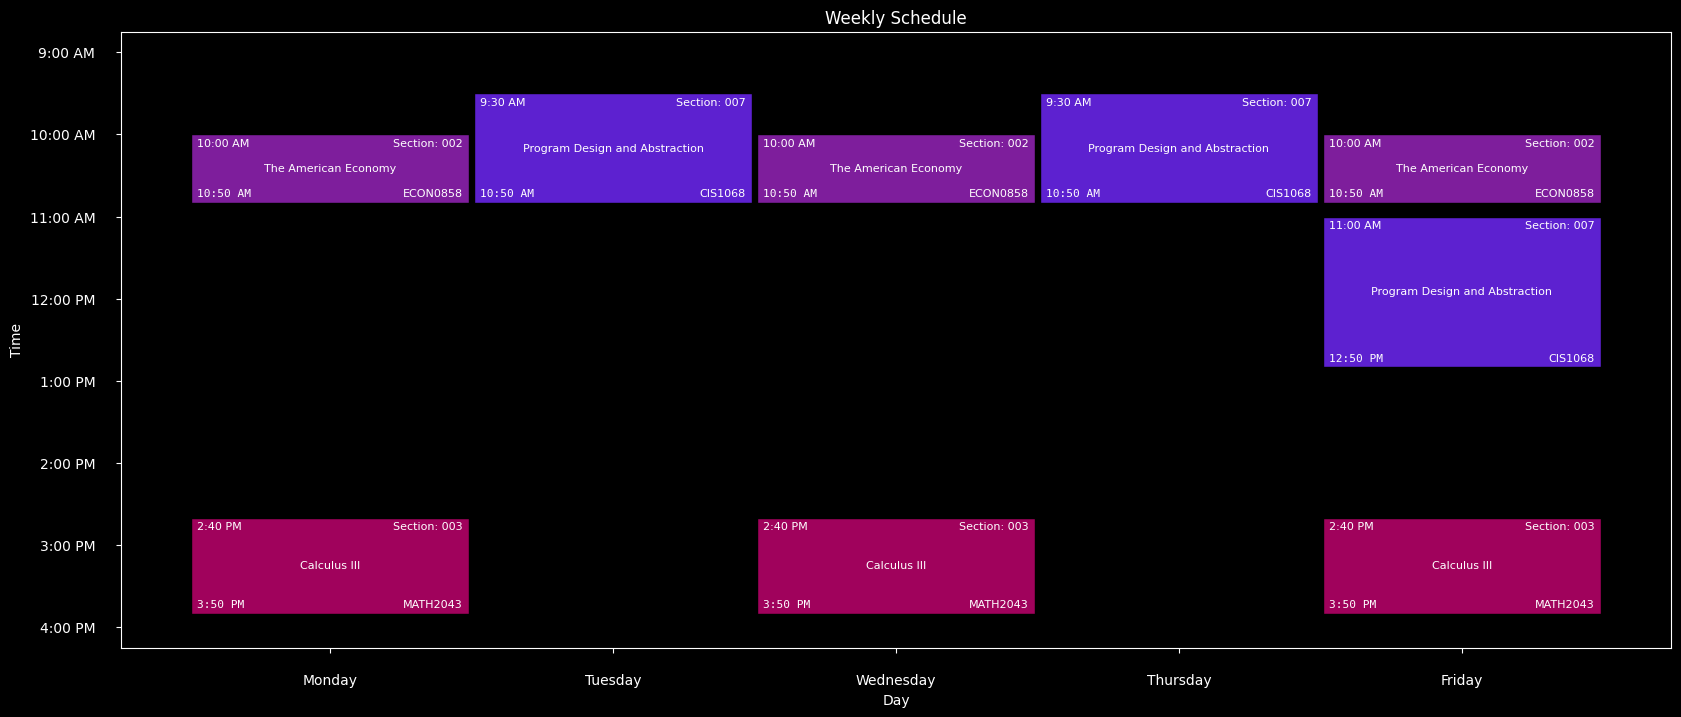

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


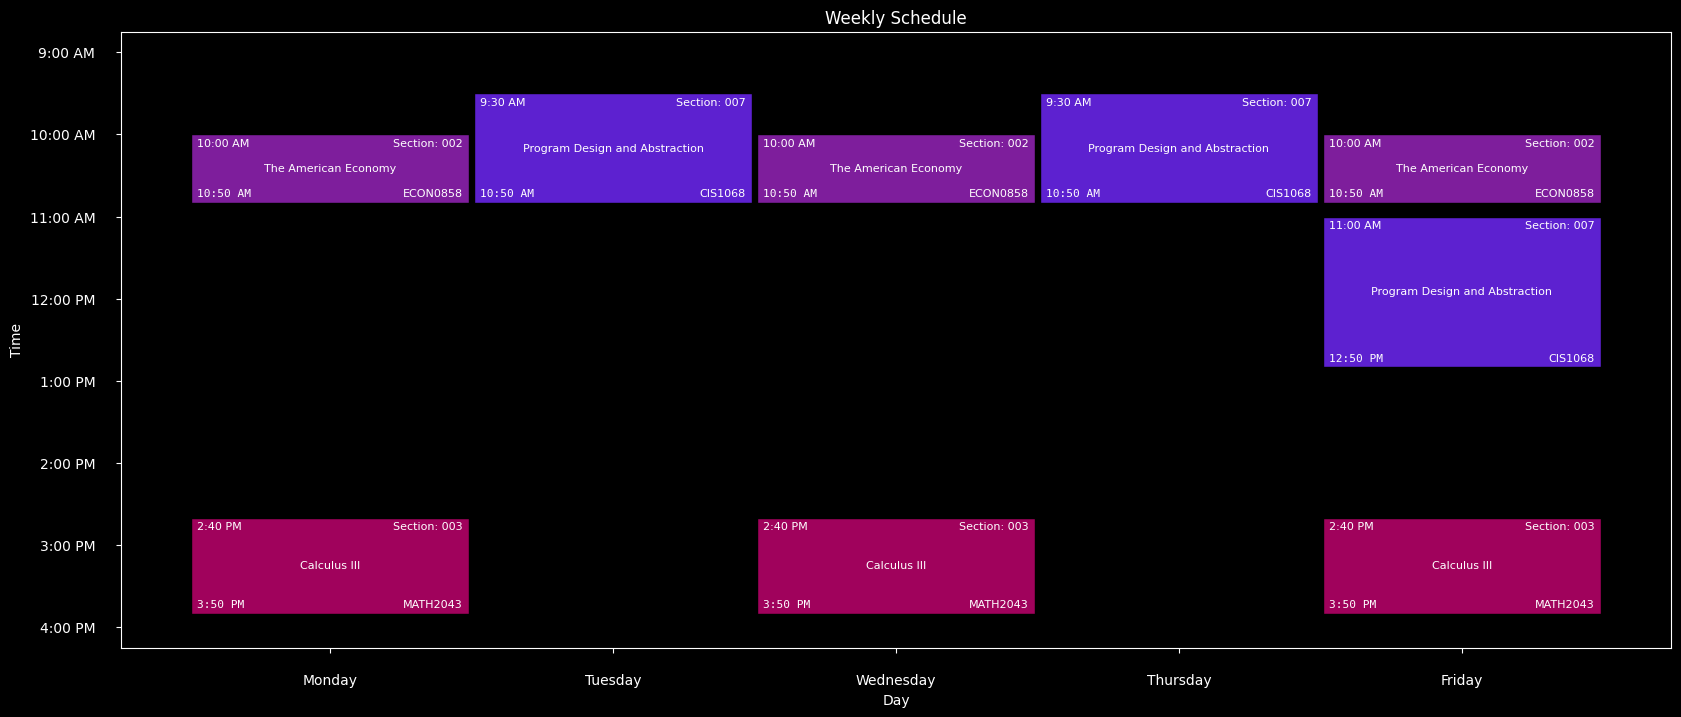

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


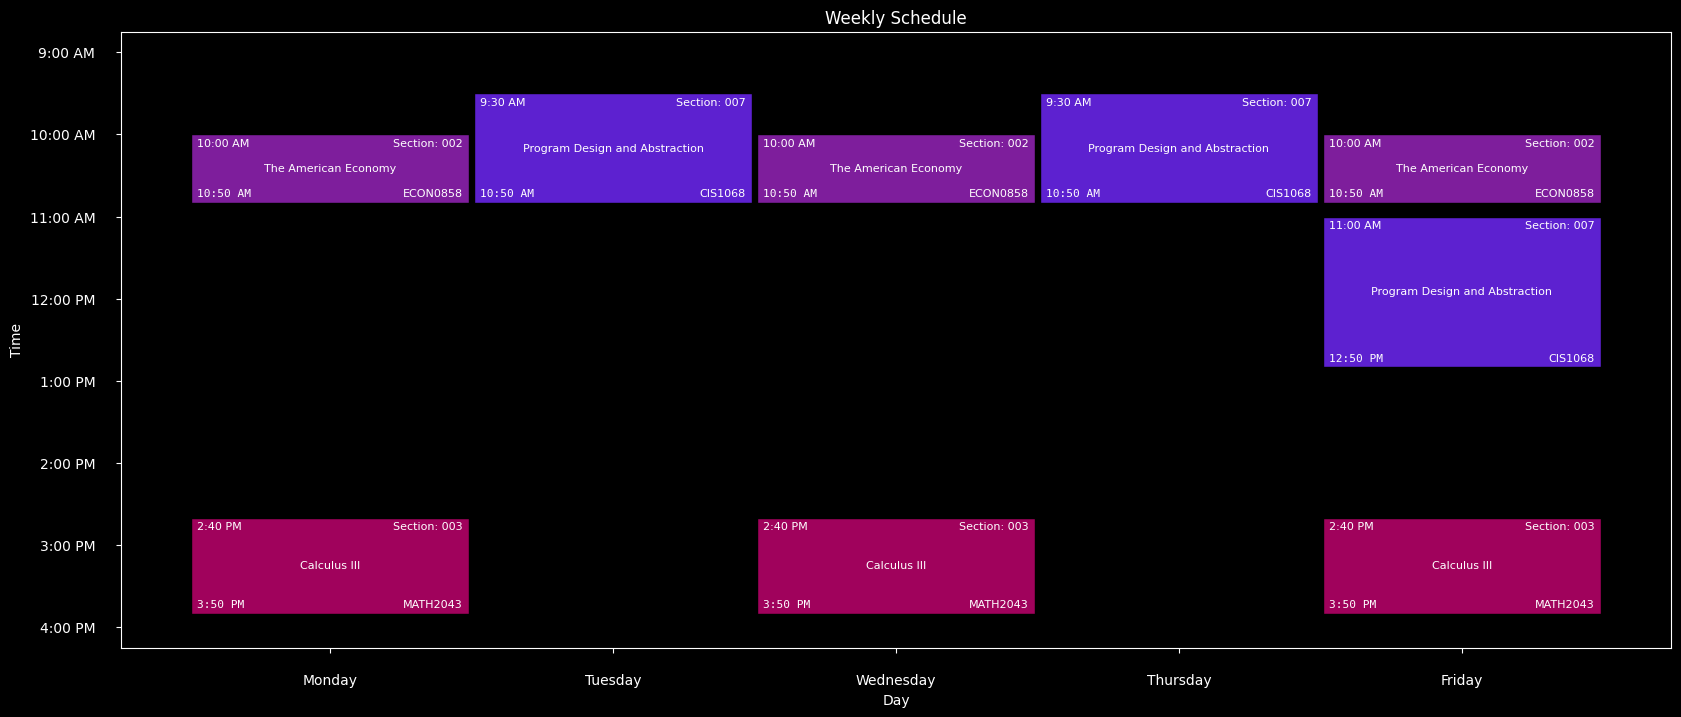

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


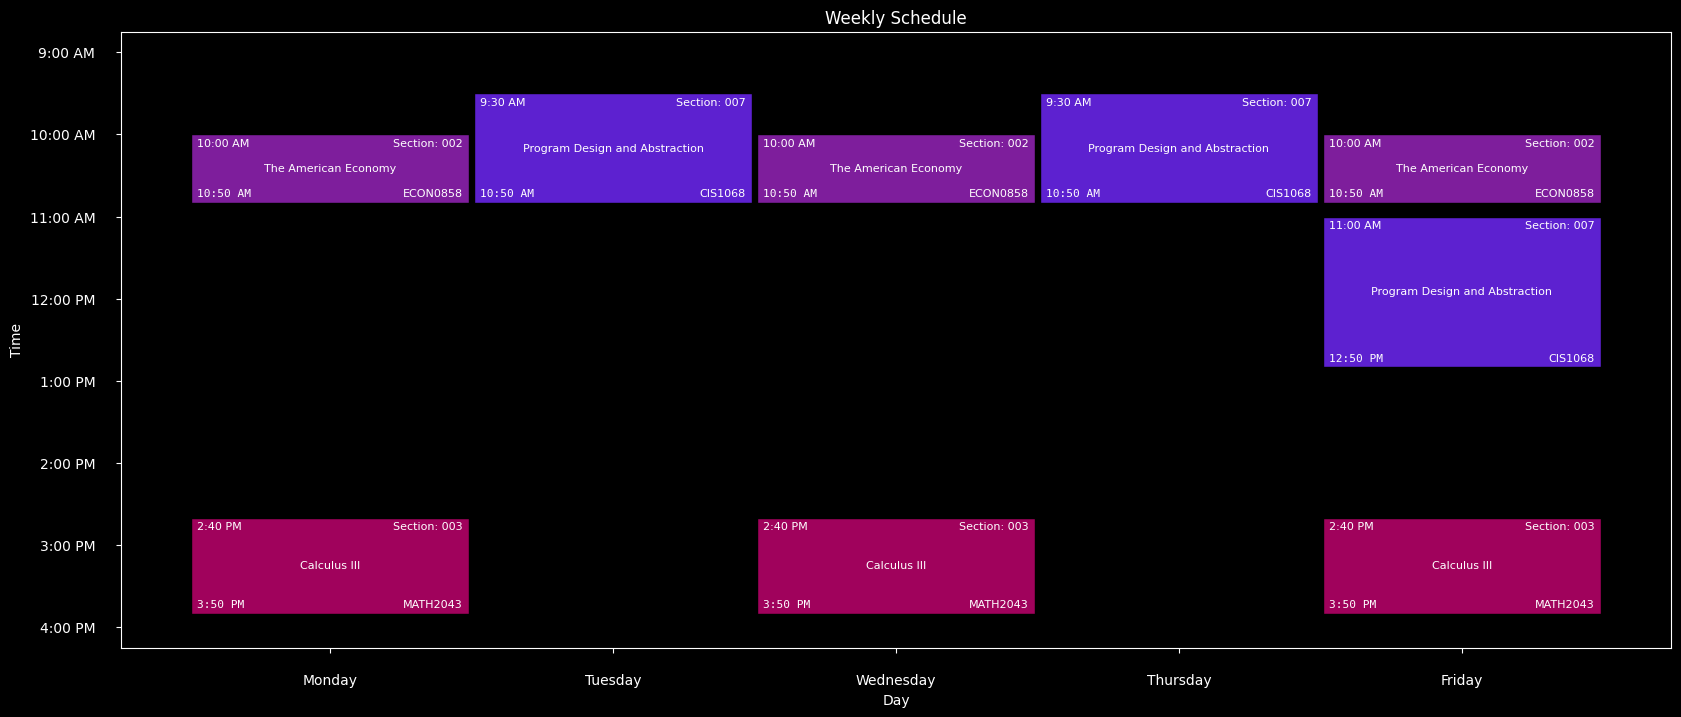

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


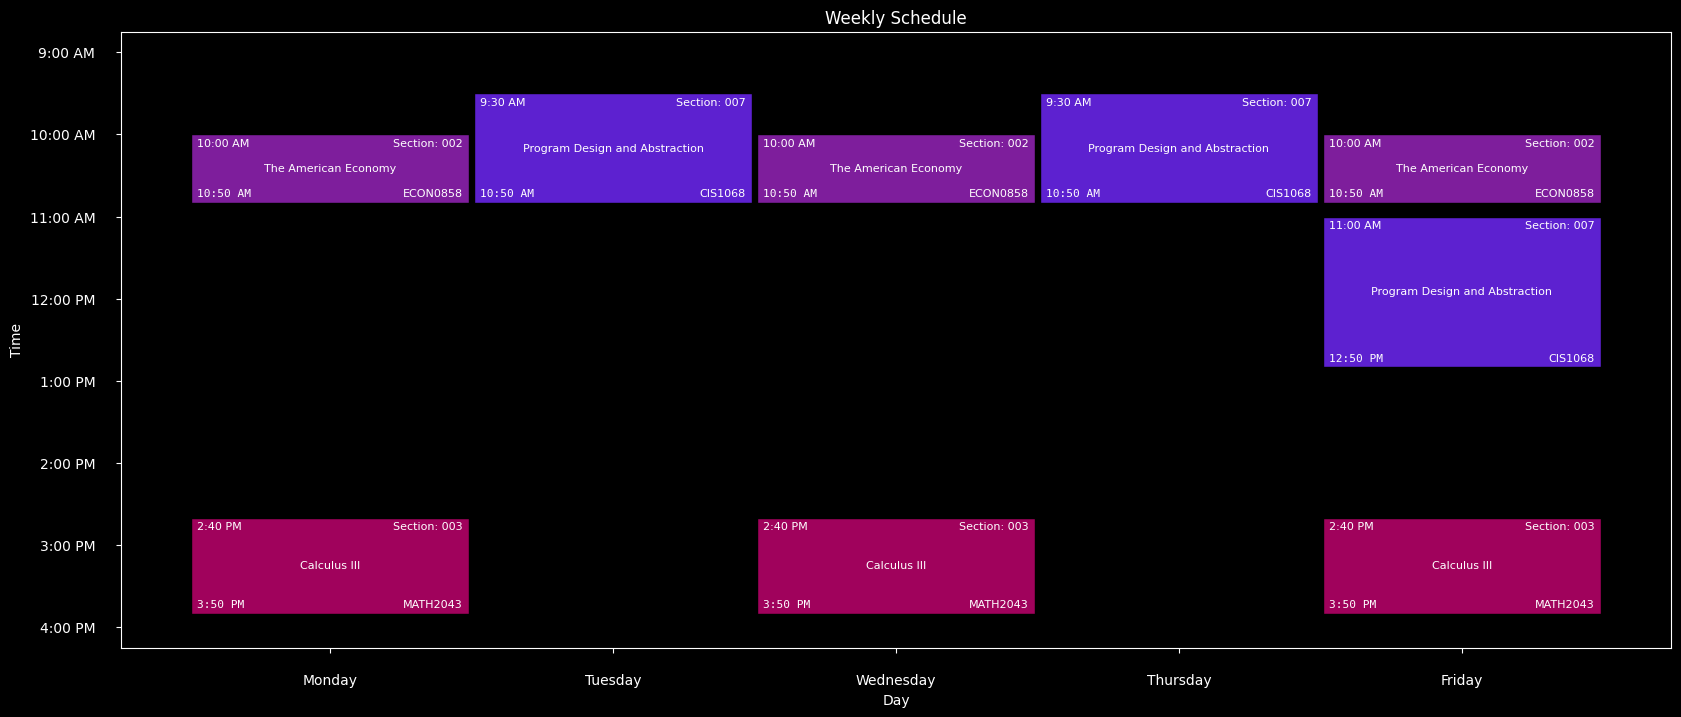

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


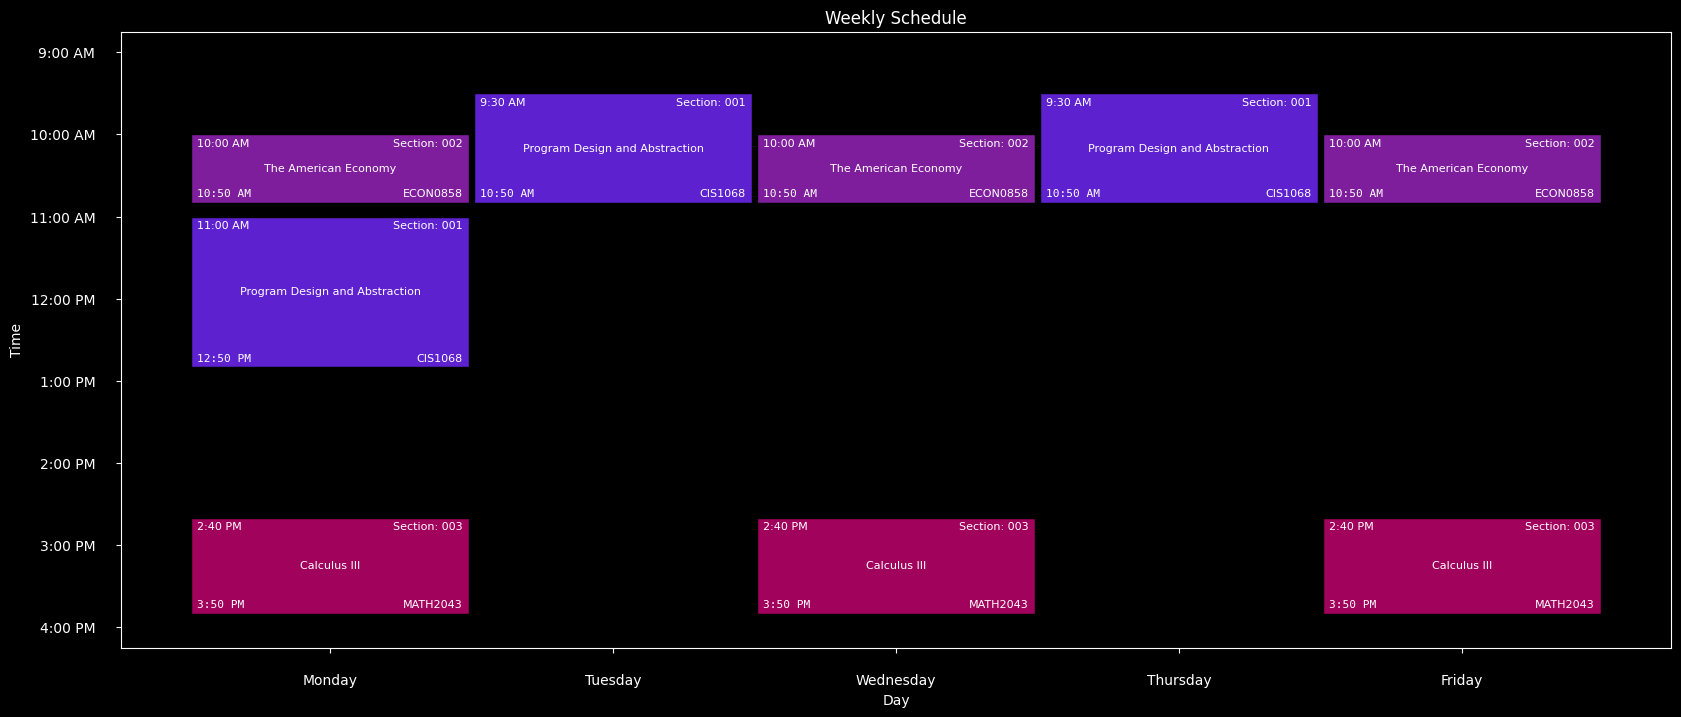

WEEK_RANGE: 6.33 hrs, WEEK_TOTAL: 20.17 hrs, BREAK_TOTAL: 9.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 003 | Igor Rivin<br>Farzana Chaudhry | 2.30<br>3.40 | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


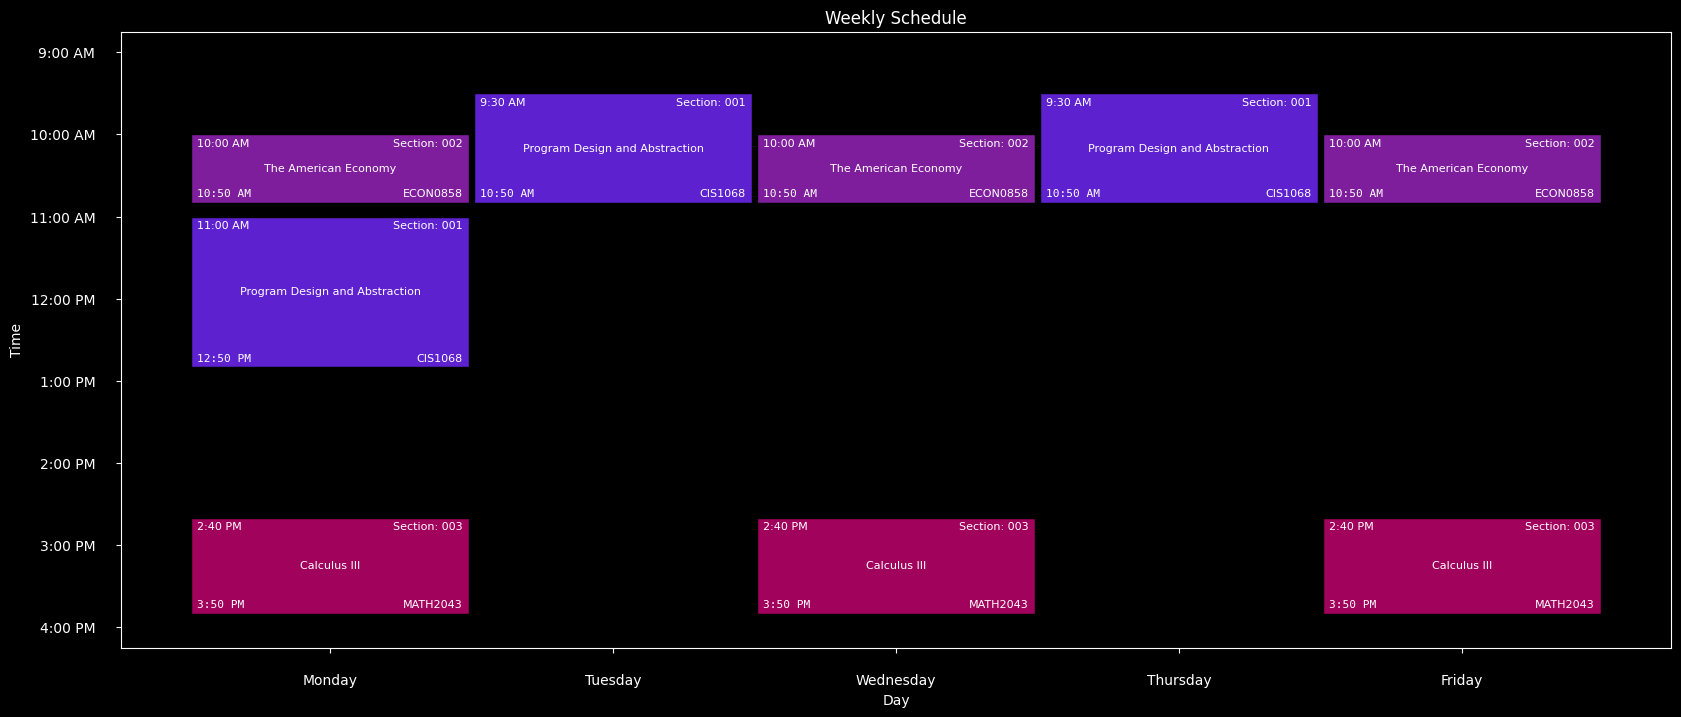

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


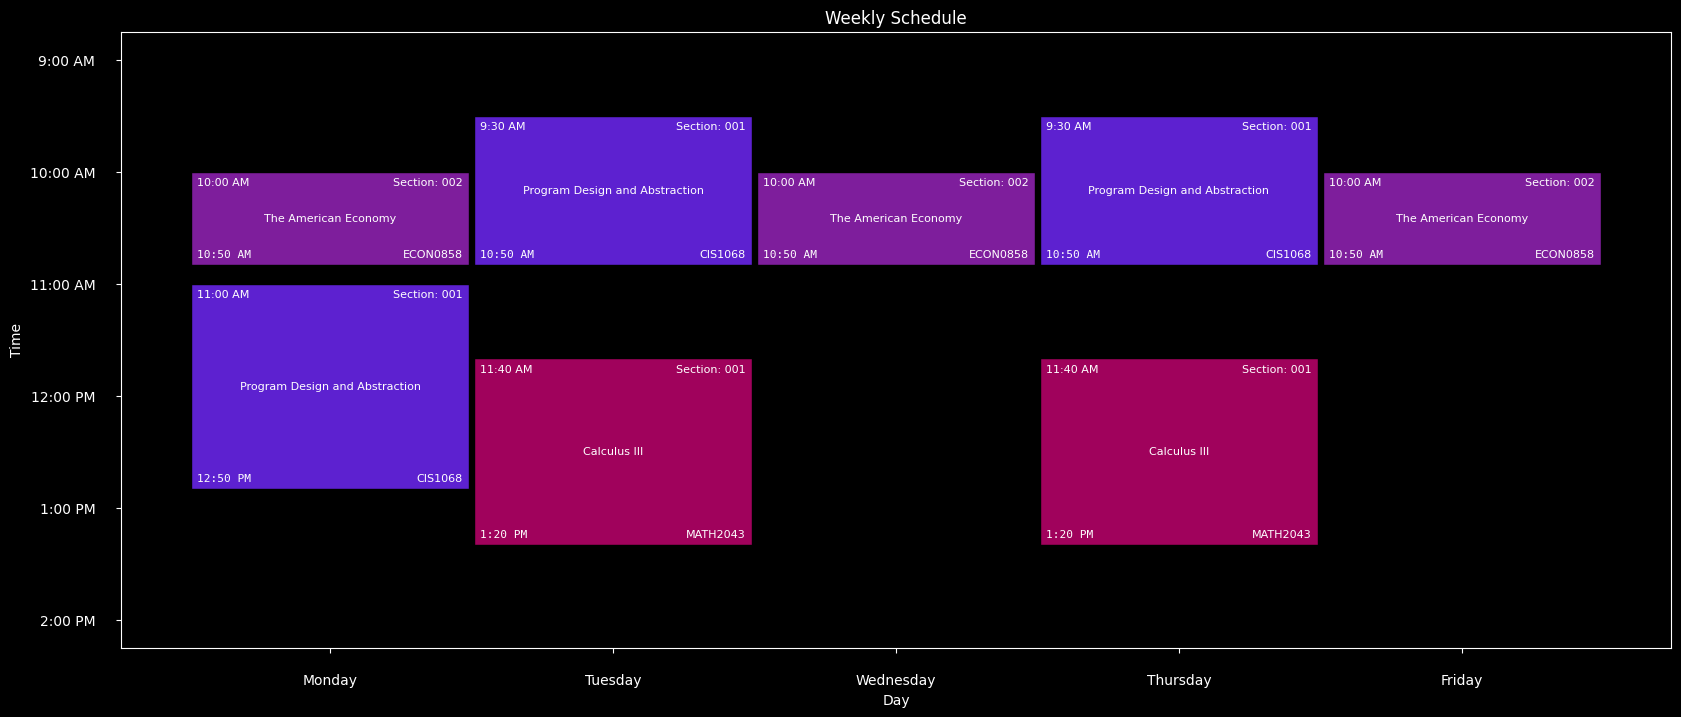

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


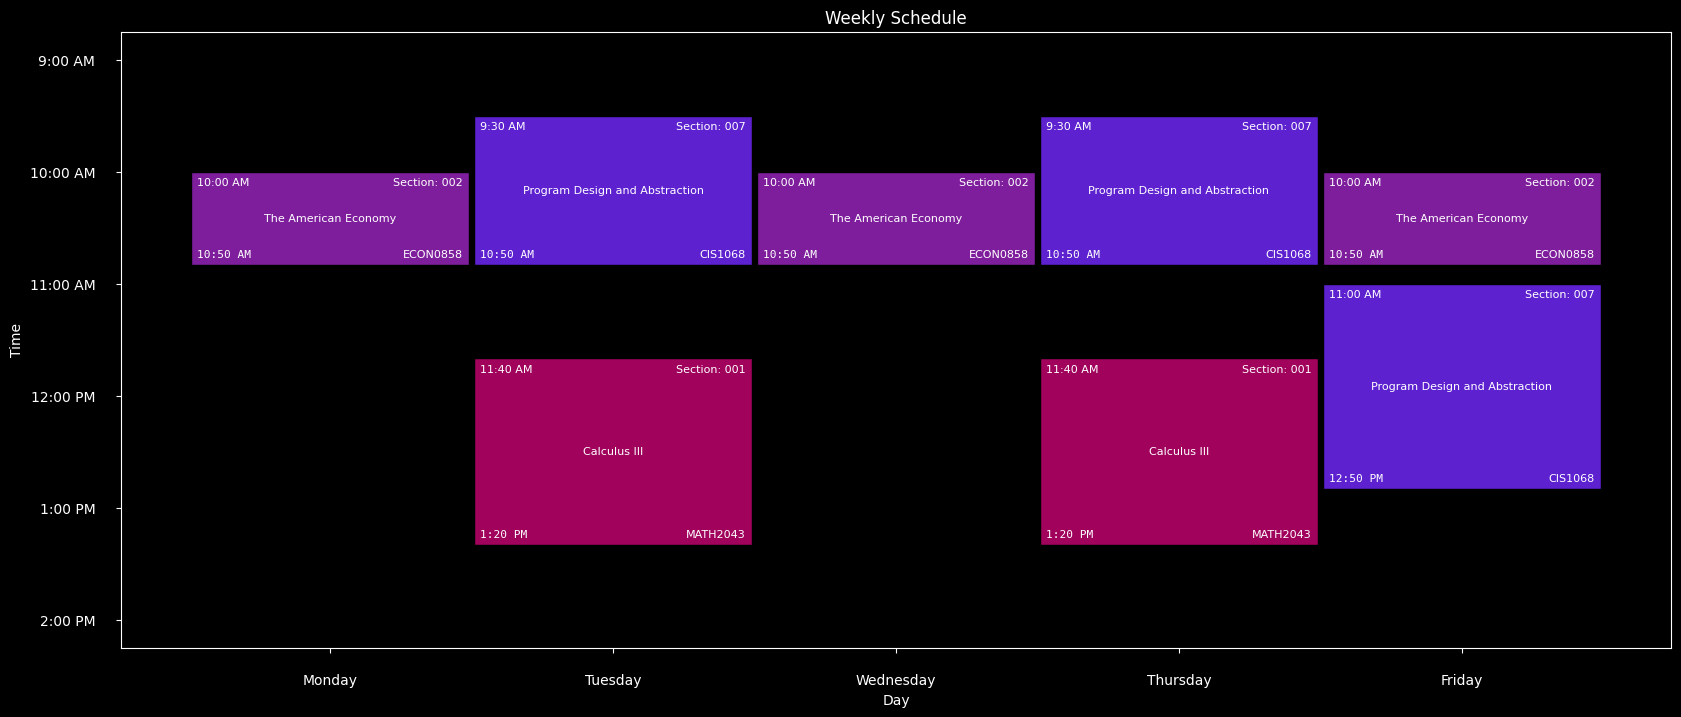

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


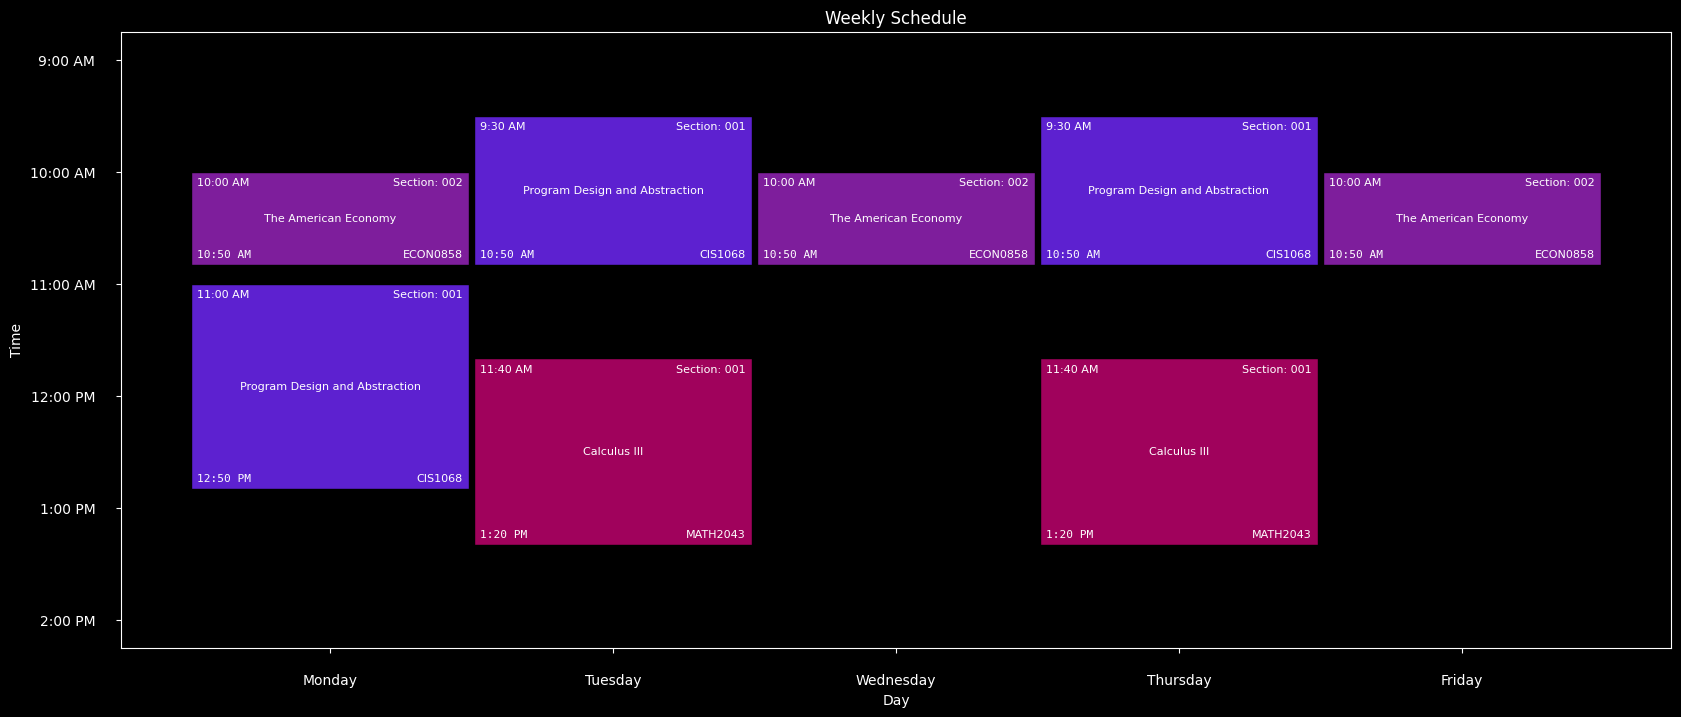

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


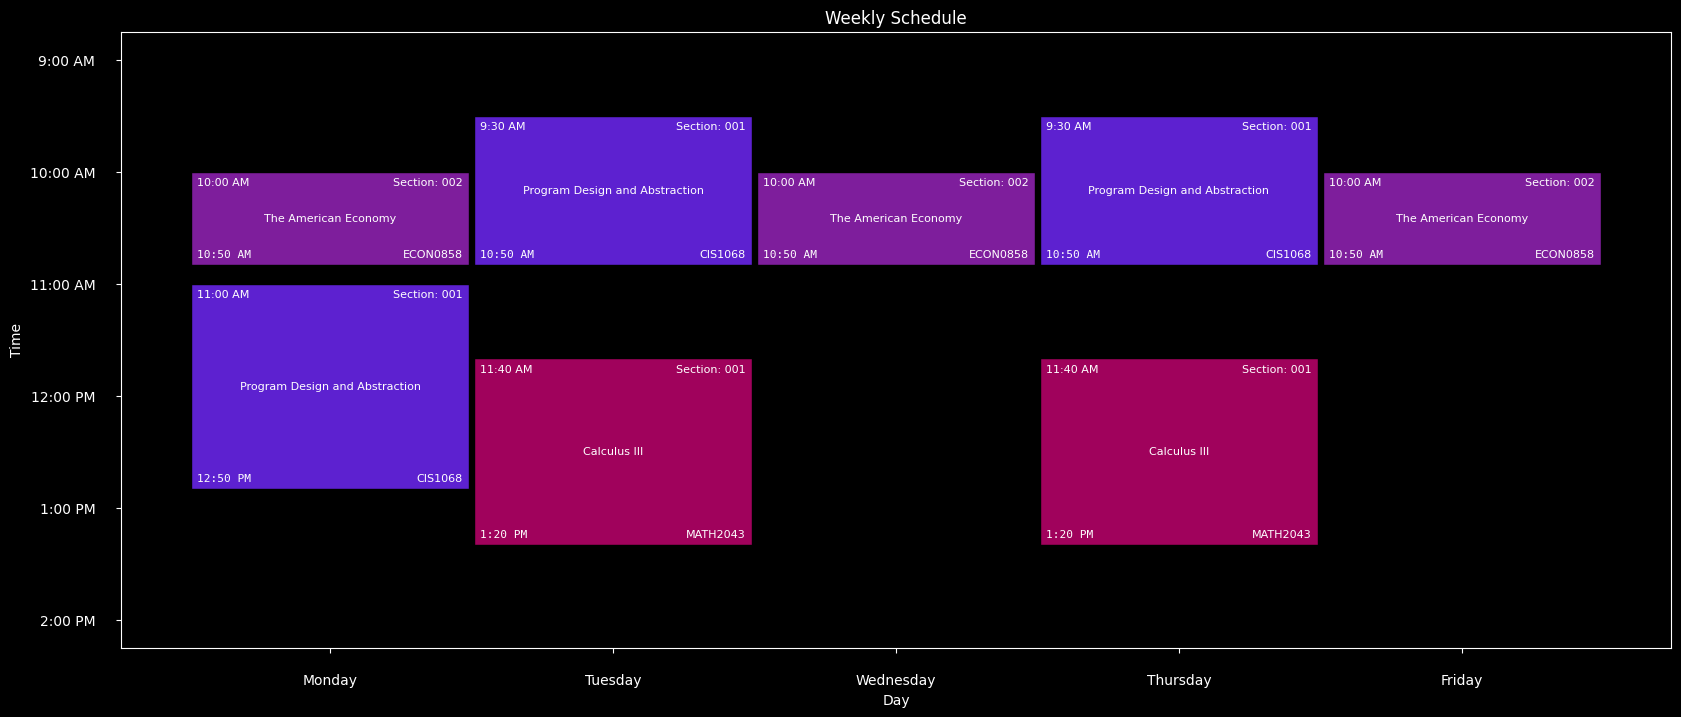

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


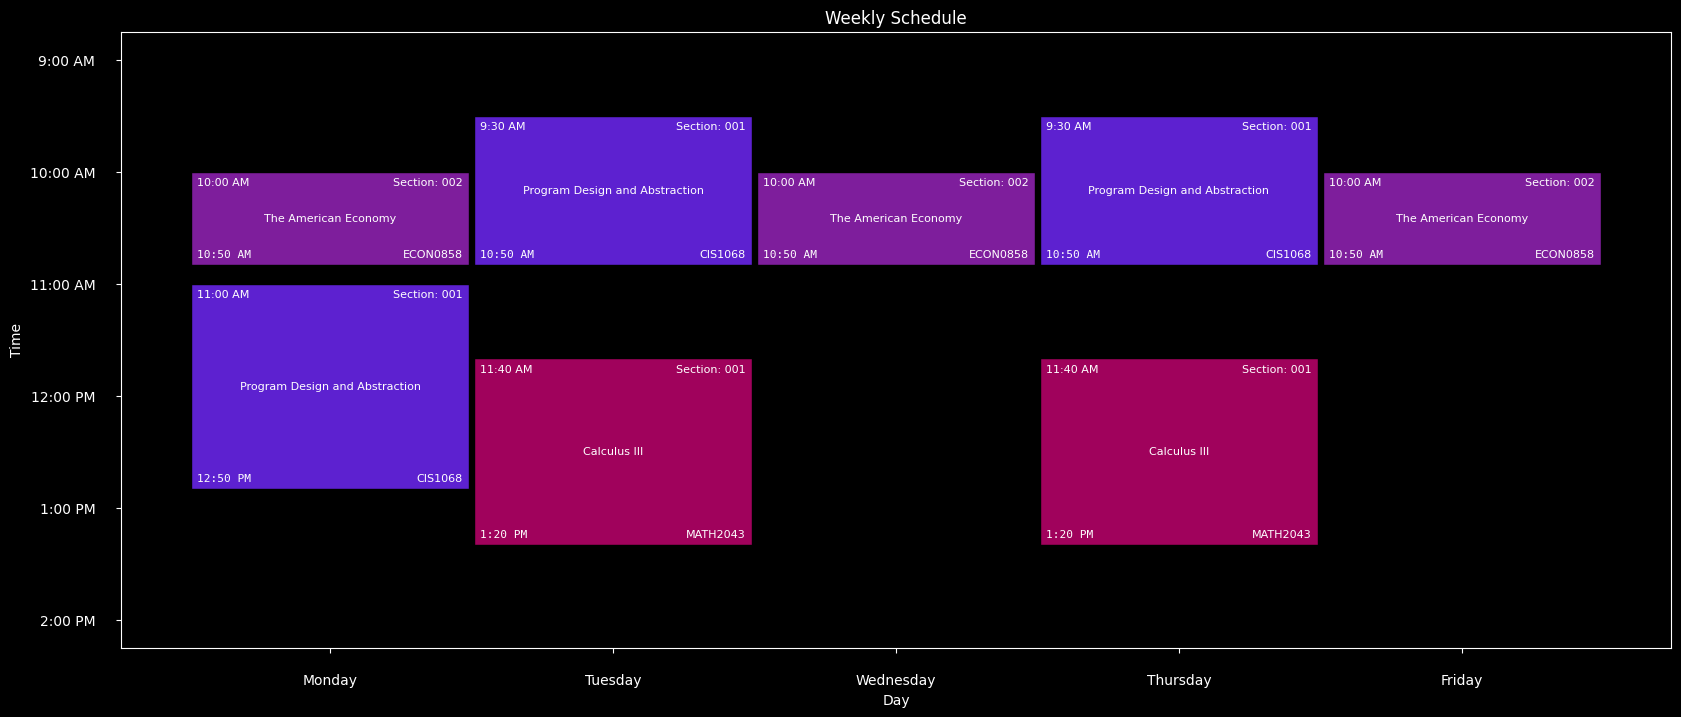

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


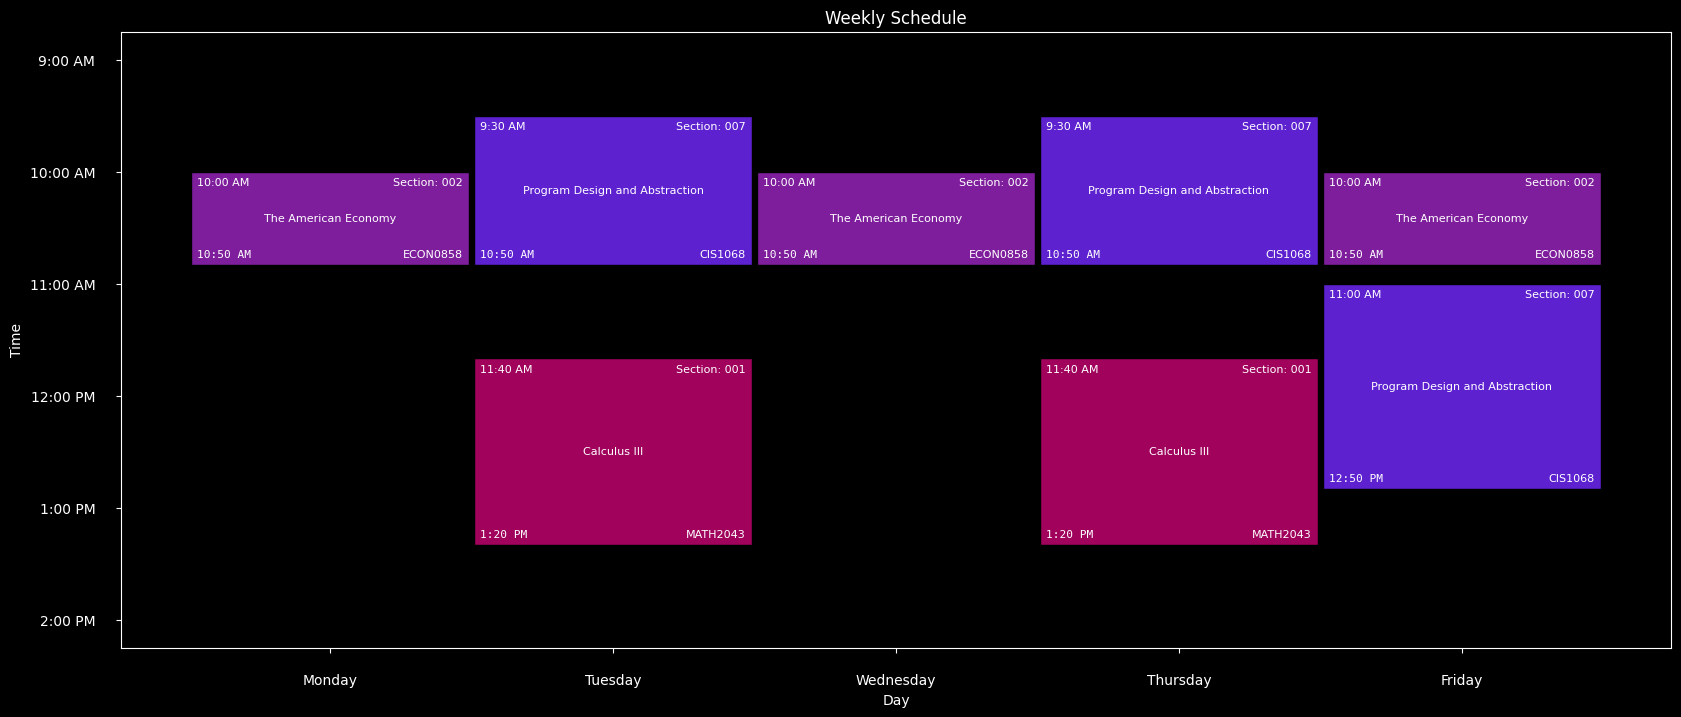

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


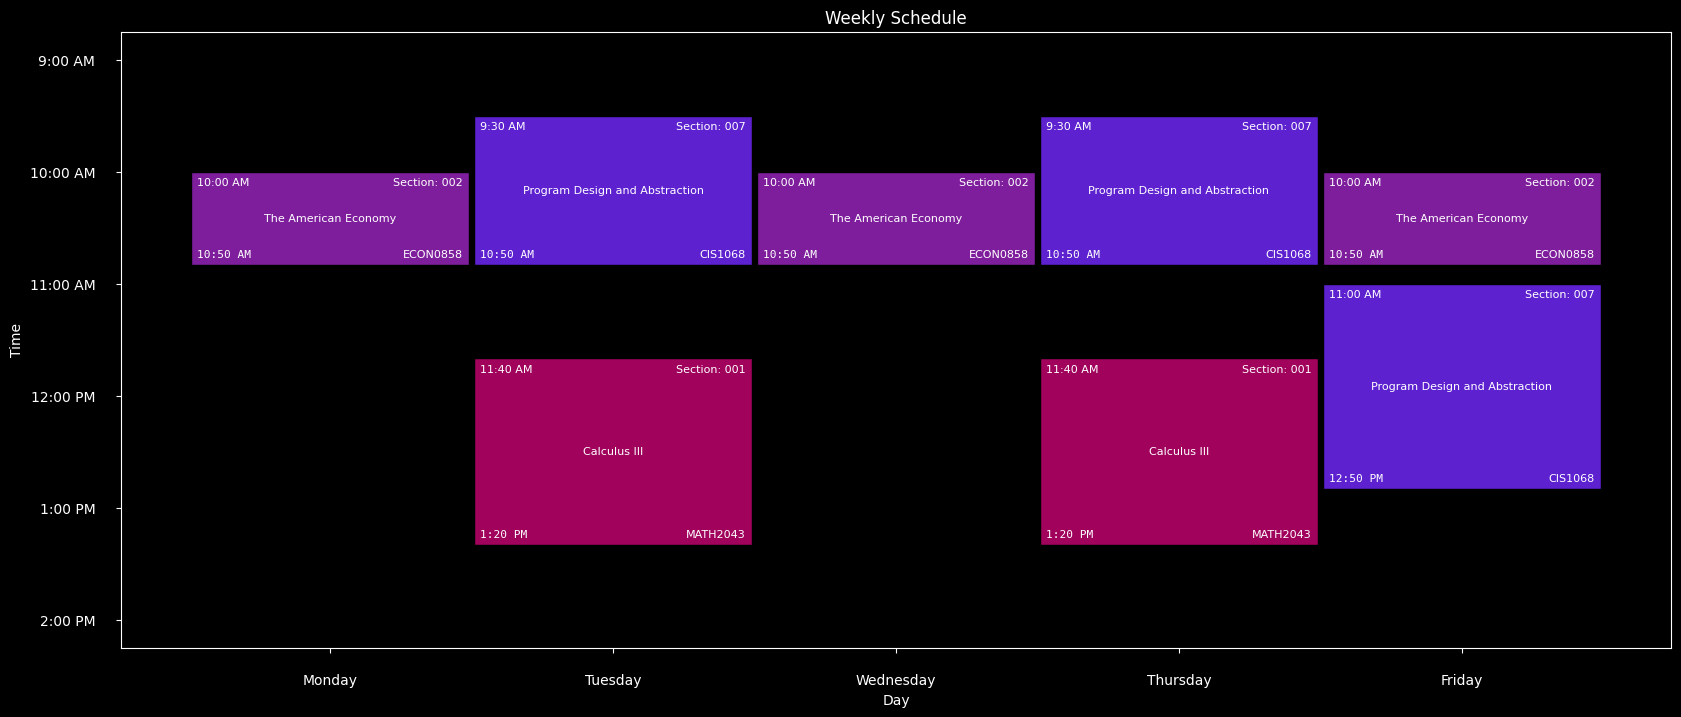

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


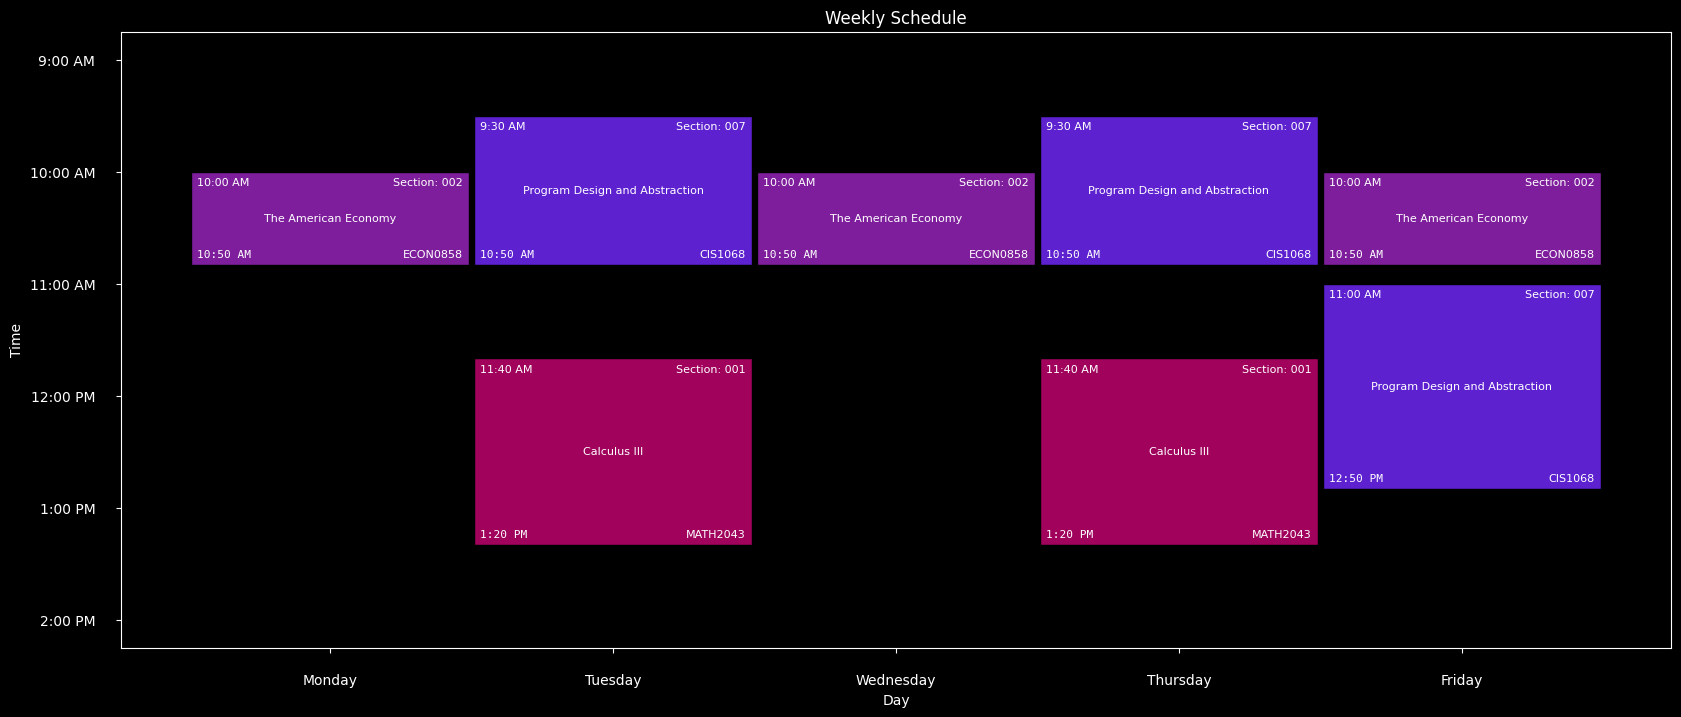

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


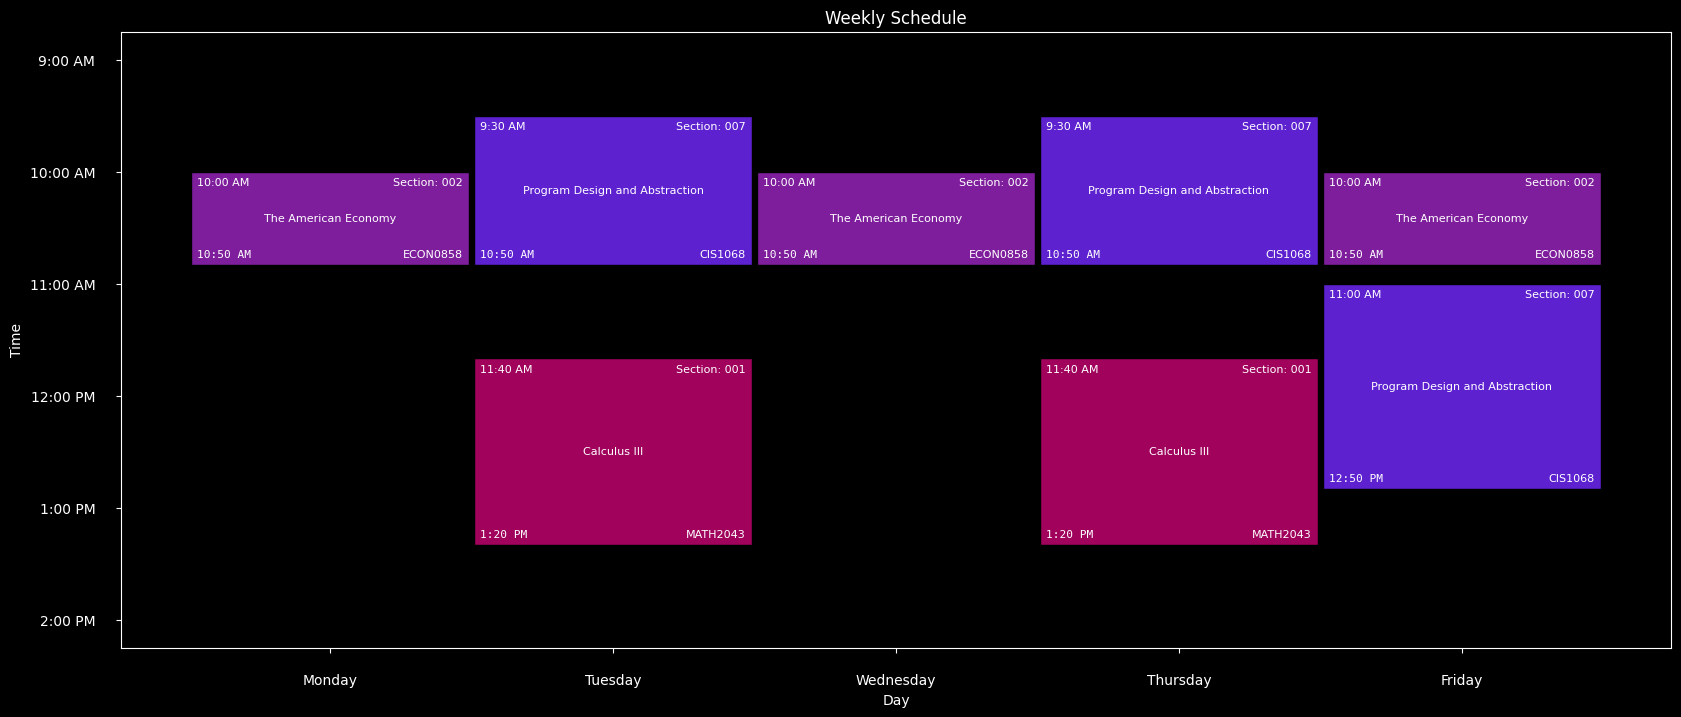

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


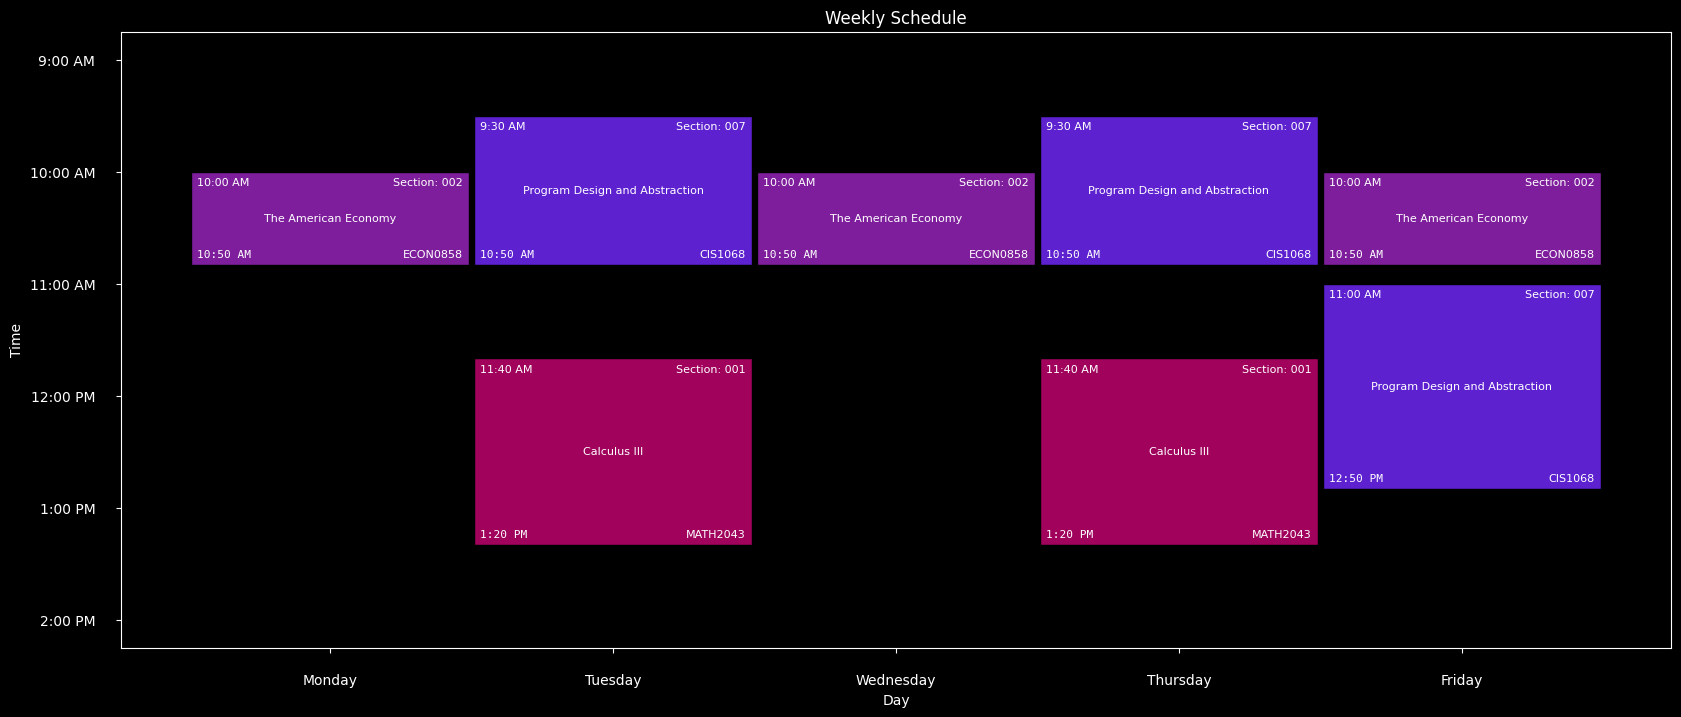

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


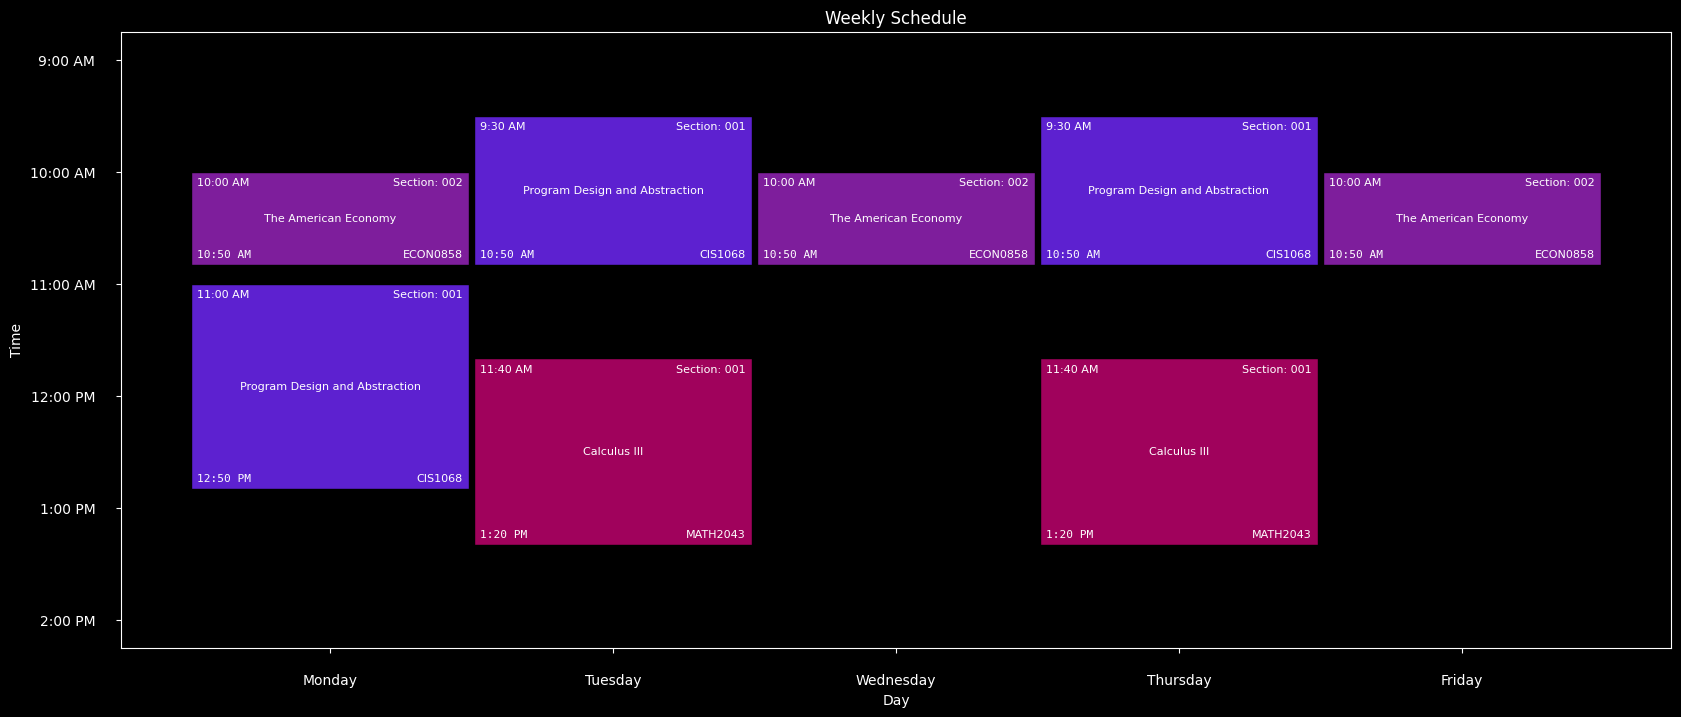

WEEK_RANGE: 3.83 hrs, WEEK_TOTAL: 12.17 hrs, BREAK_TOTAL: 1.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


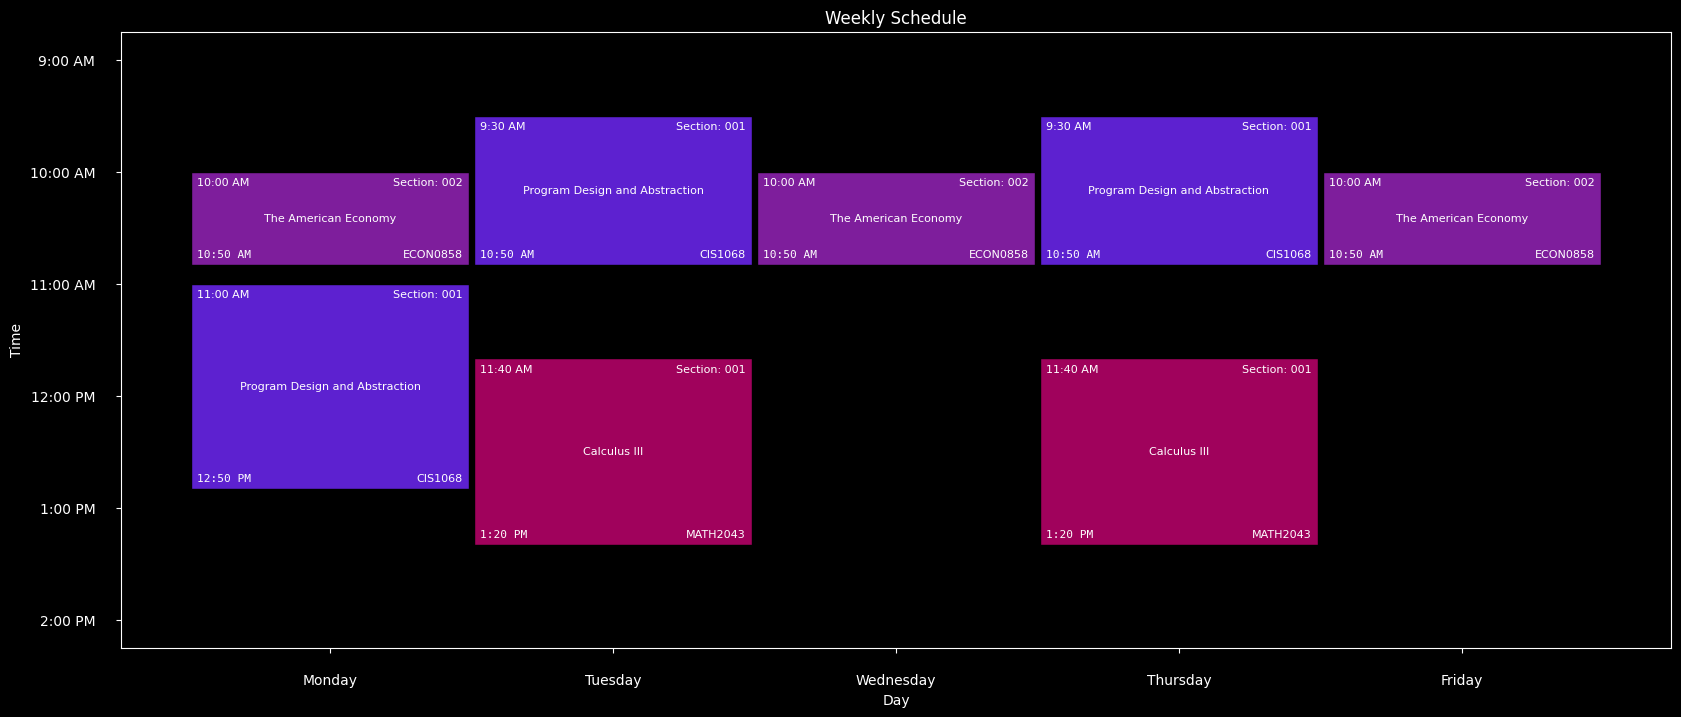

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 13.17 hrs, BREAK_TOTAL: 2.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


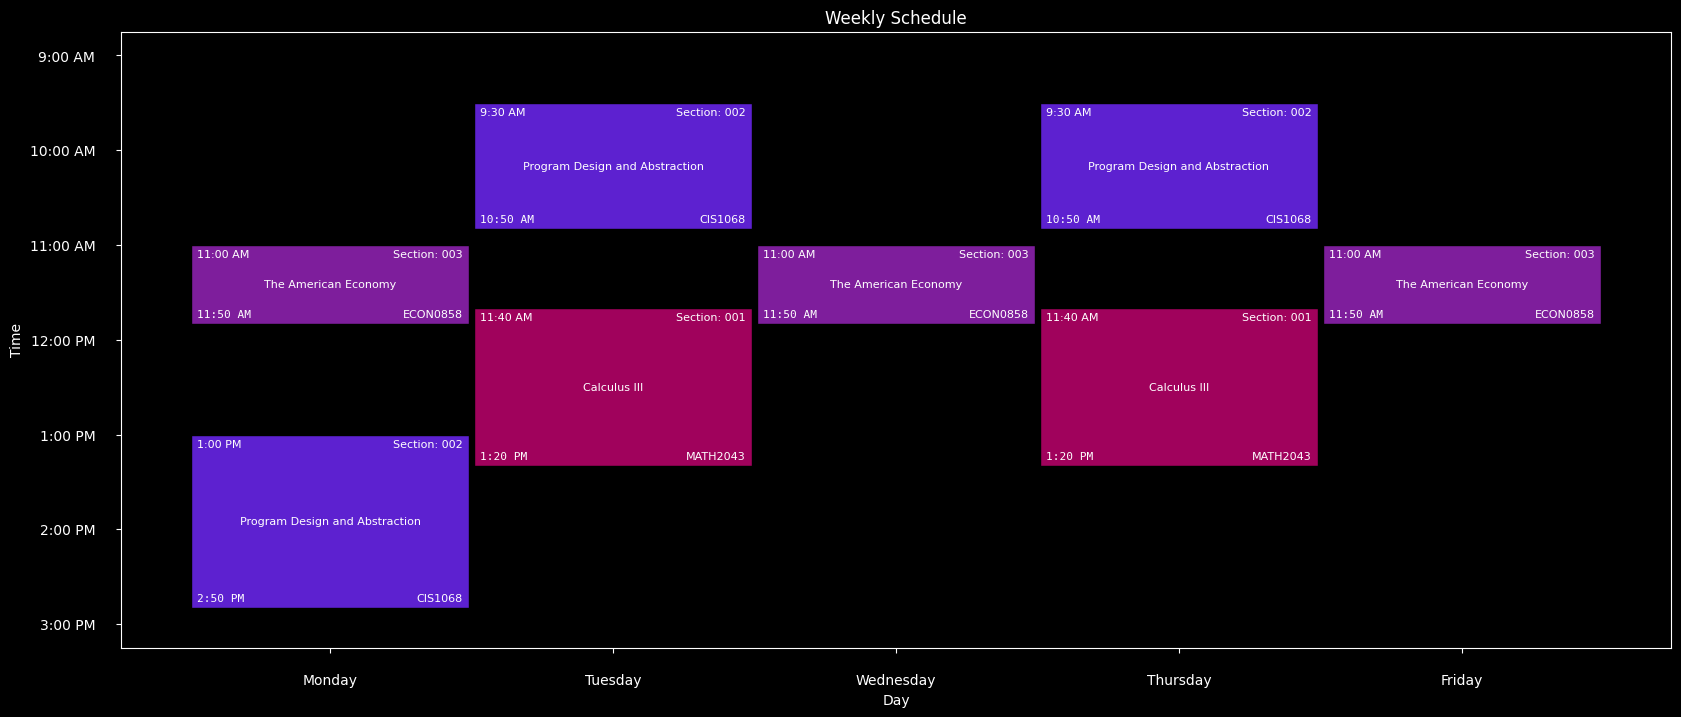

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 13.17 hrs, BREAK_TOTAL: 2.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


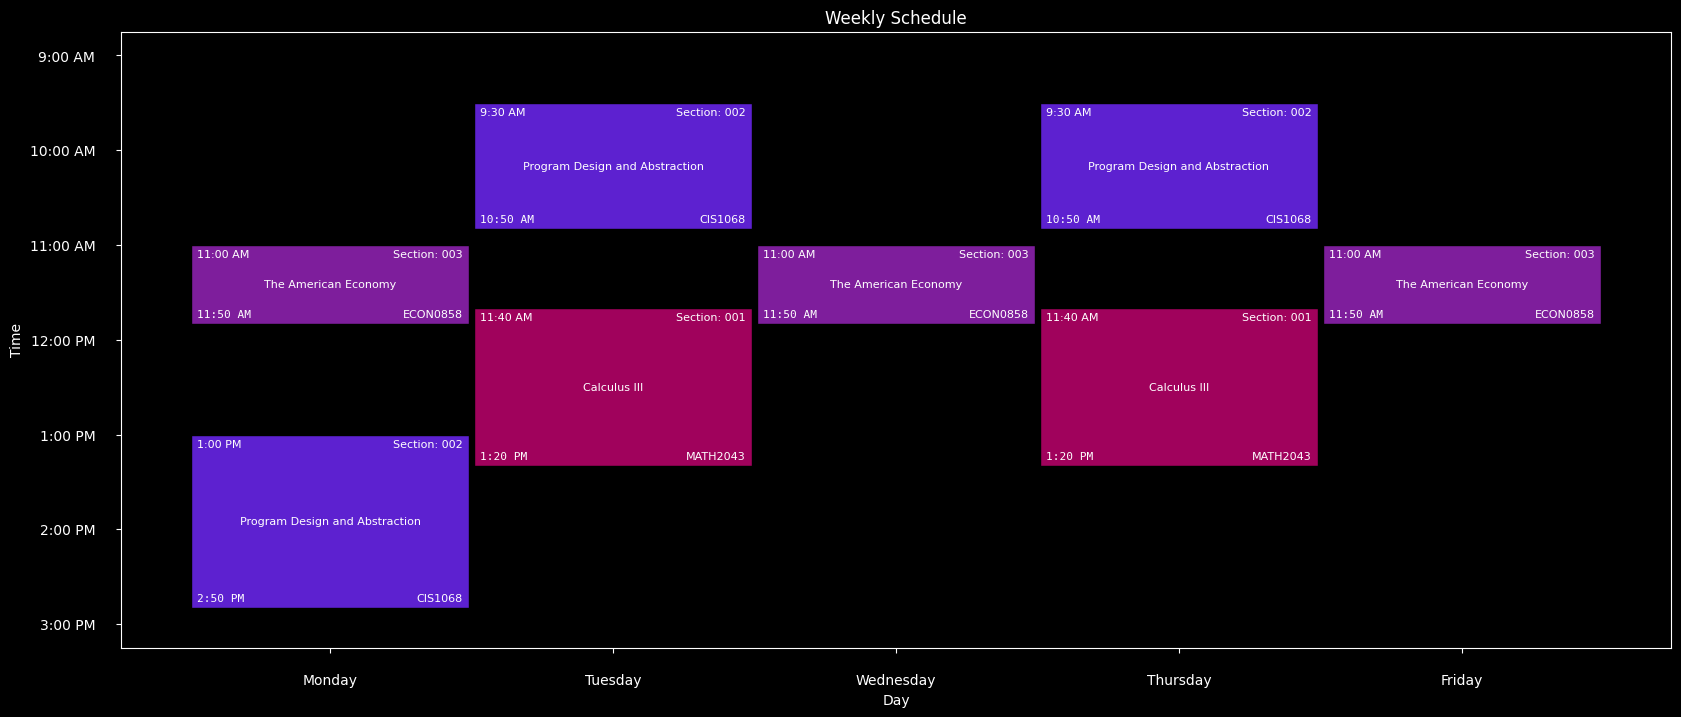

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 13.17 hrs, BREAK_TOTAL: 2.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


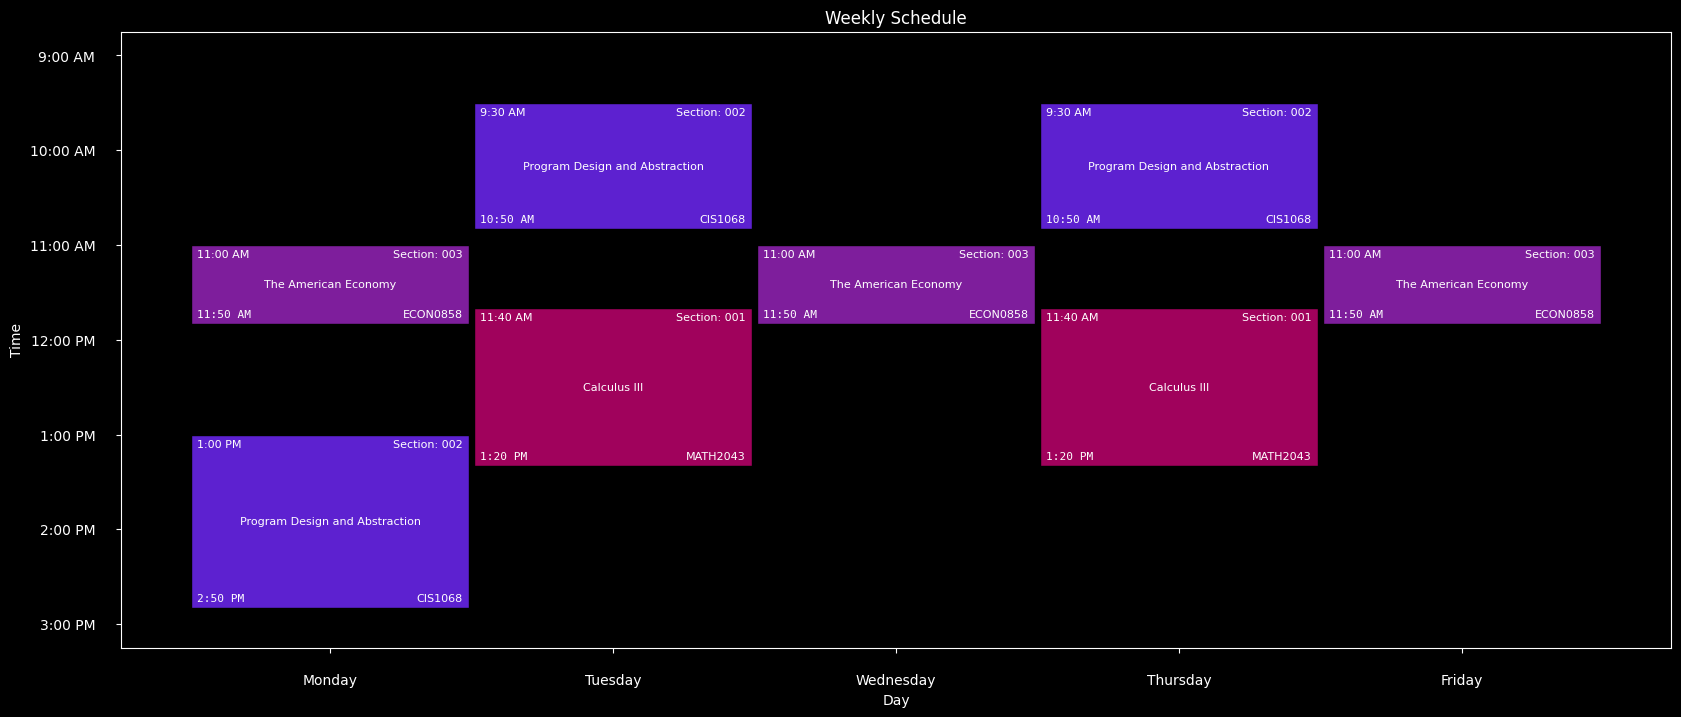

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 13.17 hrs, BREAK_TOTAL: 2.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


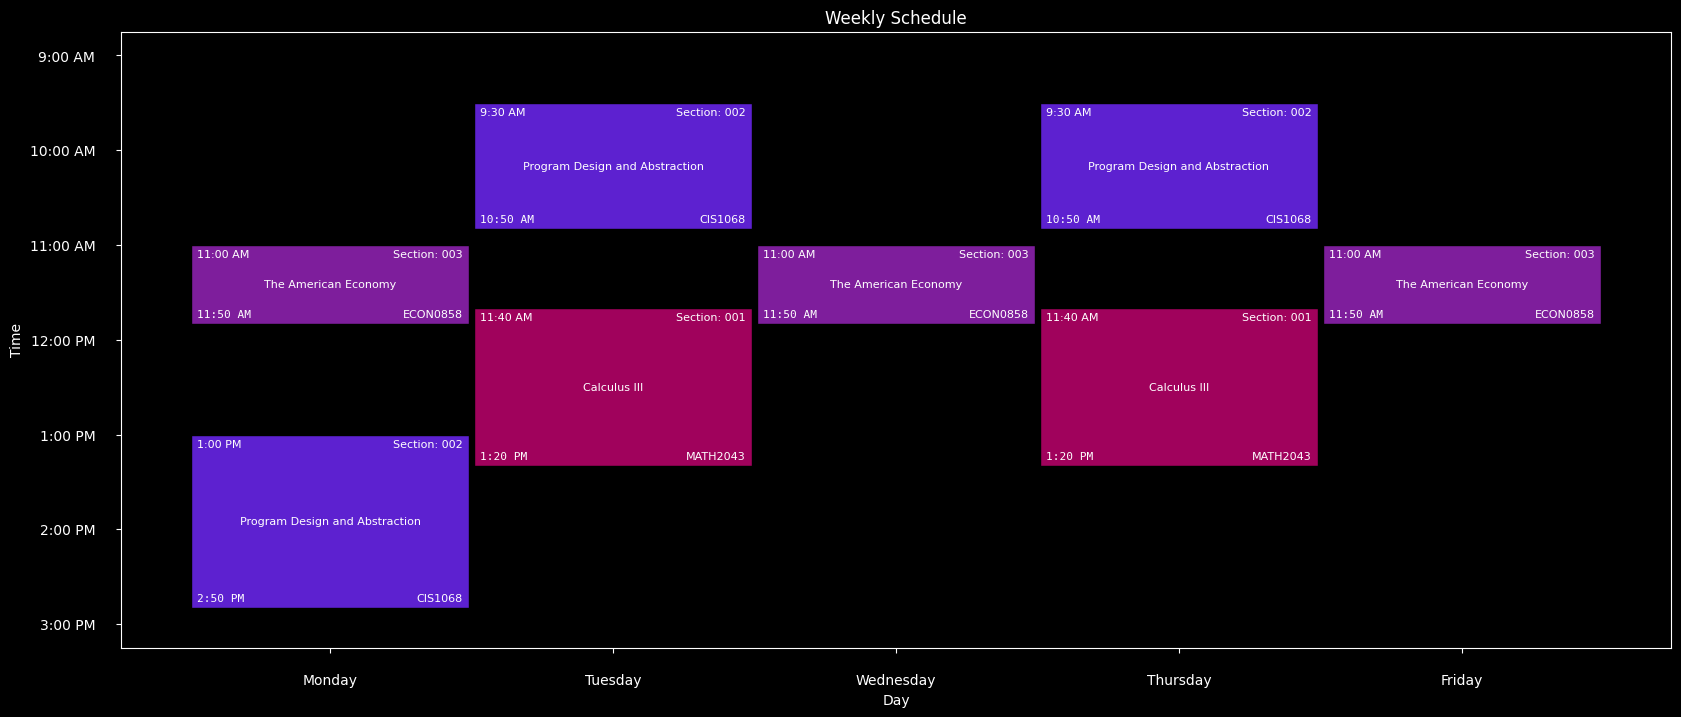

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 13.17 hrs, BREAK_TOTAL: 2.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


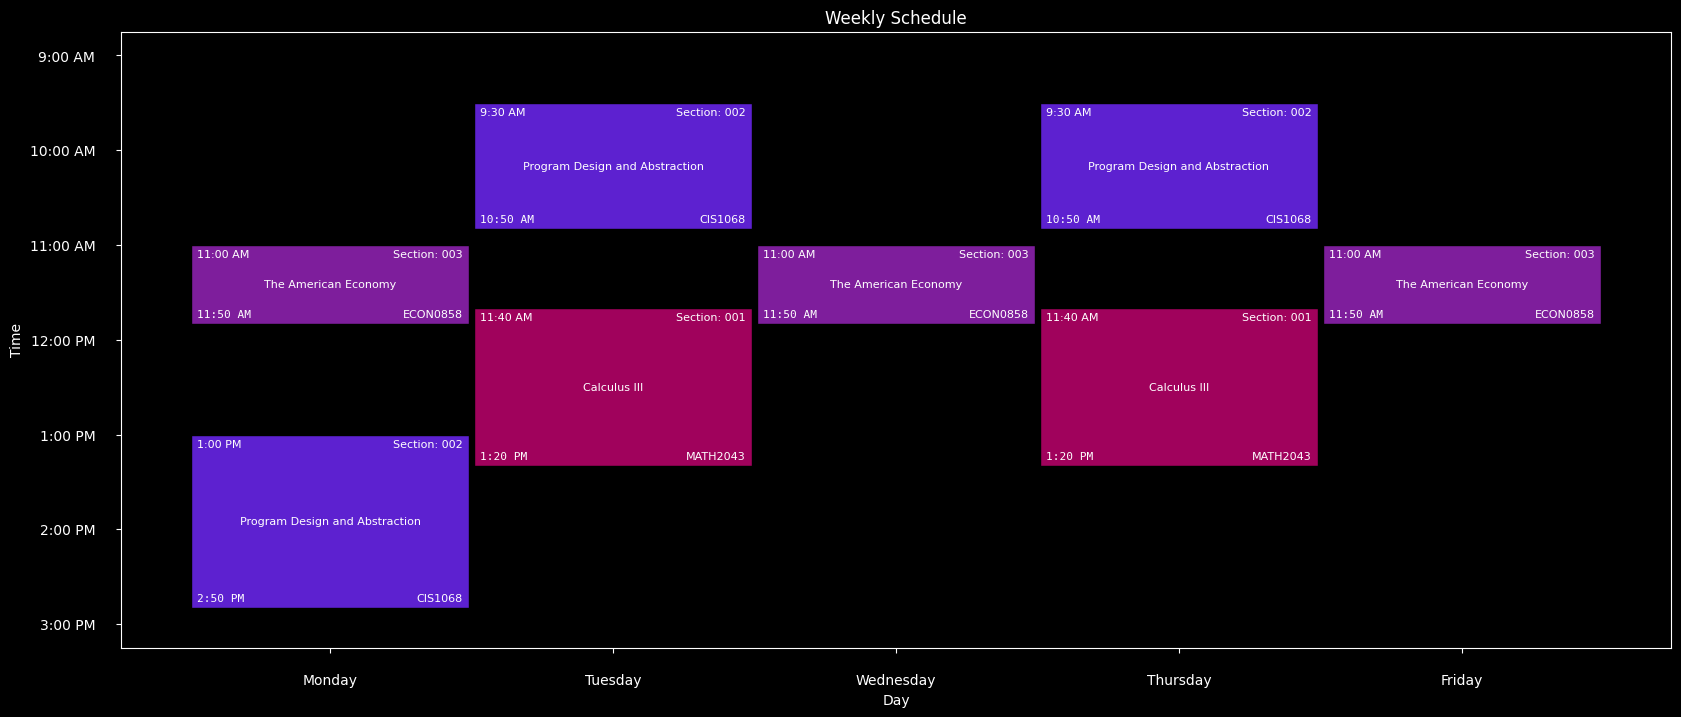

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 13.17 hrs, BREAK_TOTAL: 2.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


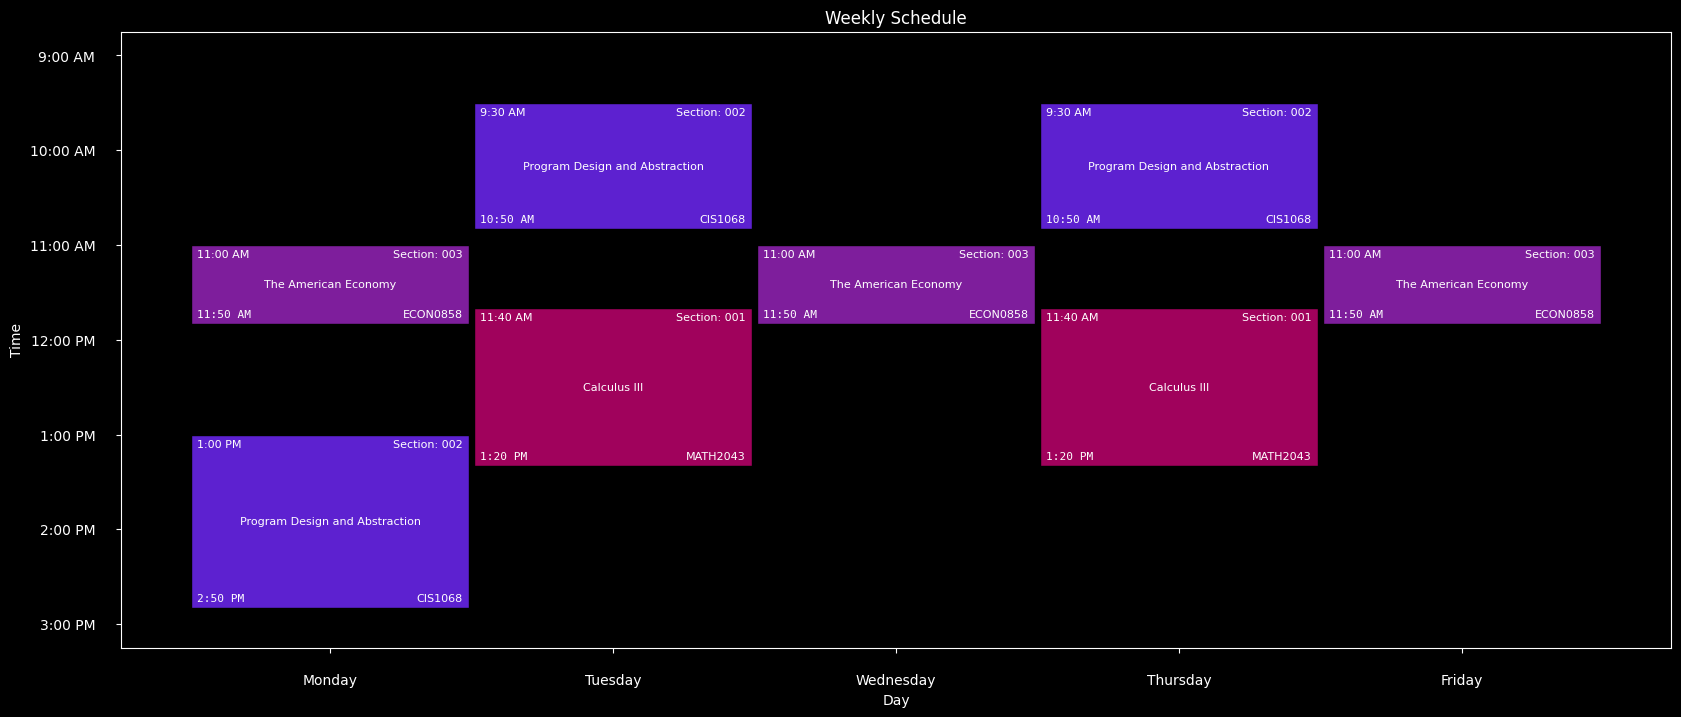

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 14.17 hrs, BREAK_TOTAL: 3.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


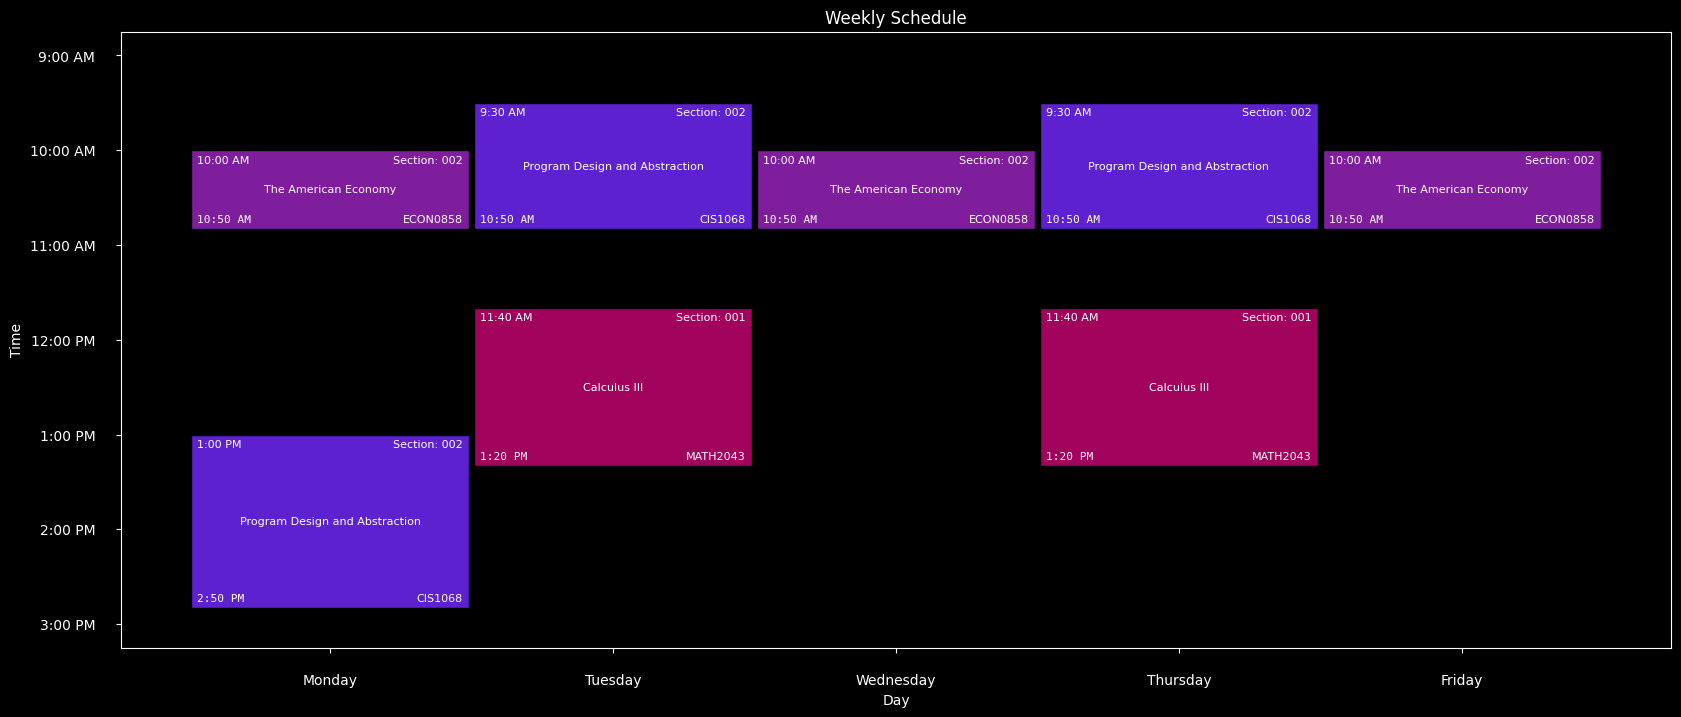

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 14.17 hrs, BREAK_TOTAL: 3.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


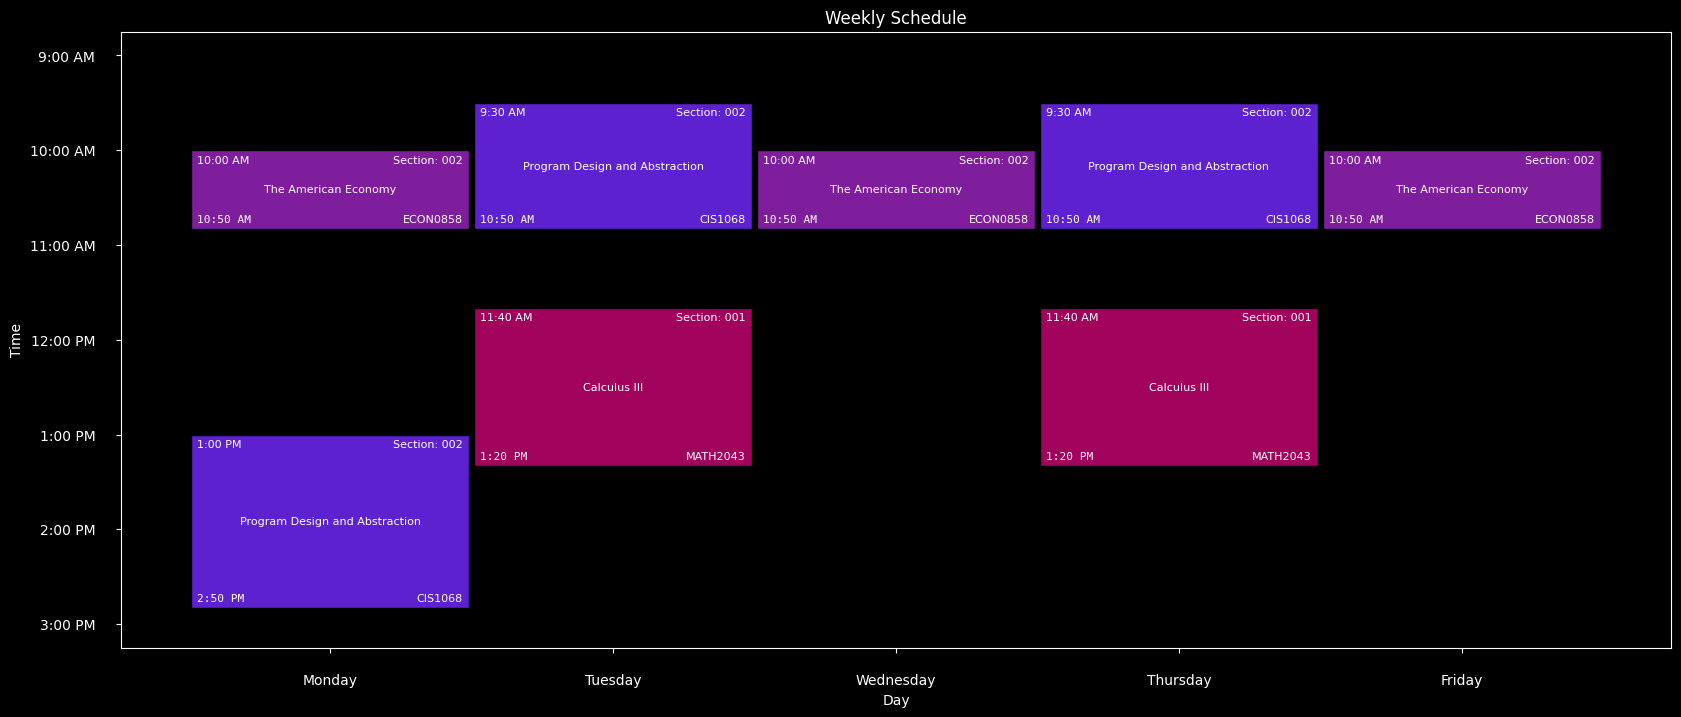

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 14.17 hrs, BREAK_TOTAL: 3.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


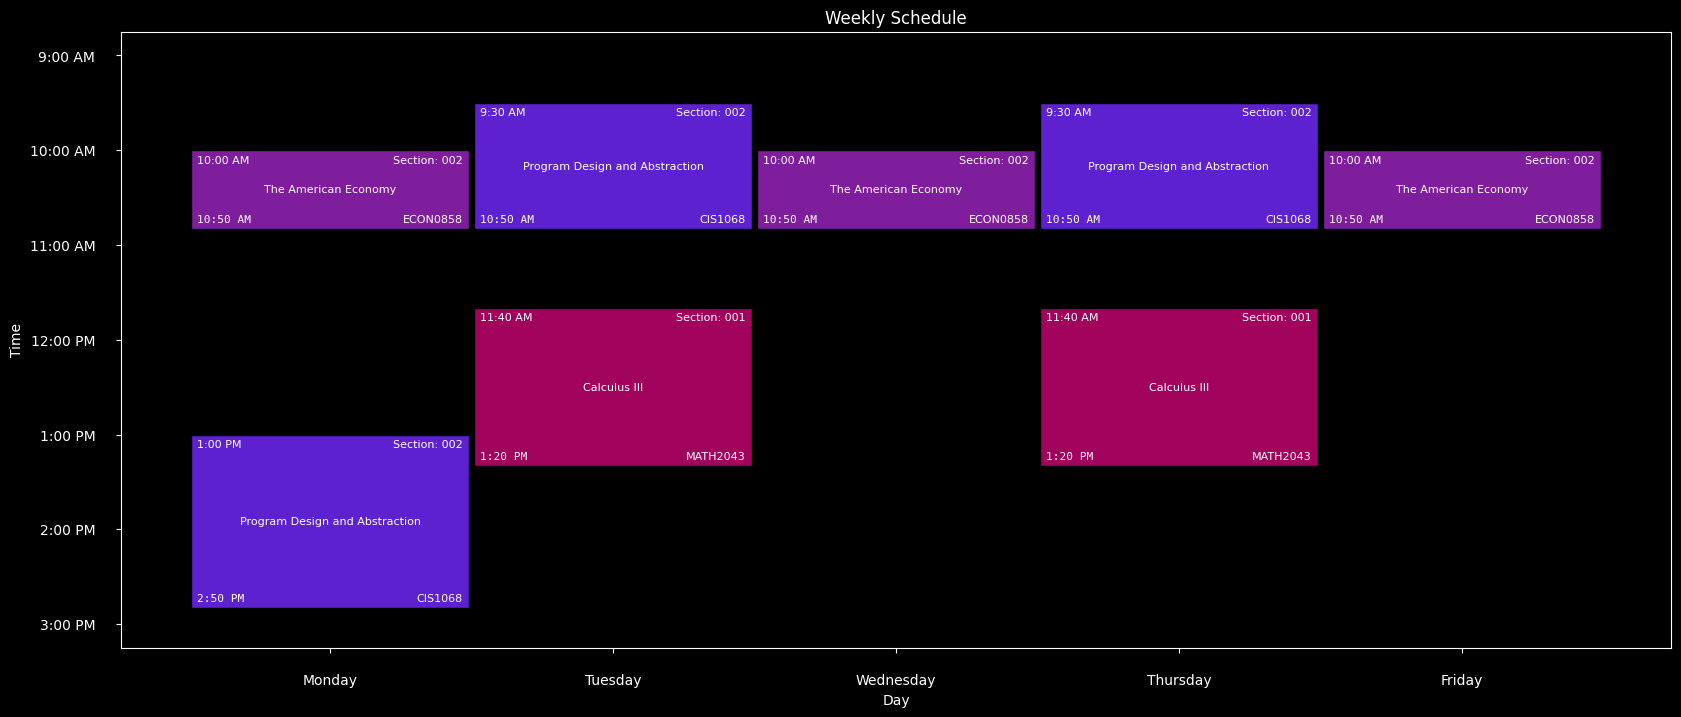

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 14.17 hrs, BREAK_TOTAL: 3.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


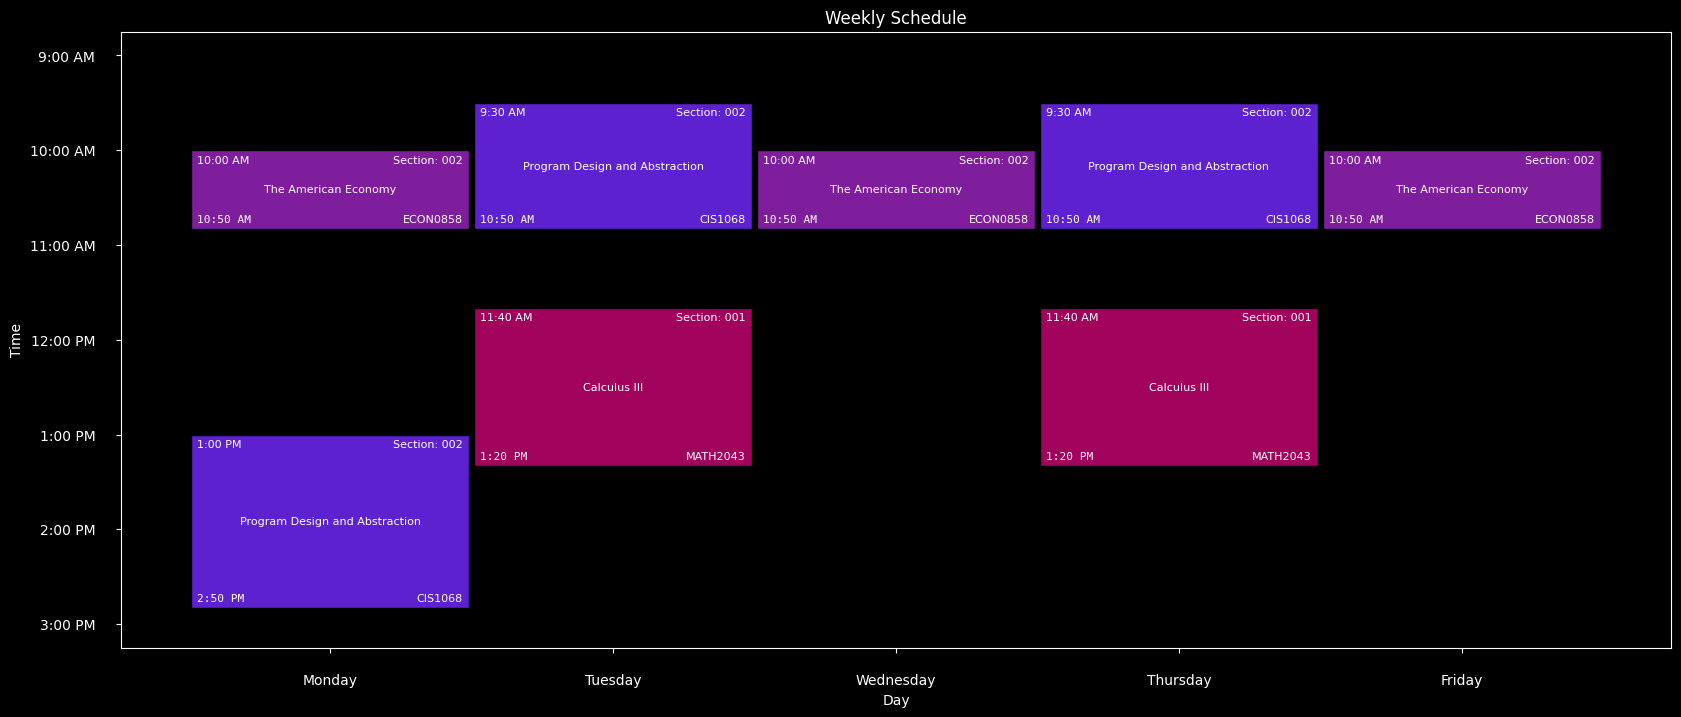

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 14.17 hrs, BREAK_TOTAL: 3.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


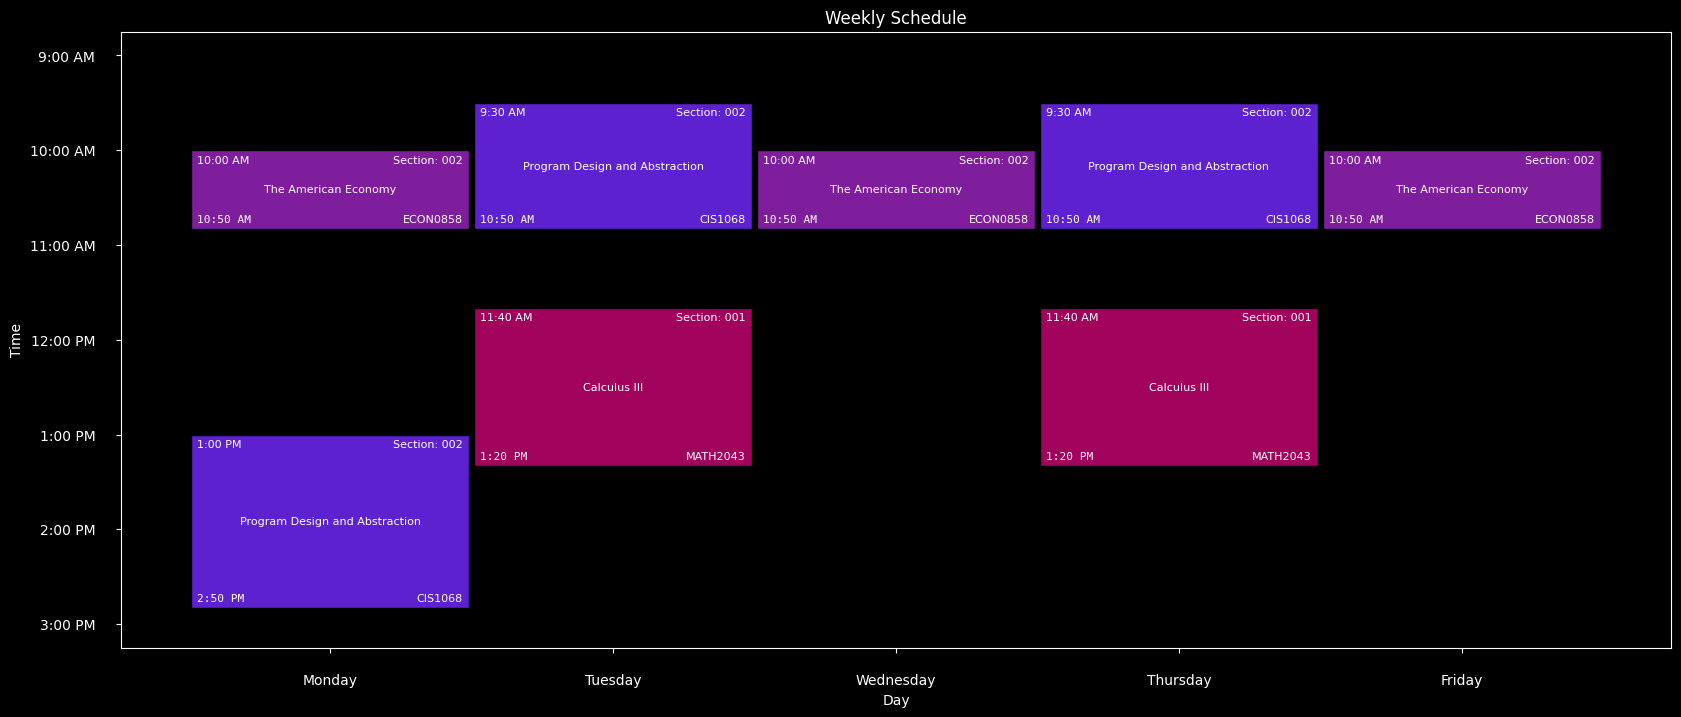

WEEK_RANGE: 5.33 hrs, WEEK_TOTAL: 14.17 hrs, BREAK_TOTAL: 3.83 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 001 | Farzana Chaudhry | 3.40 | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


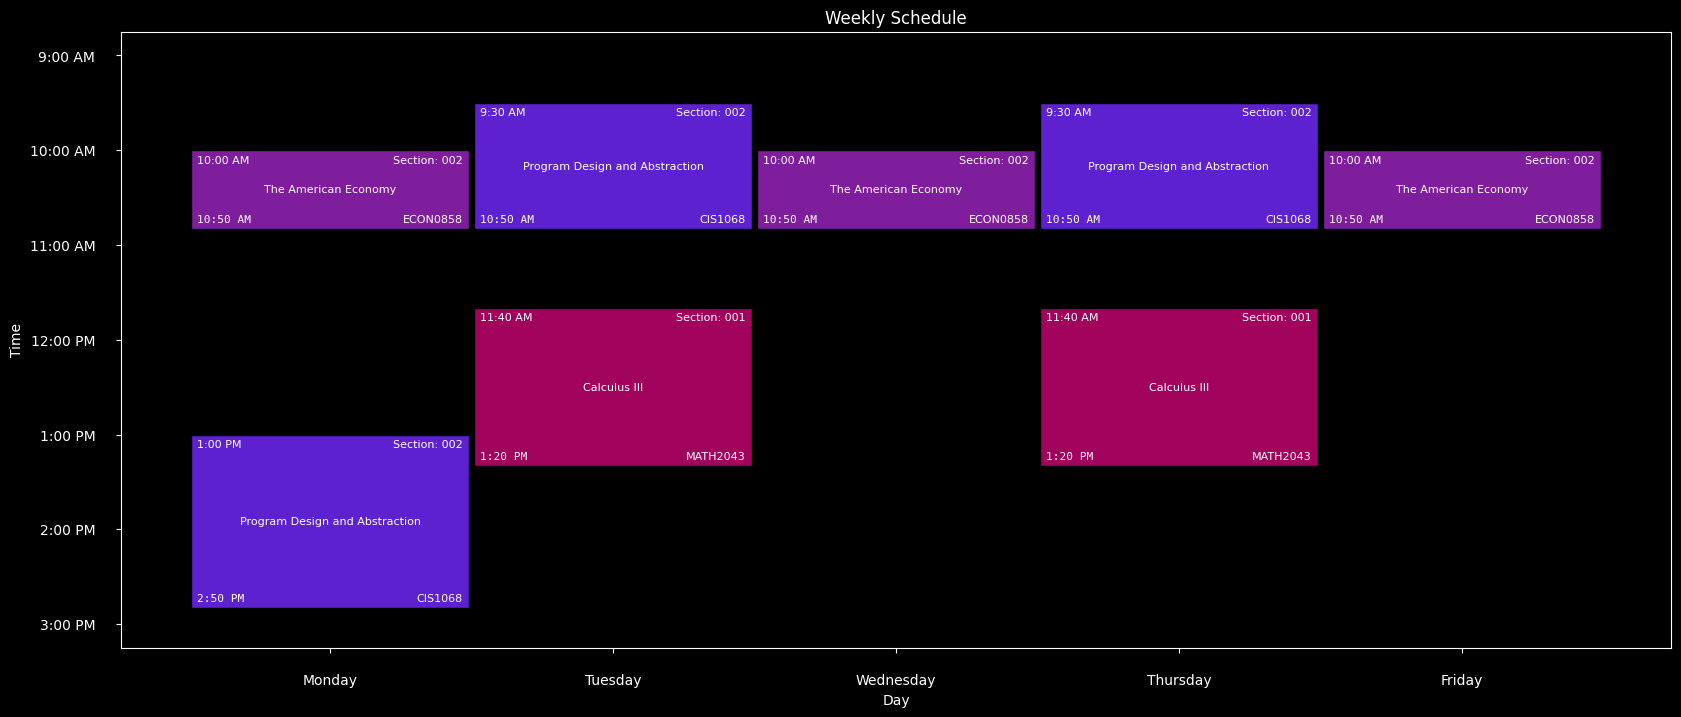

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


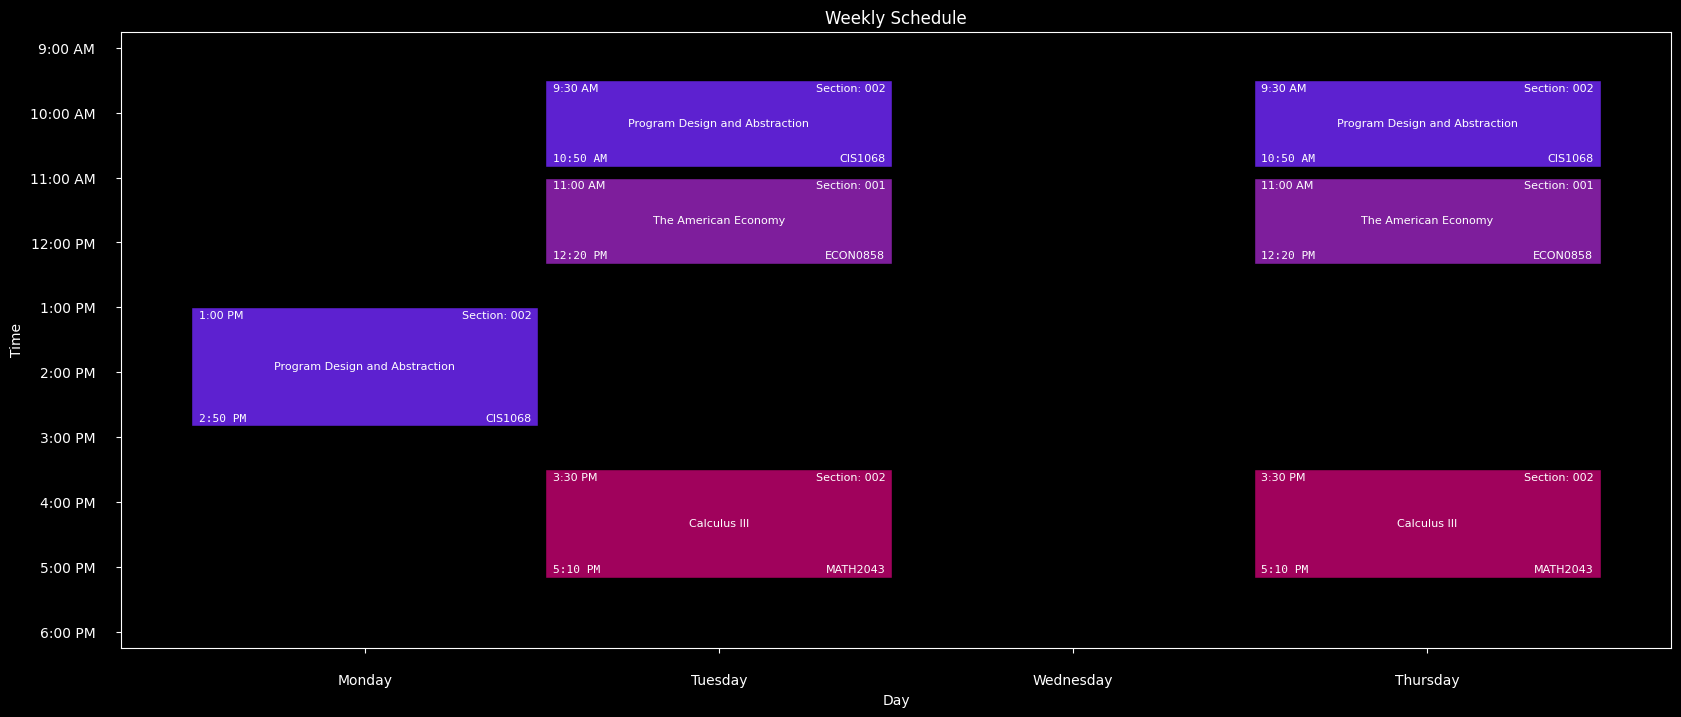

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


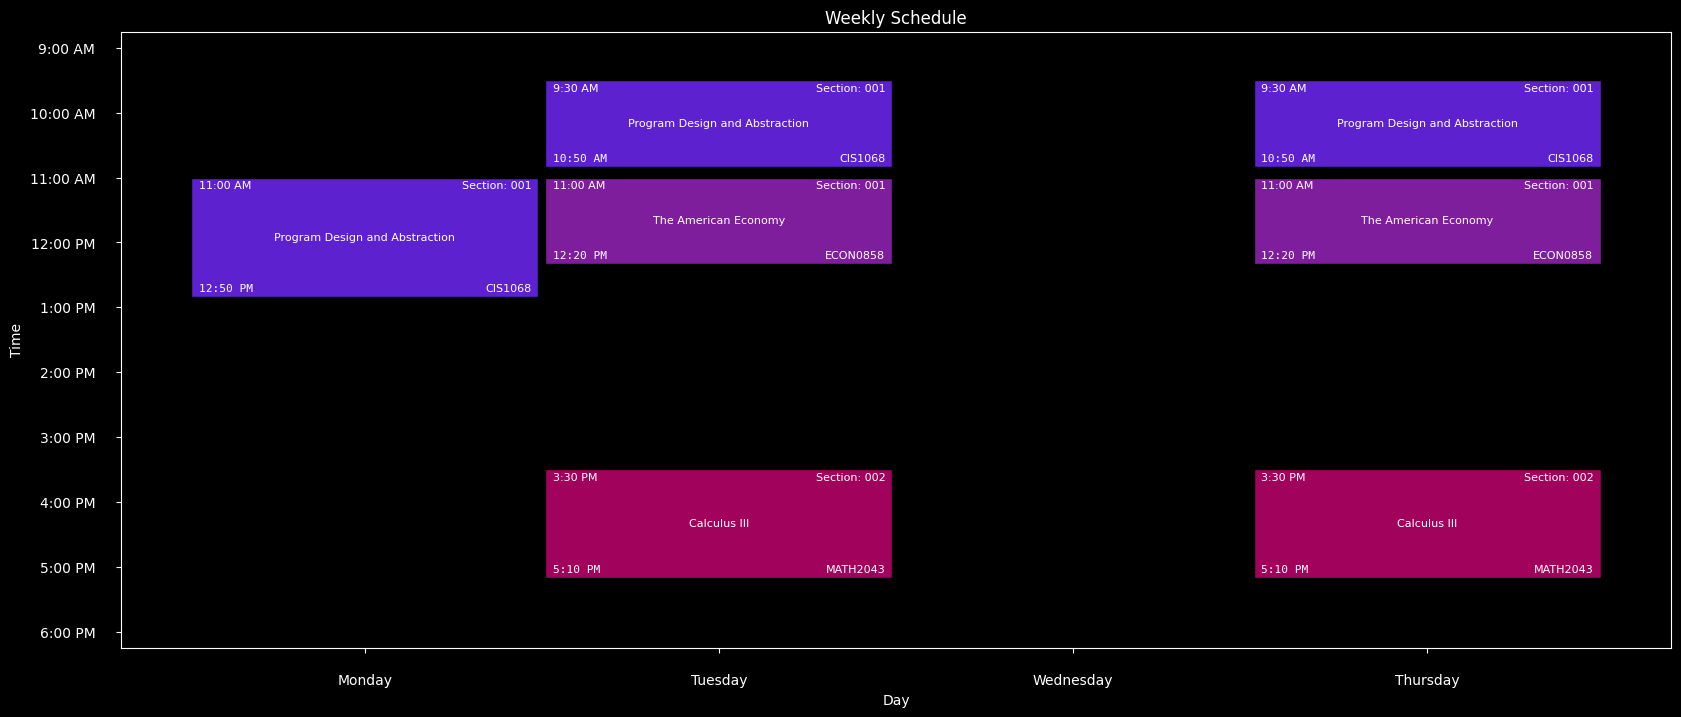

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


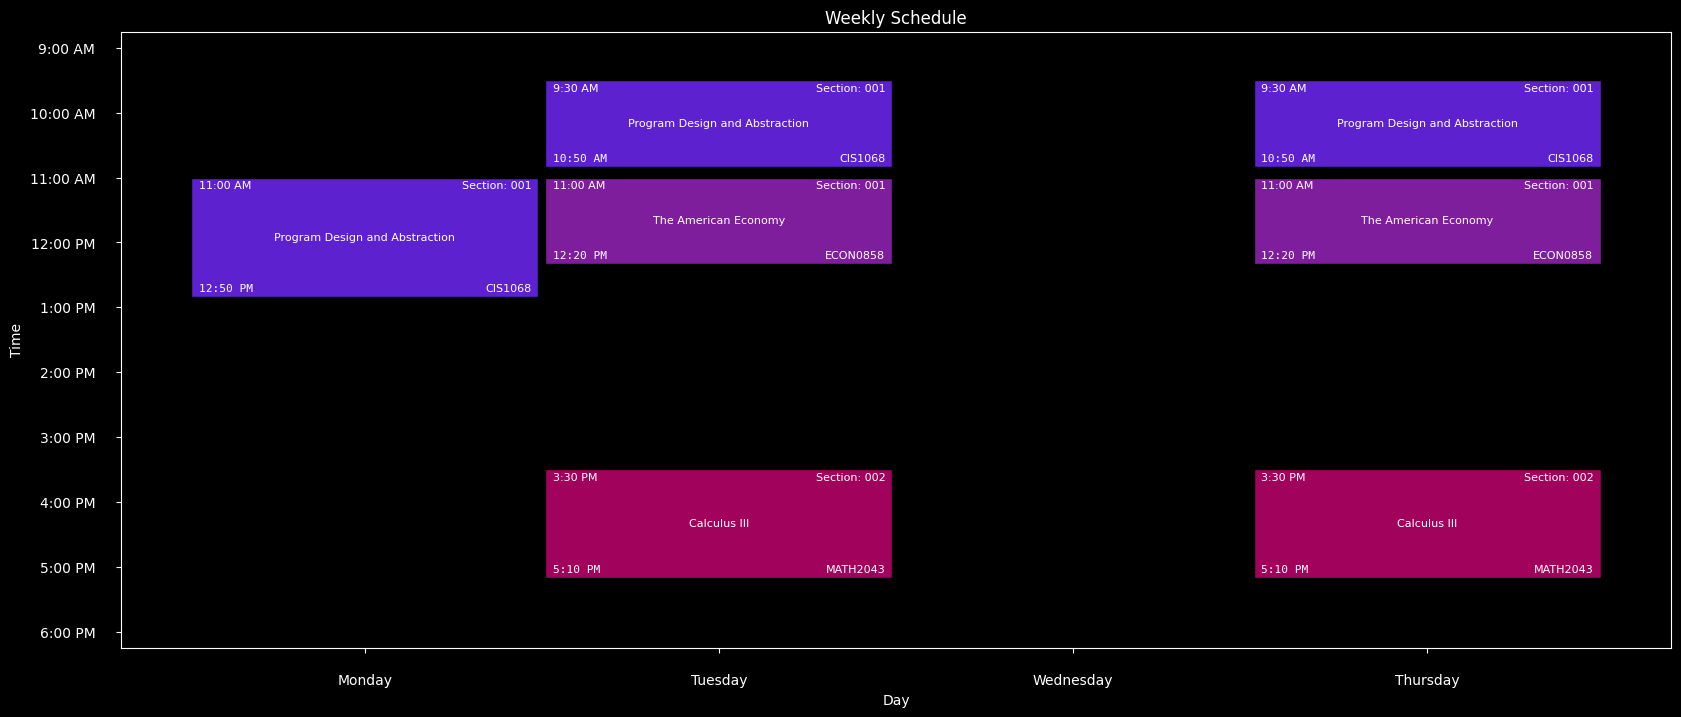

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


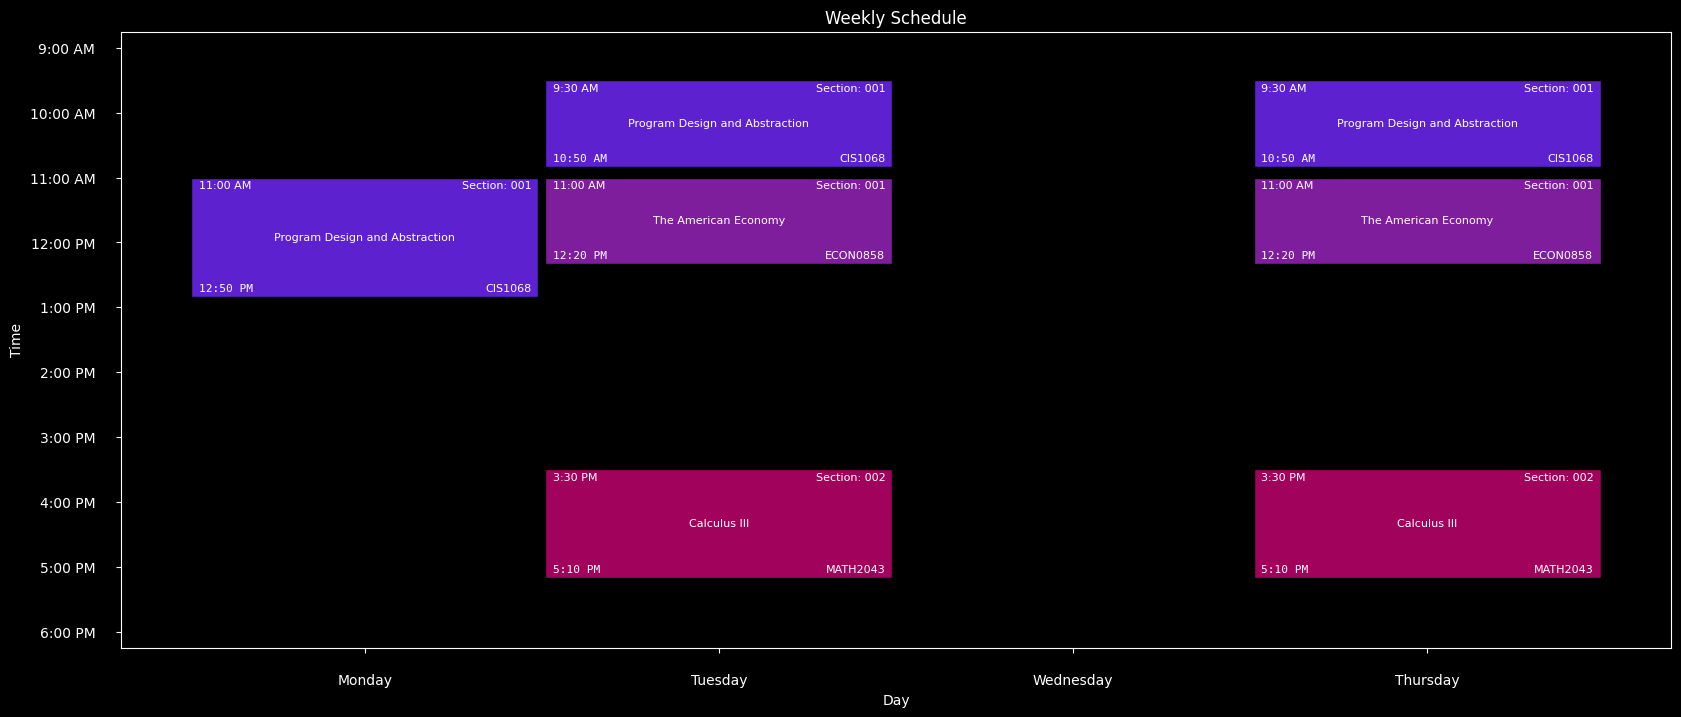

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


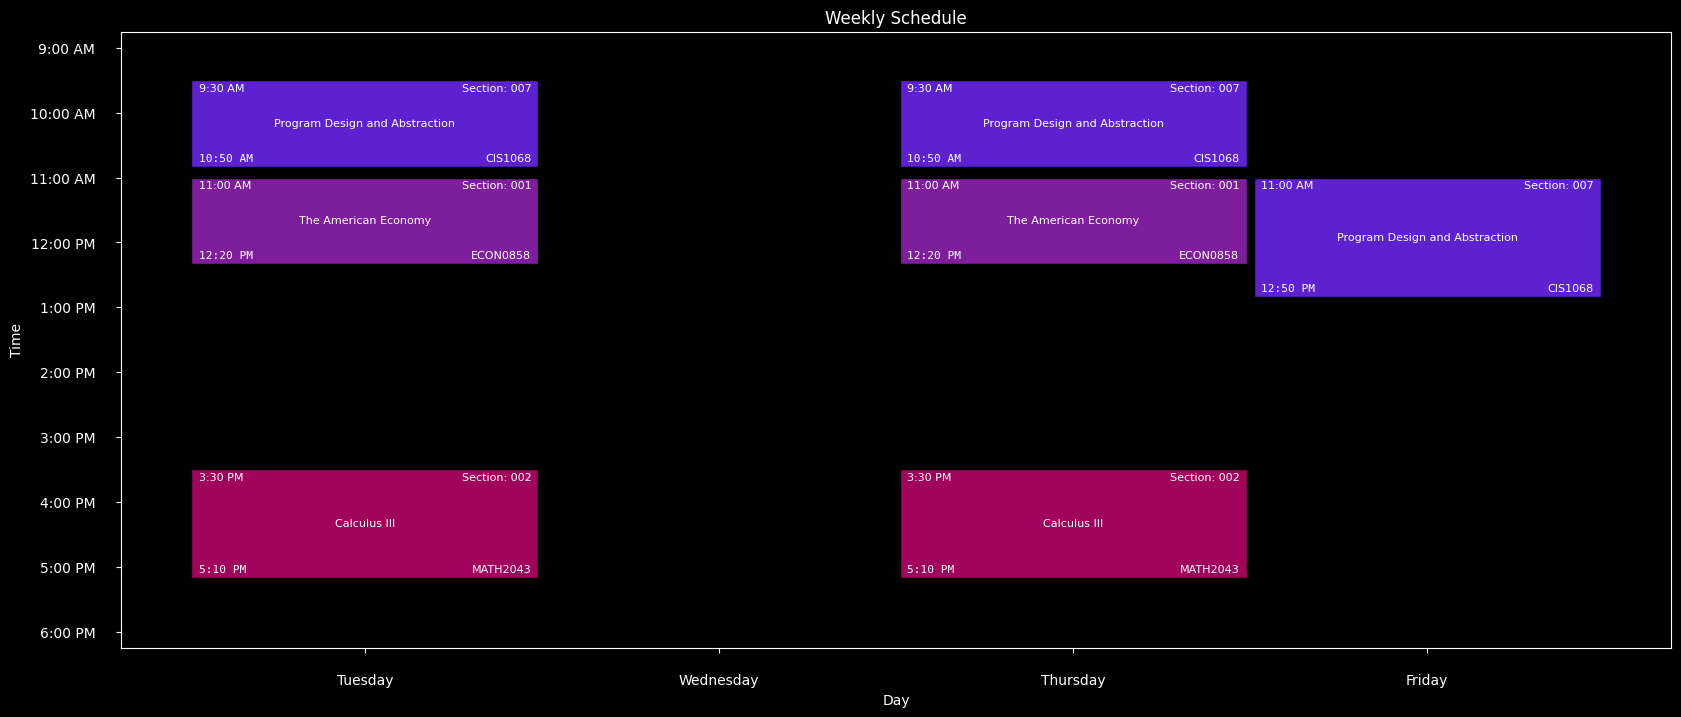

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


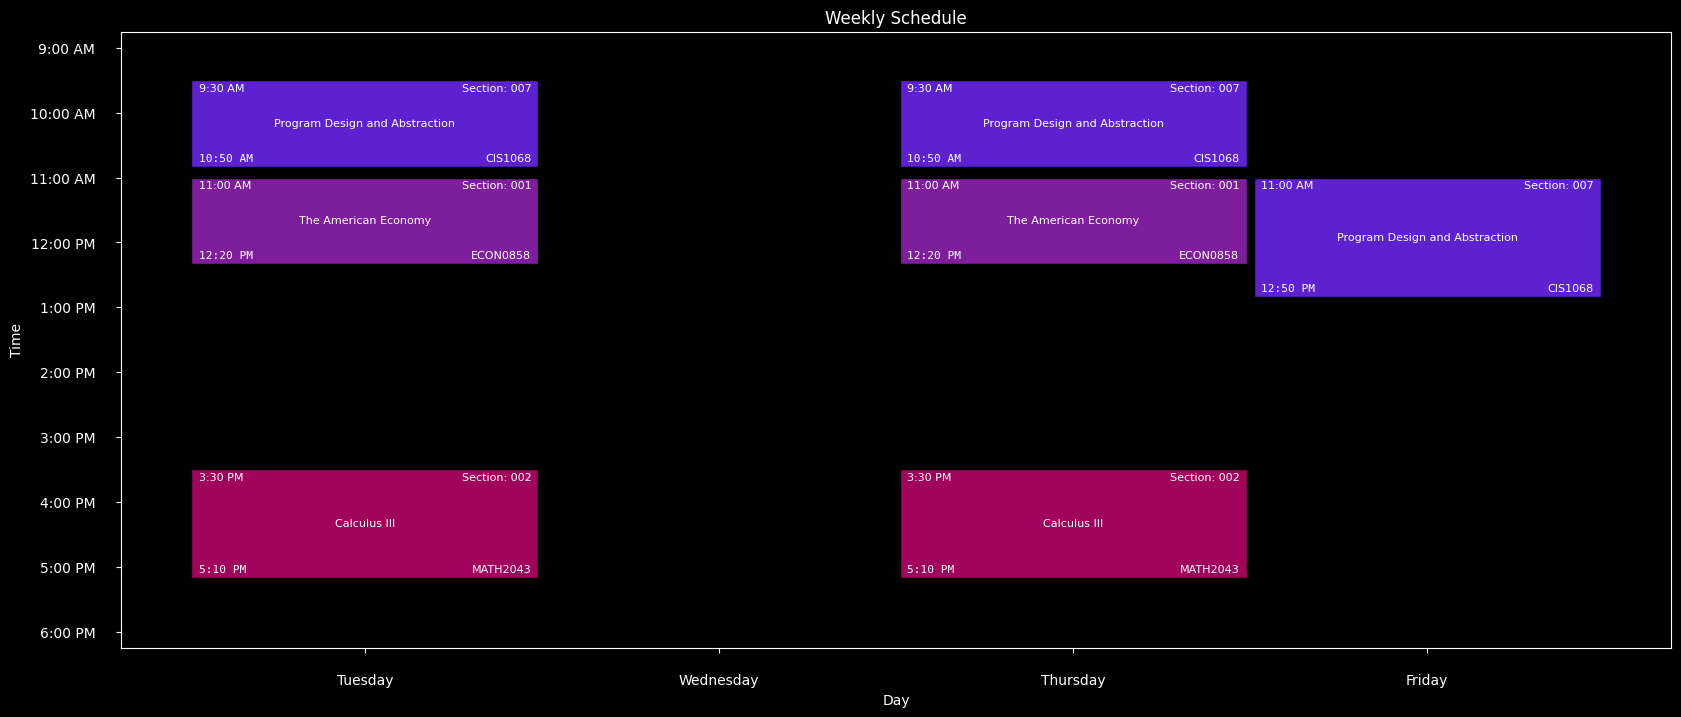

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


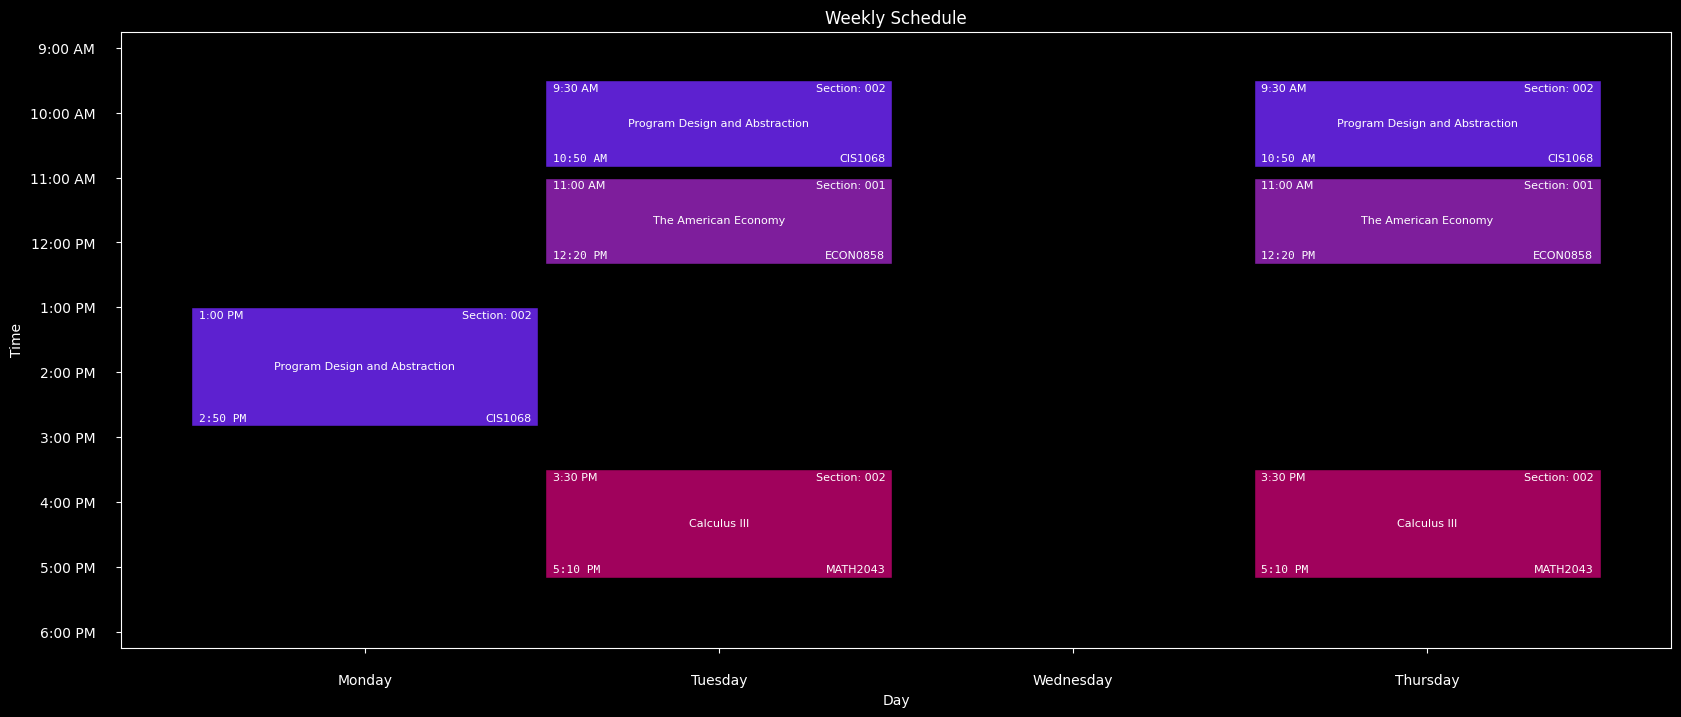

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


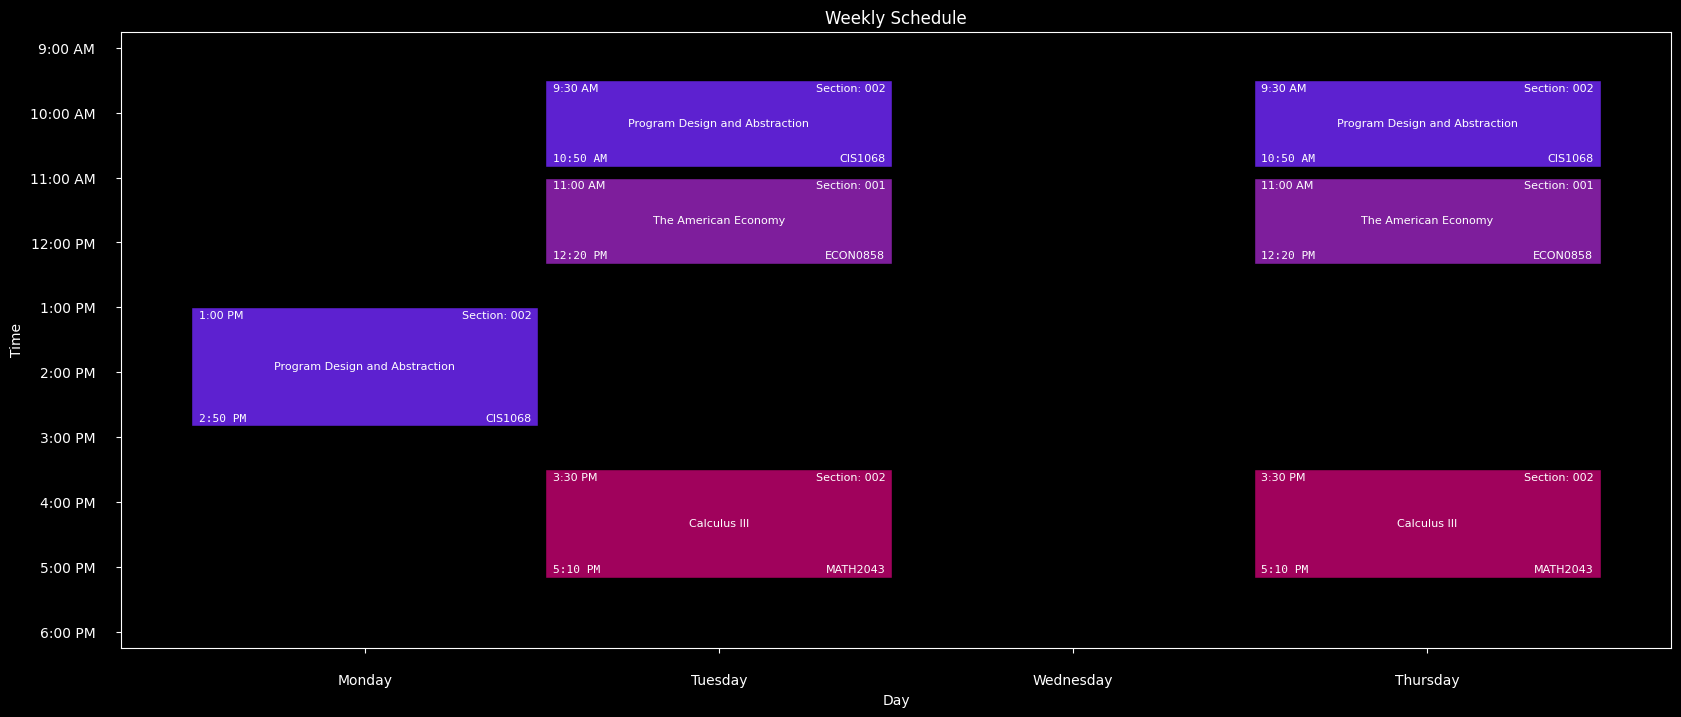

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


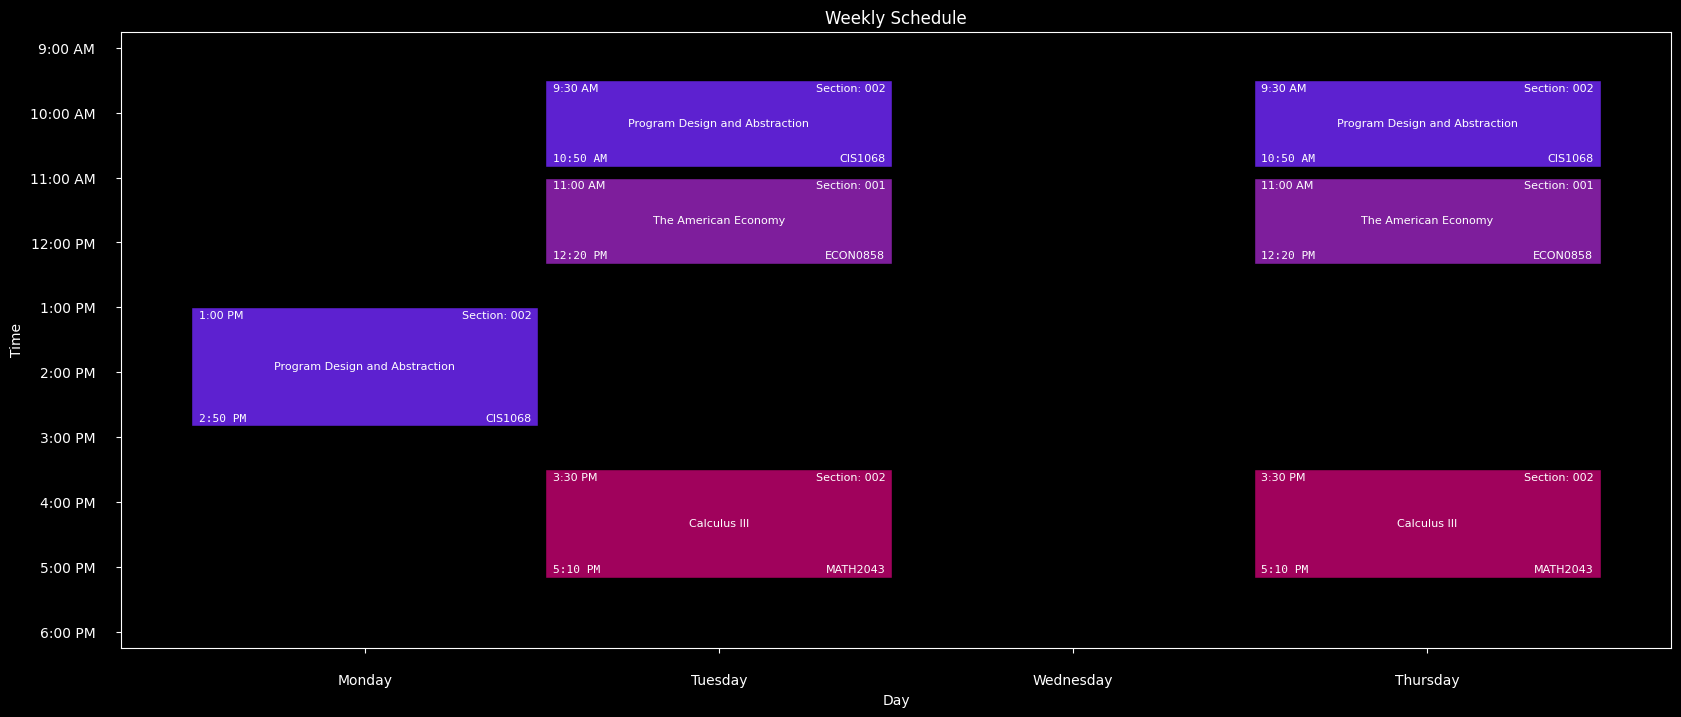

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


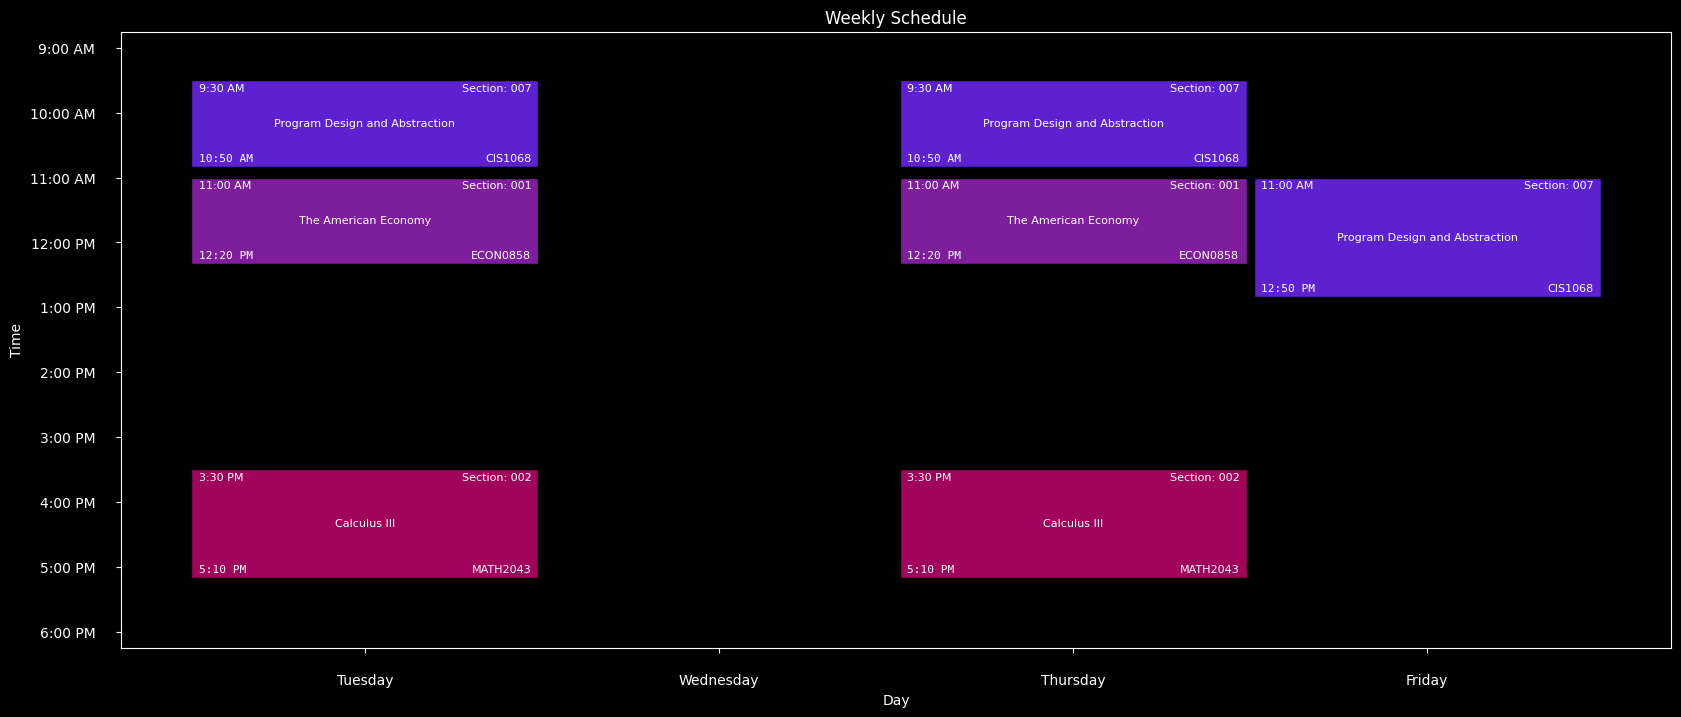

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


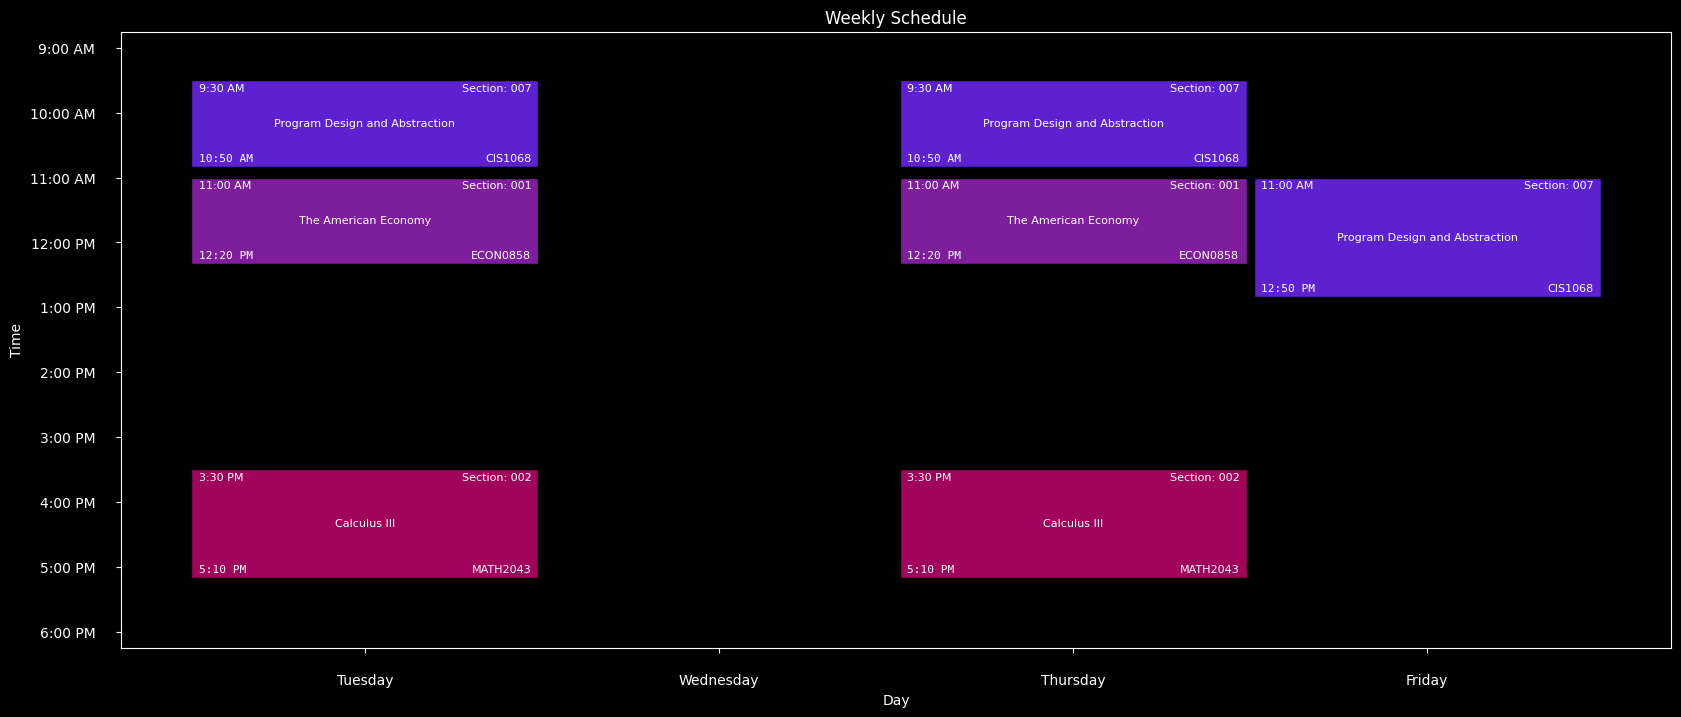

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


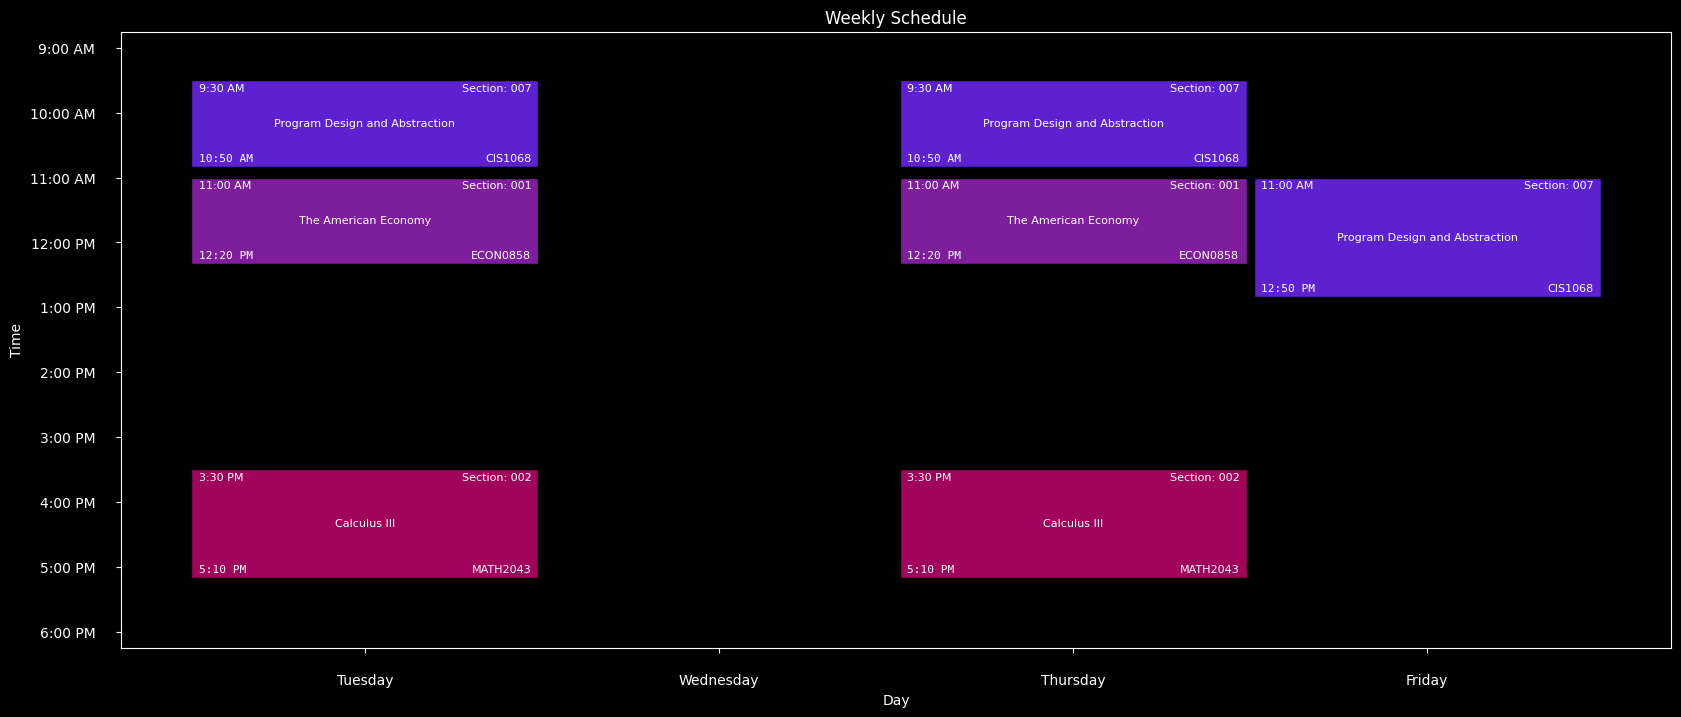

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


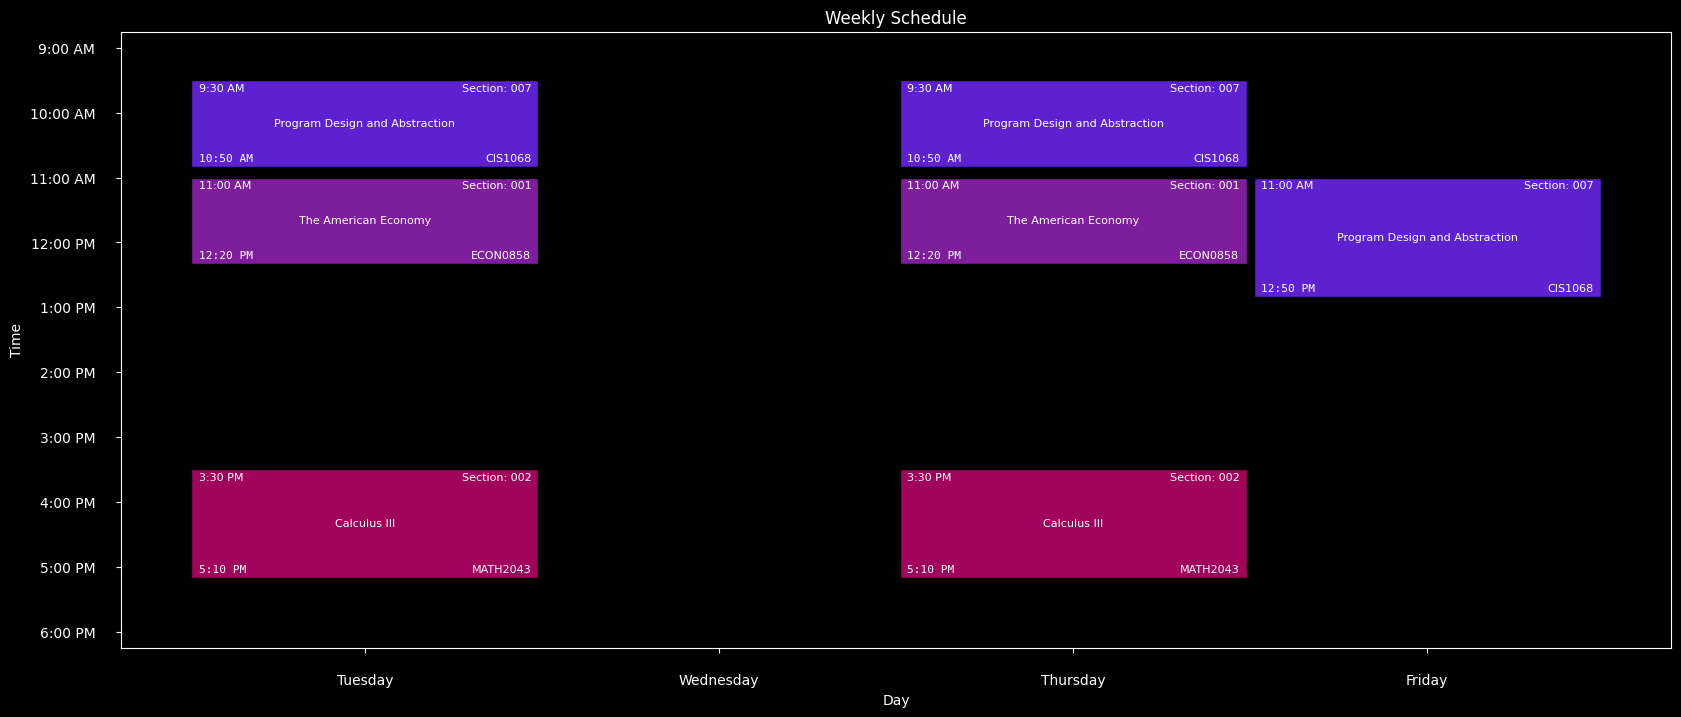

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


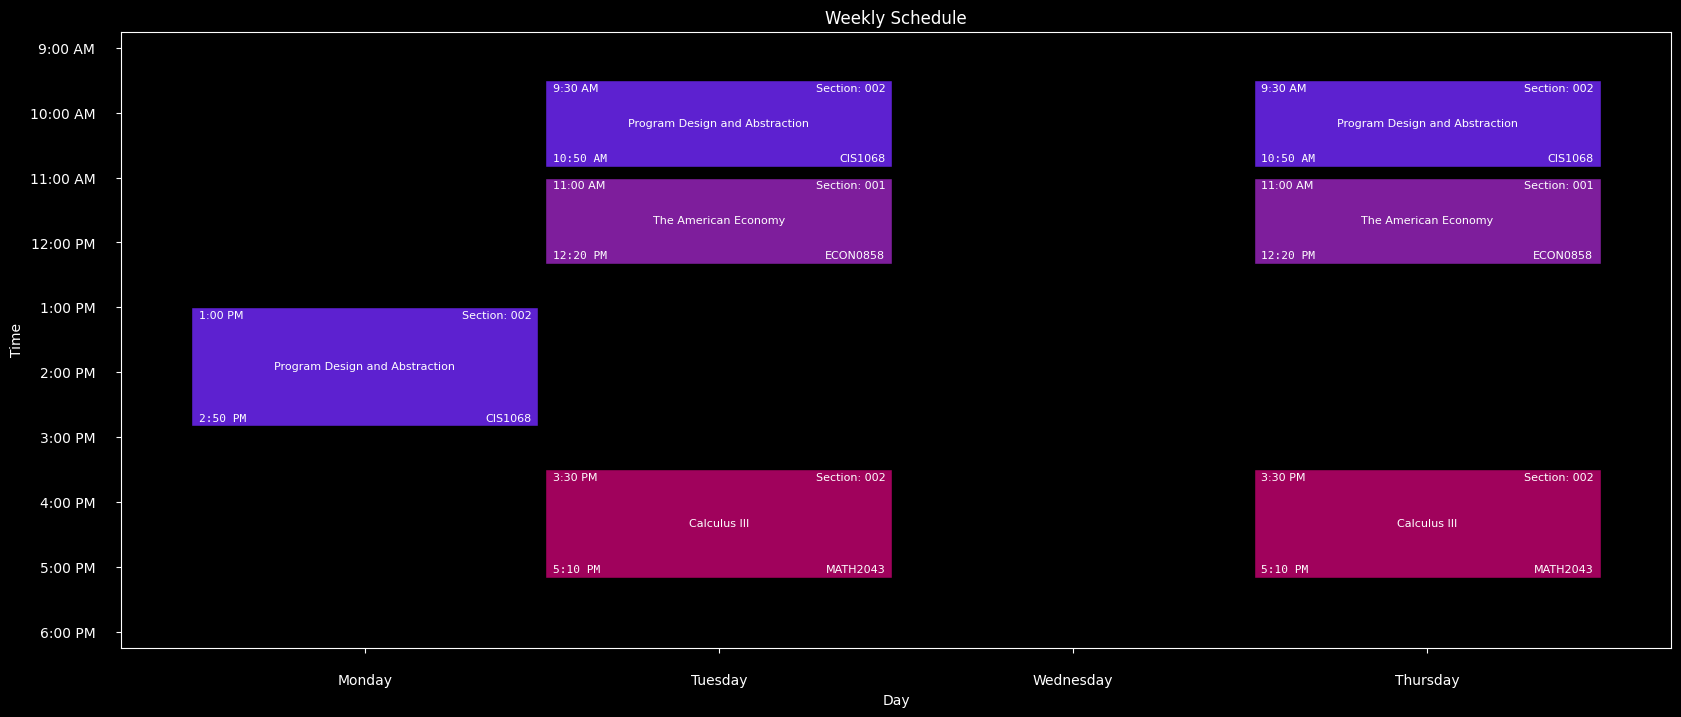

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


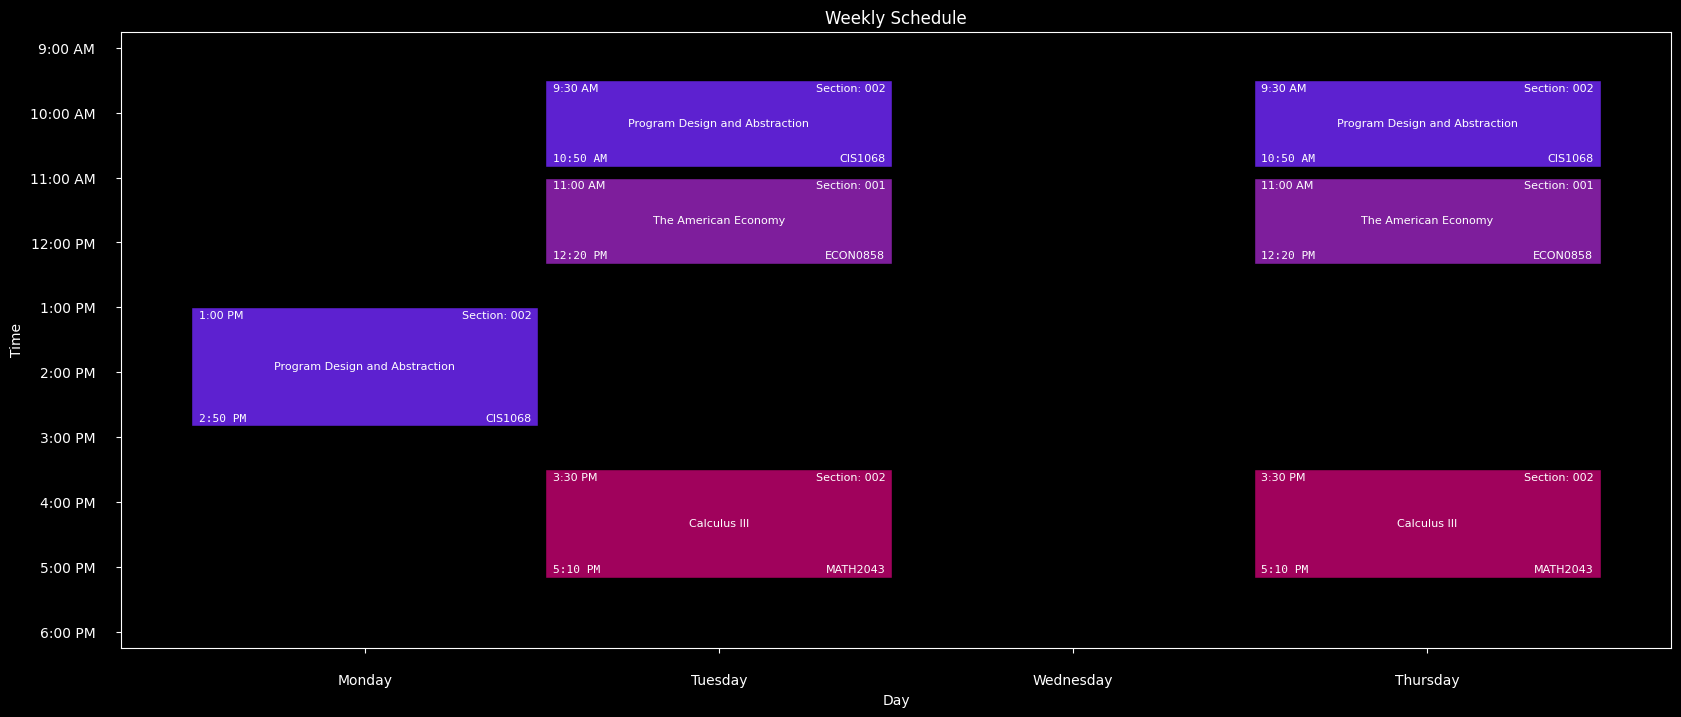

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


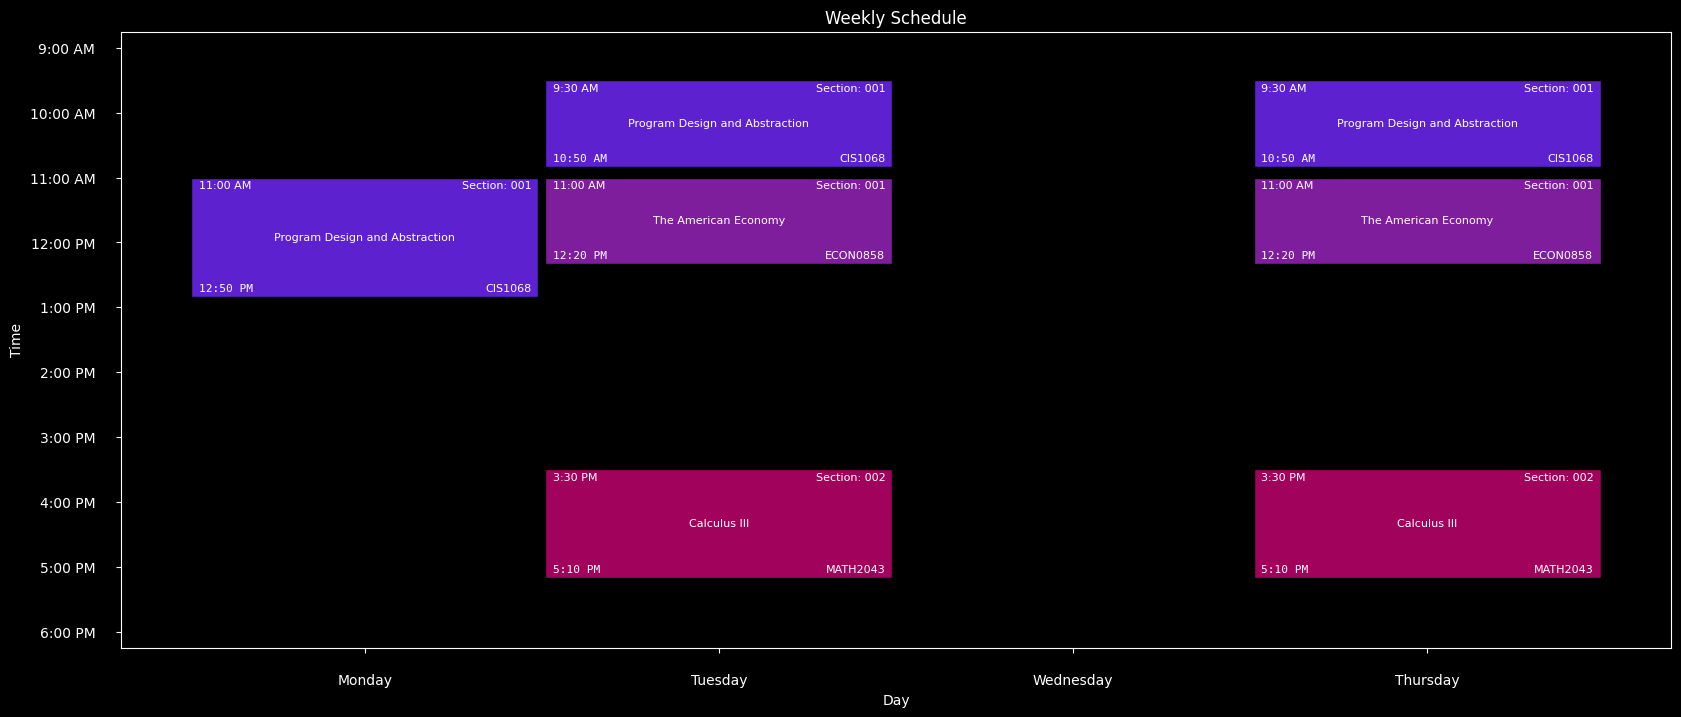

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


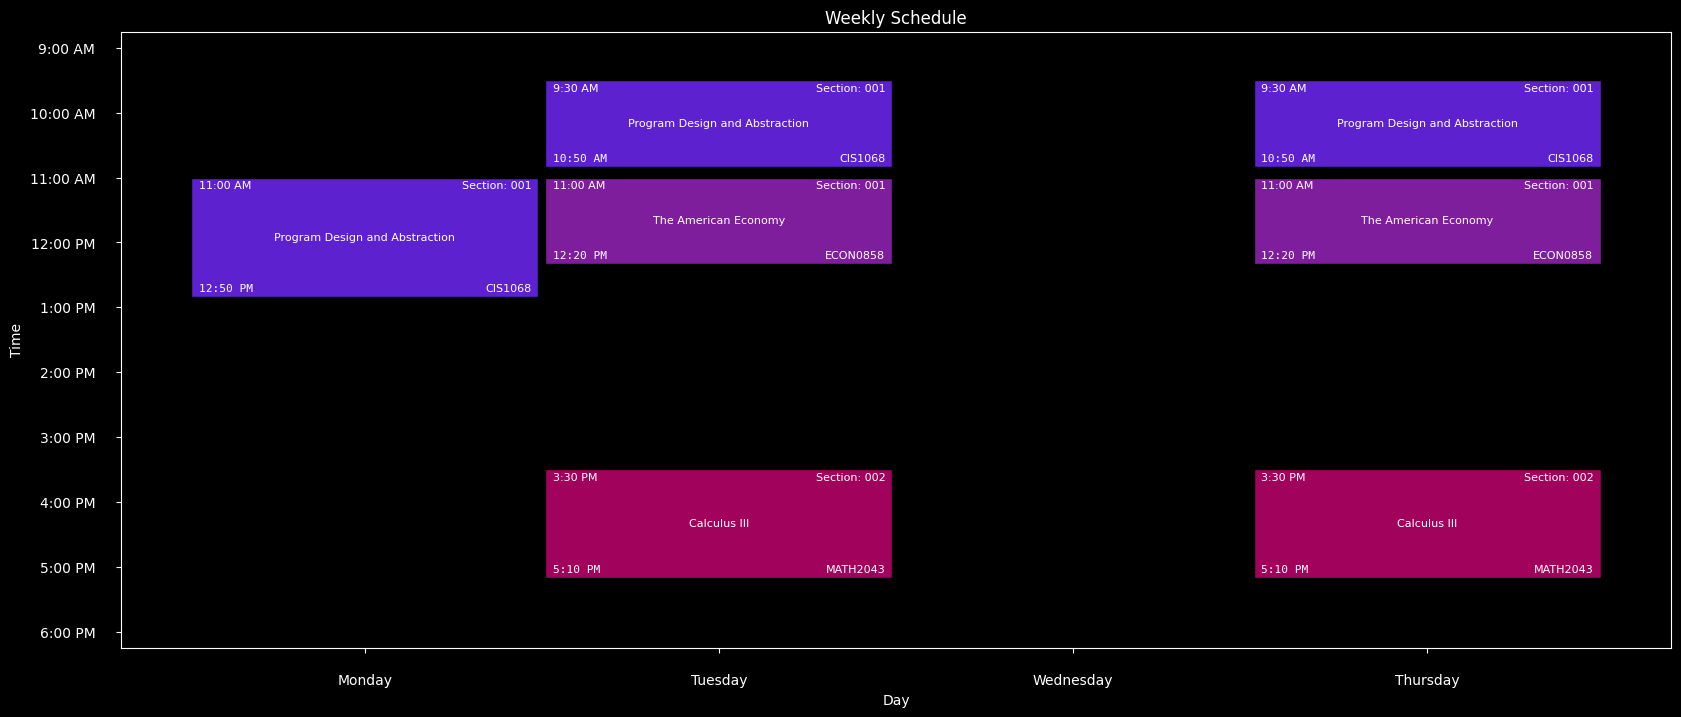

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 17.17 hrs, BREAK_TOTAL: 6.67 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 001 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


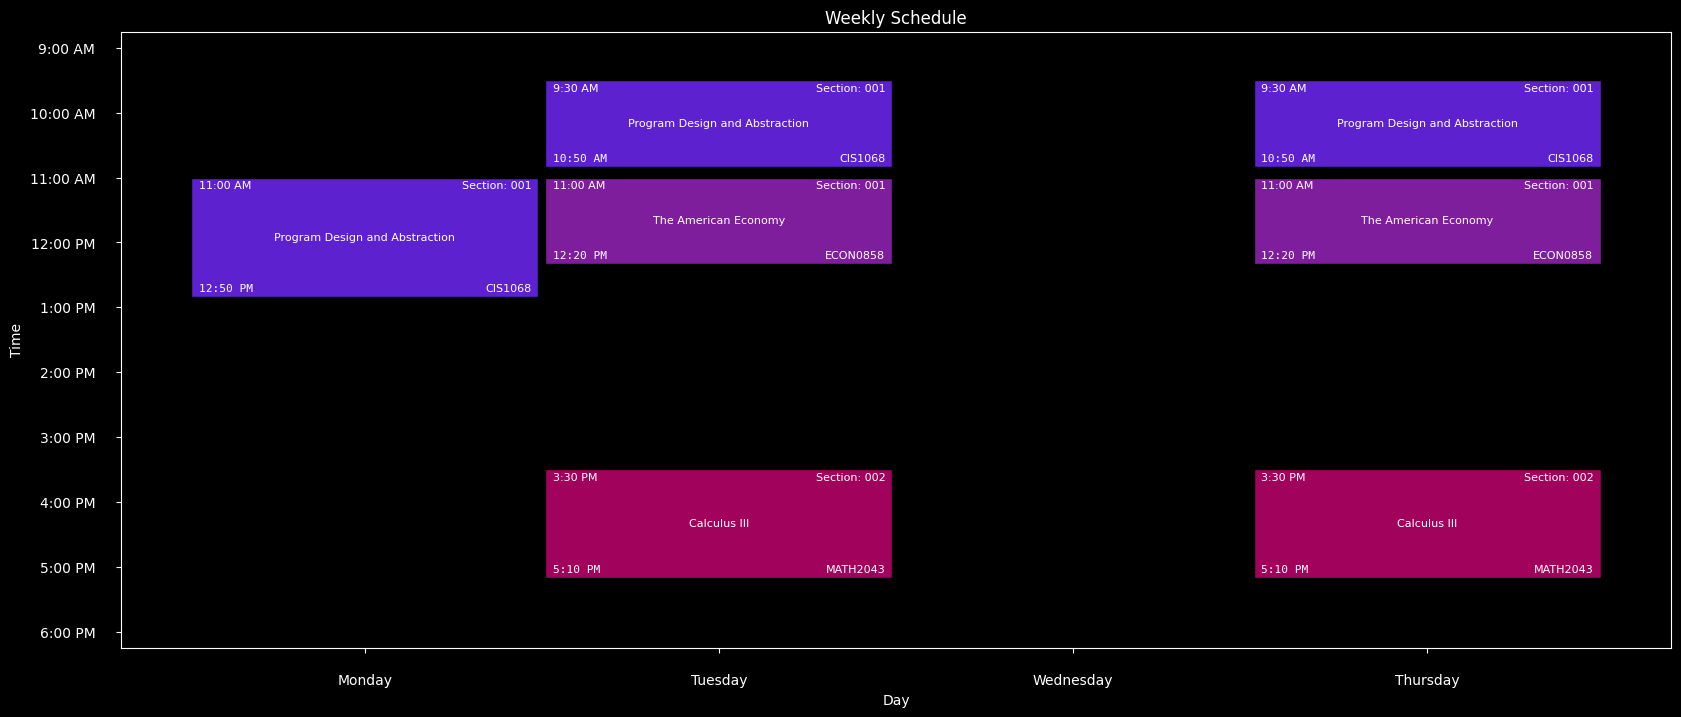

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


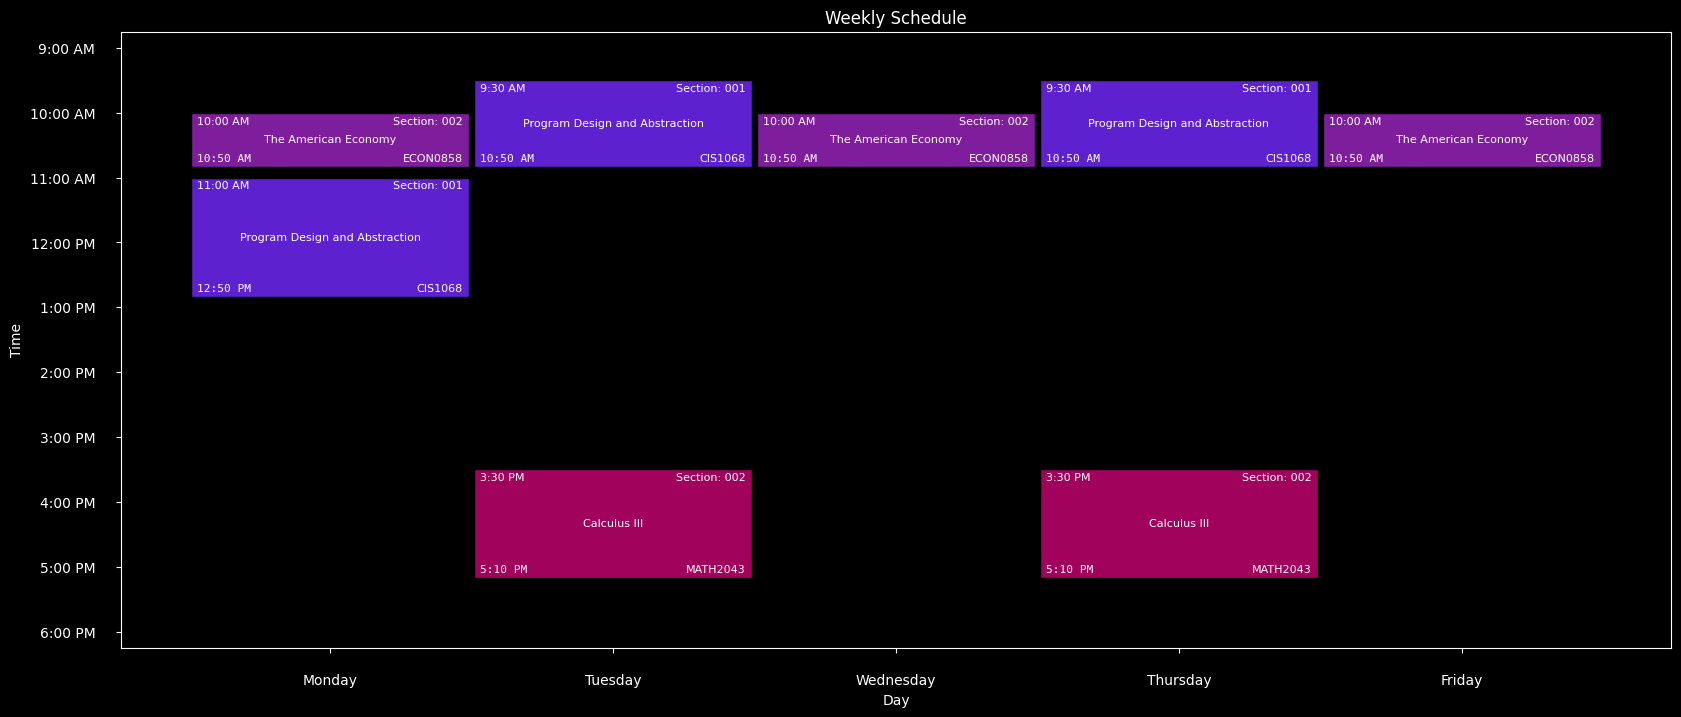

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


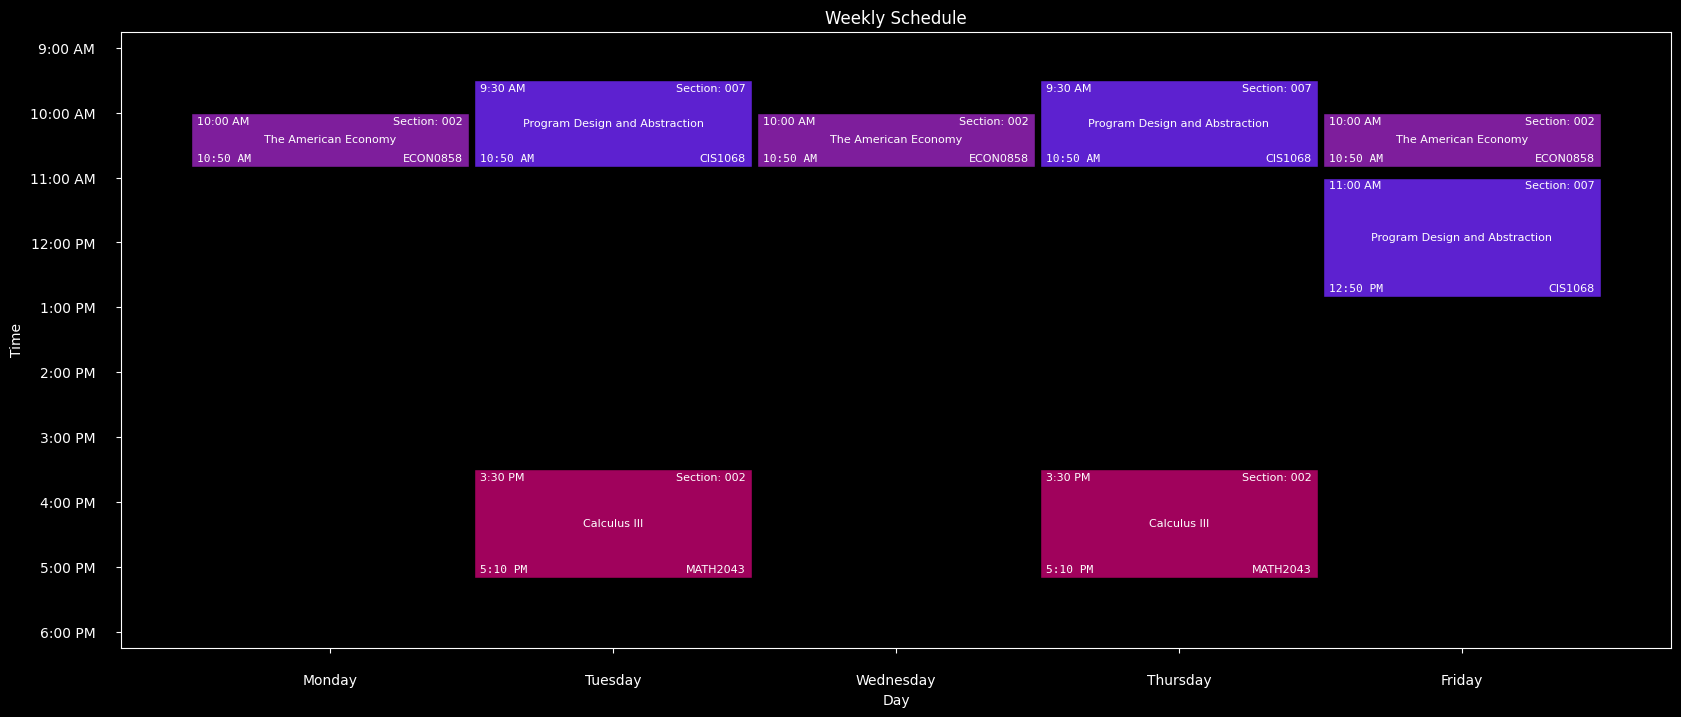

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


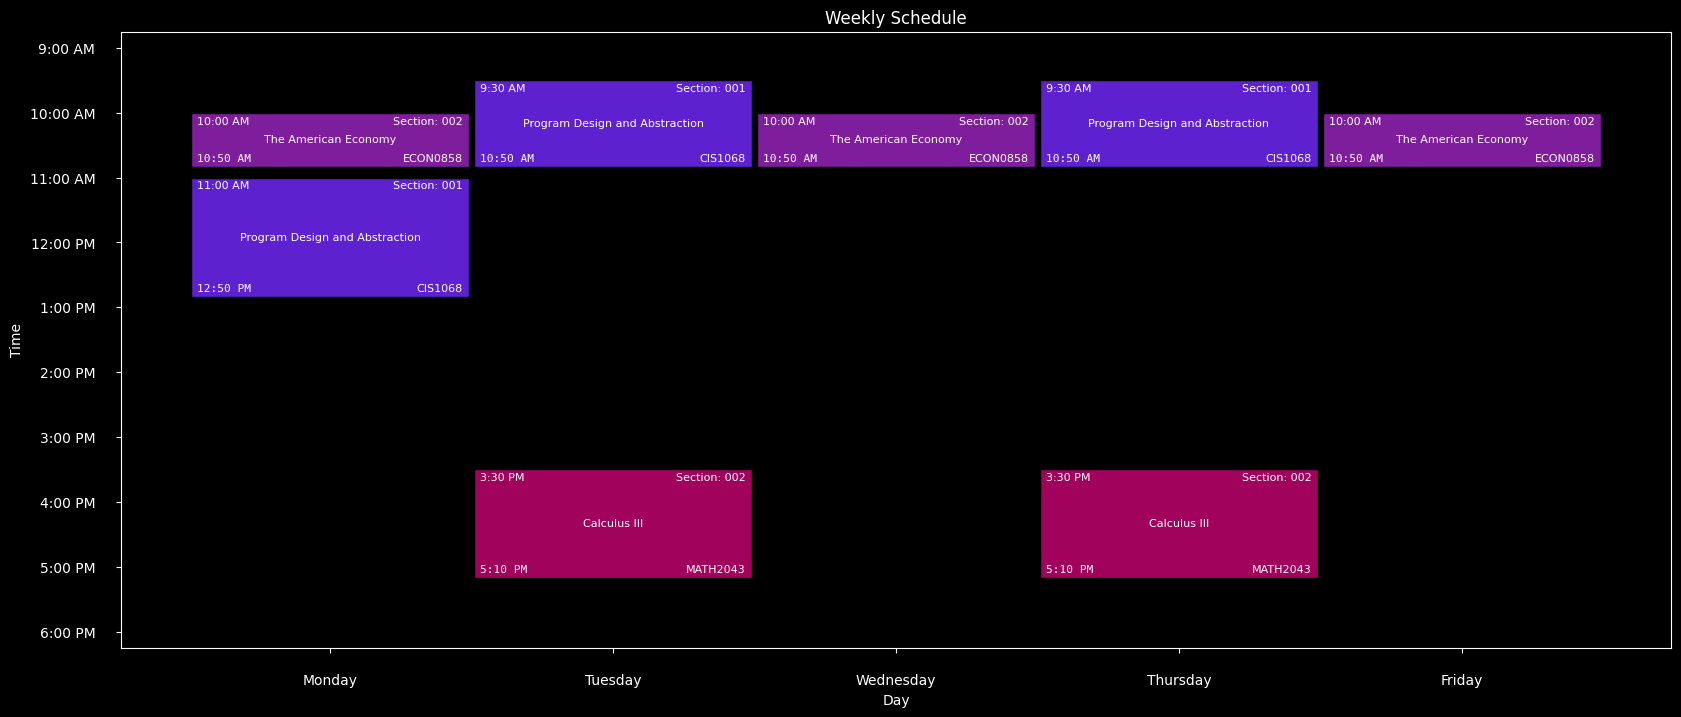

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


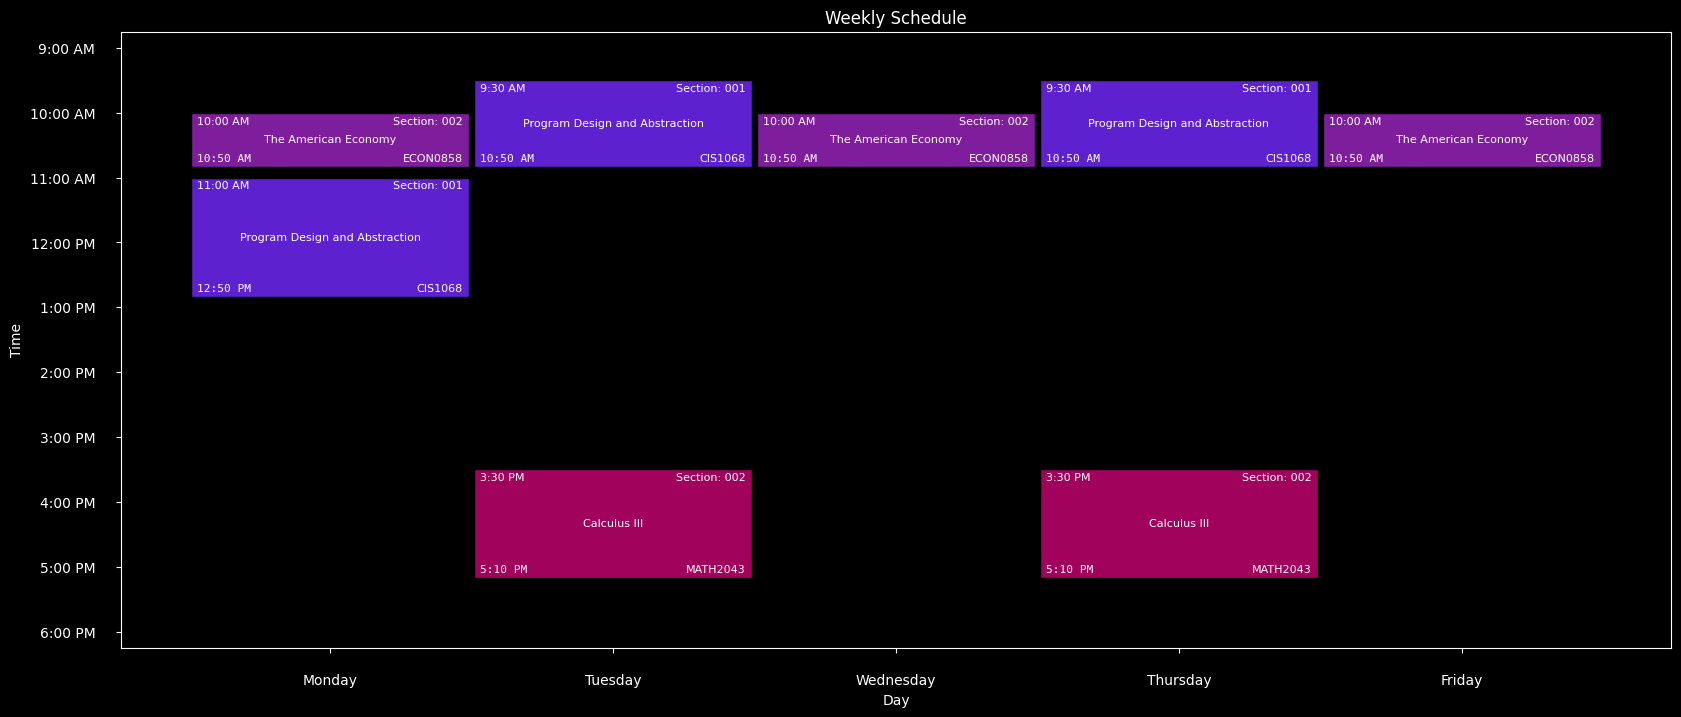

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


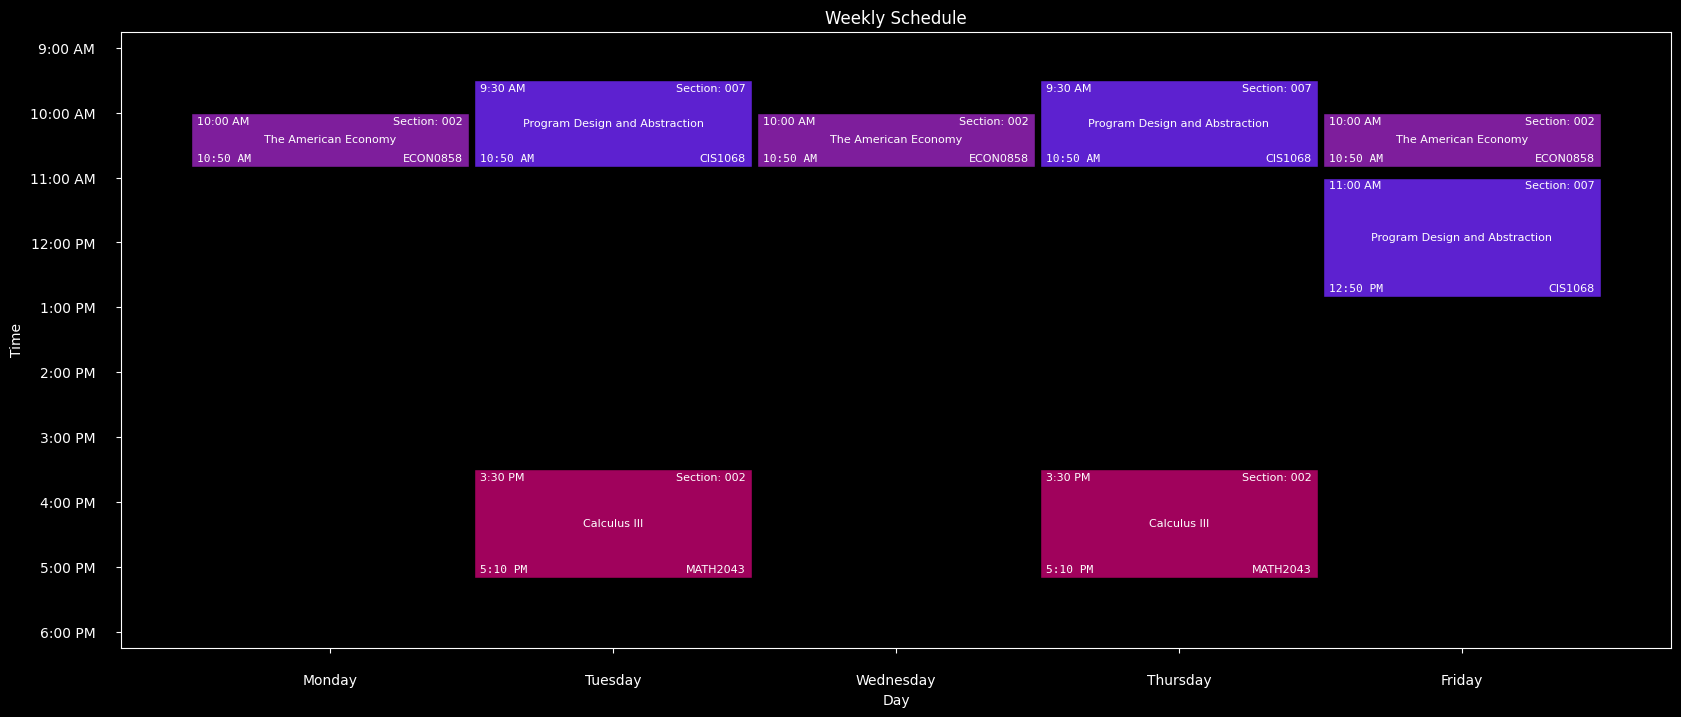

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


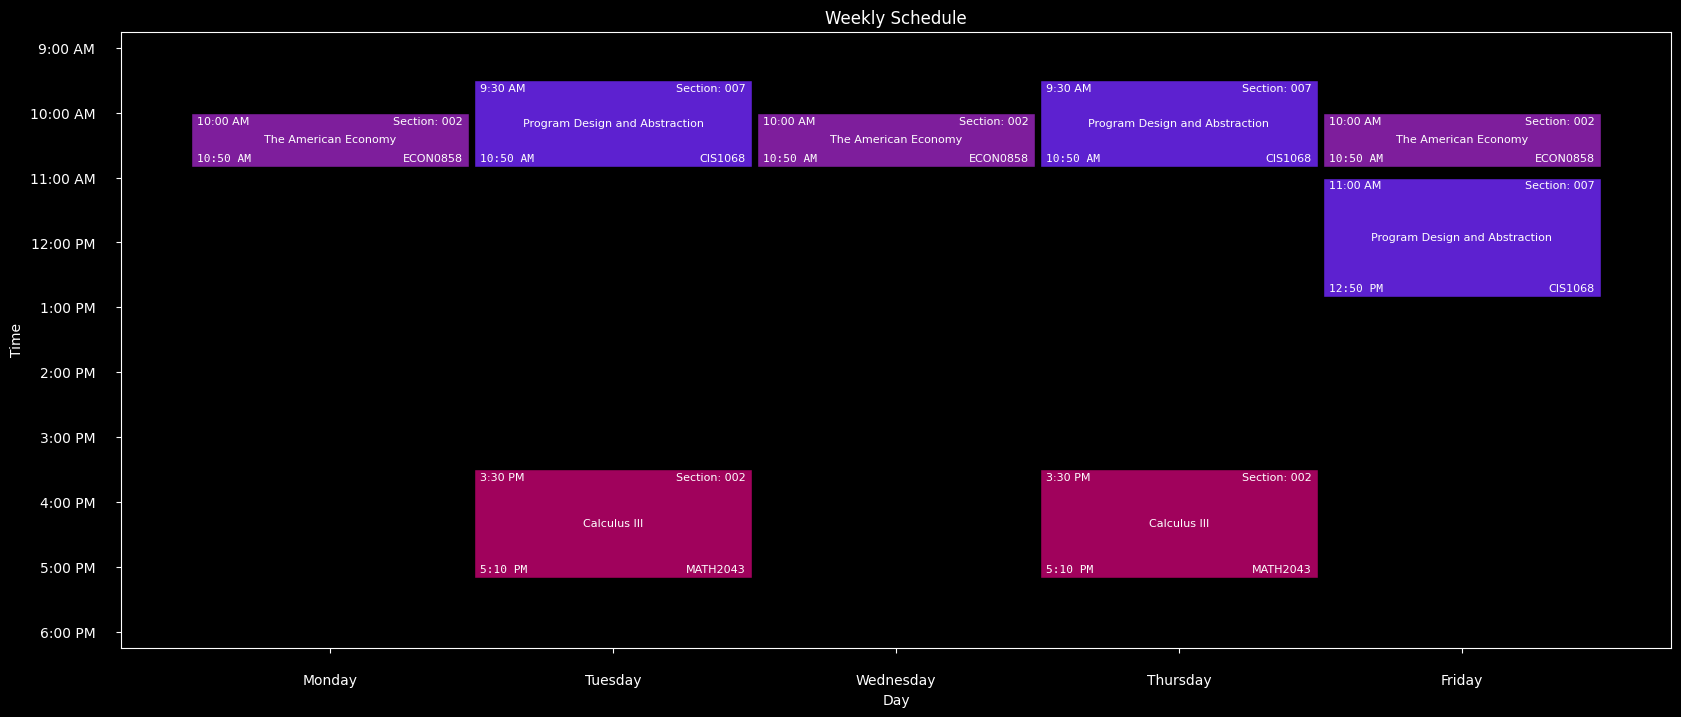

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


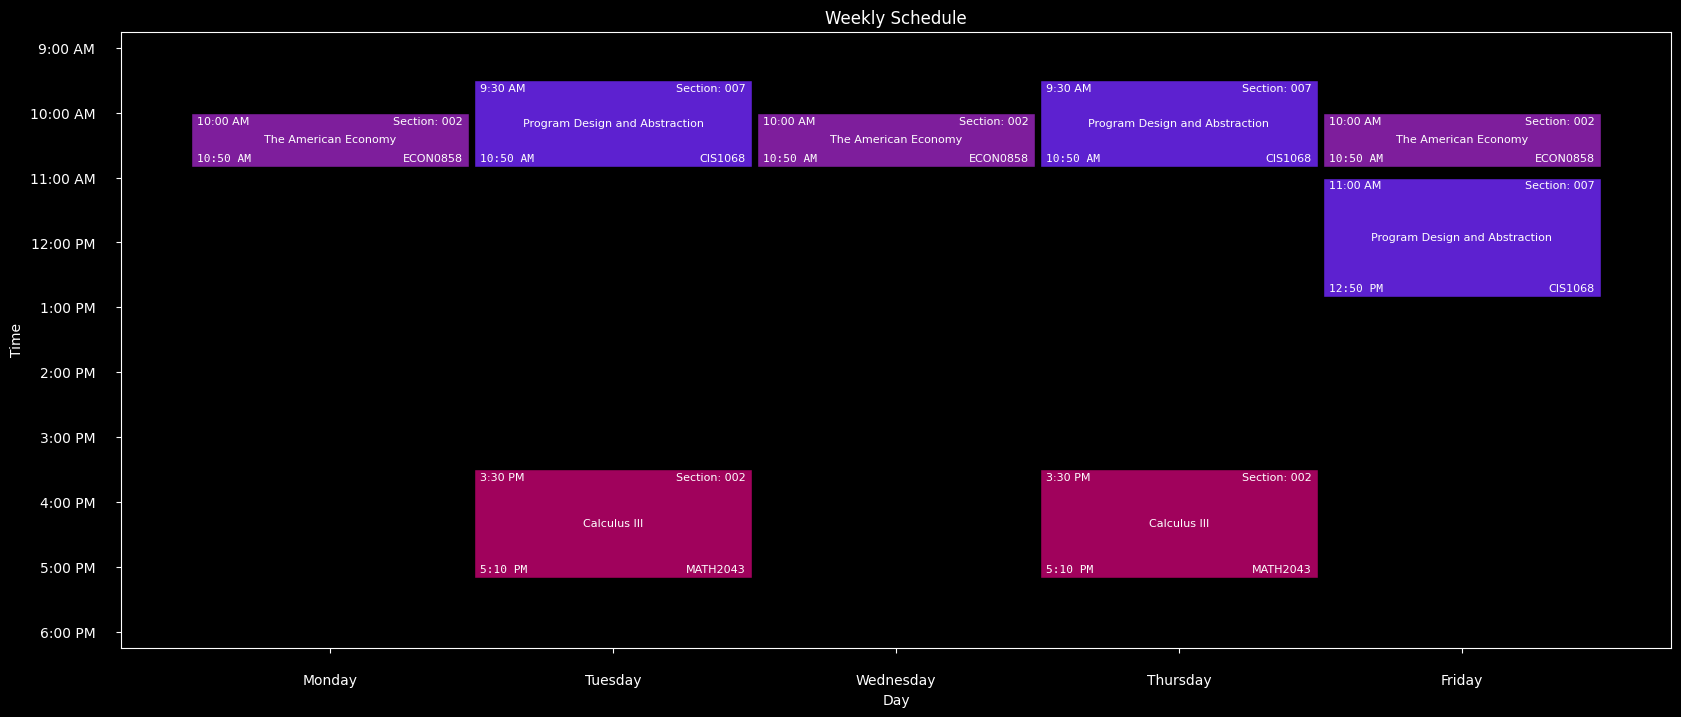

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


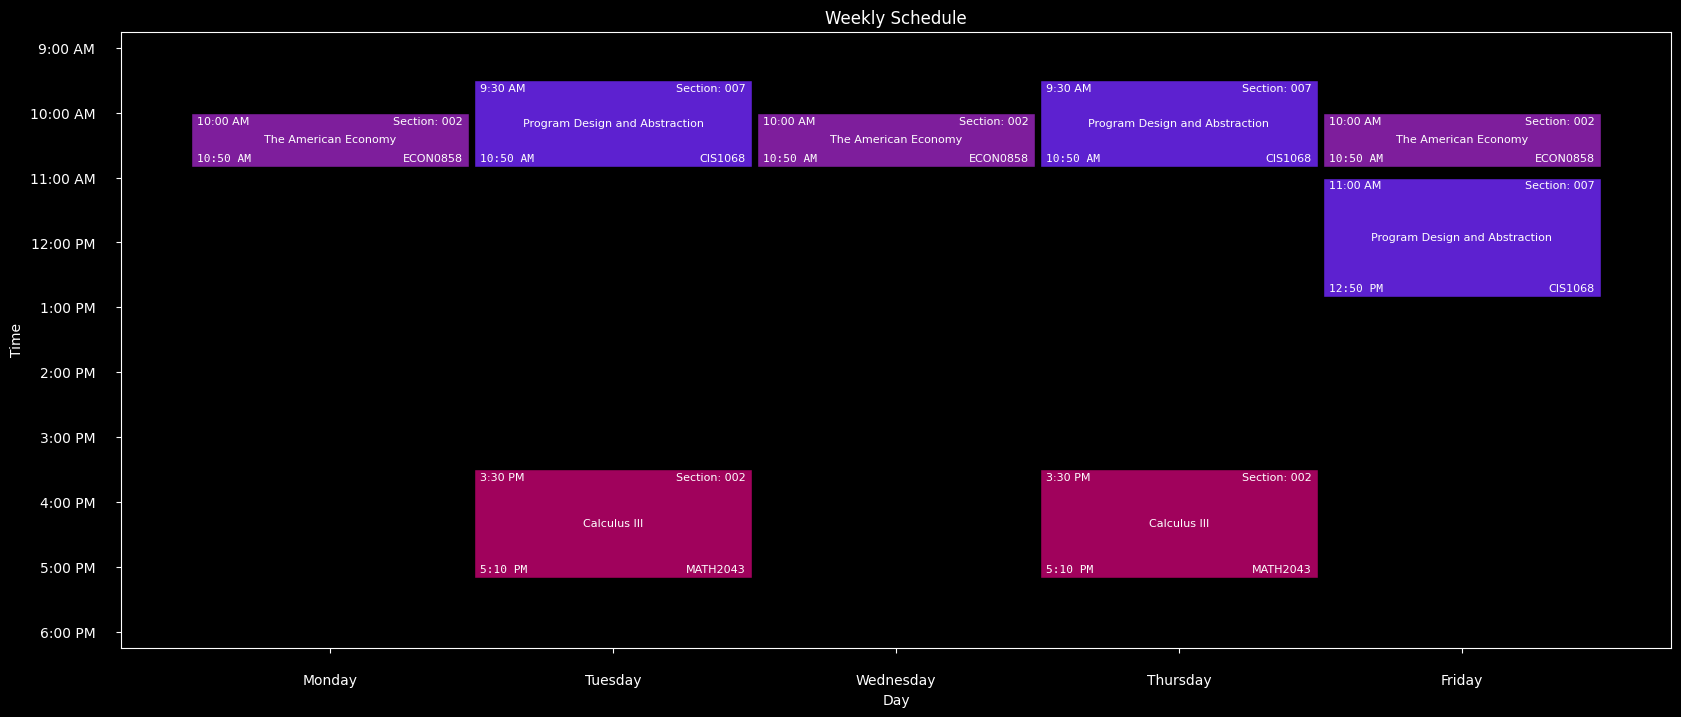

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 007 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


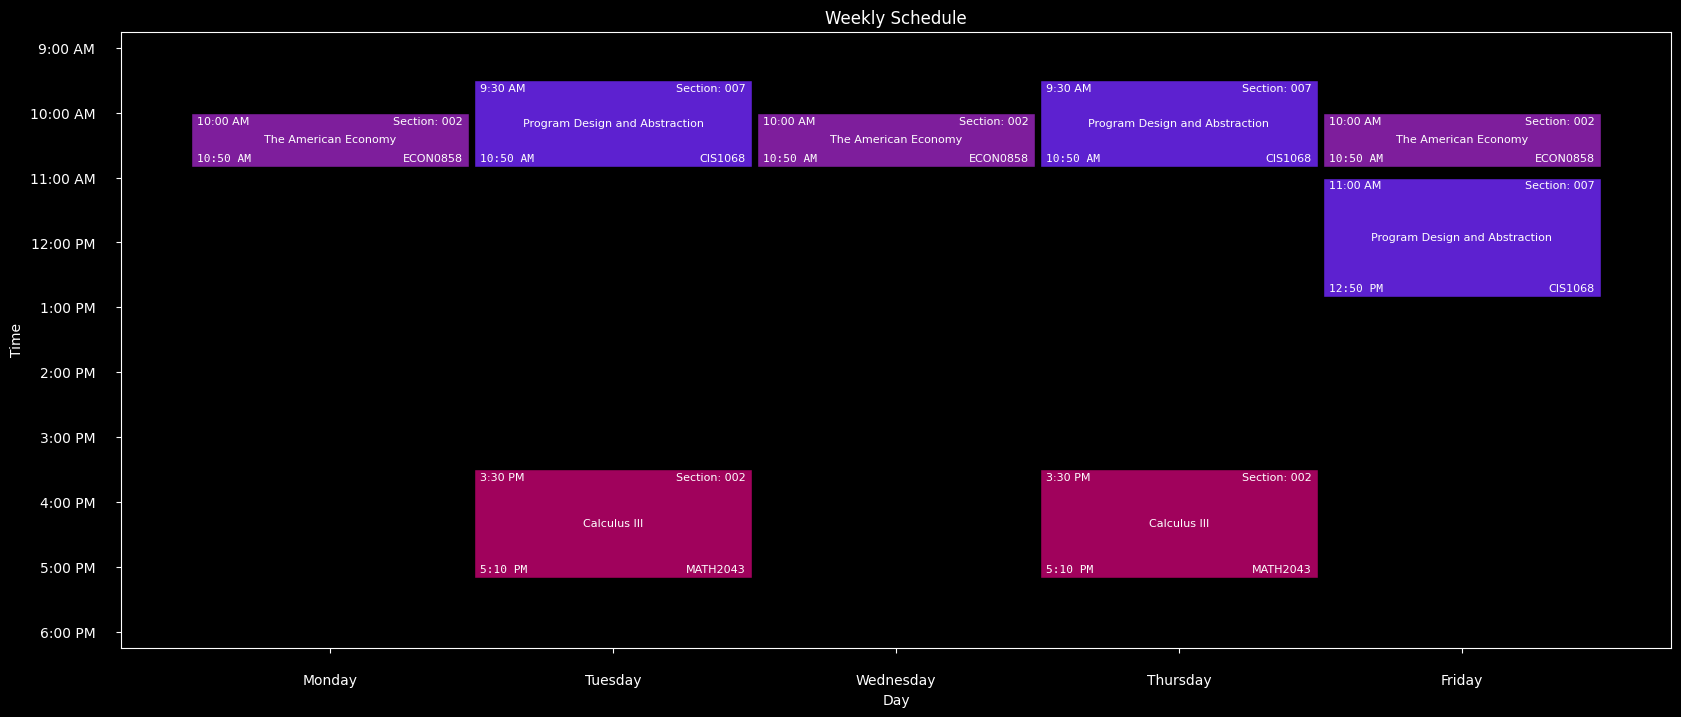

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


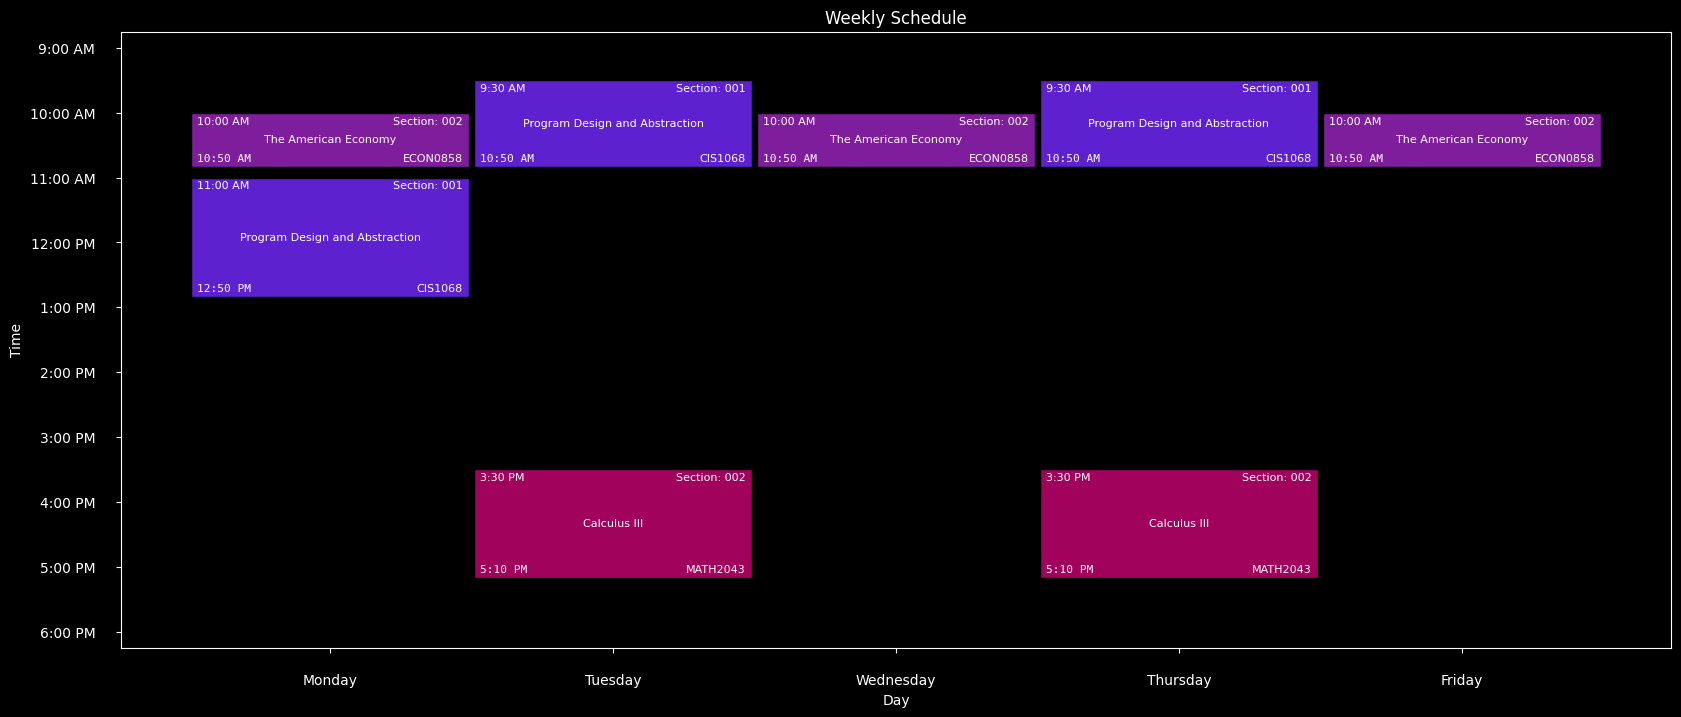

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


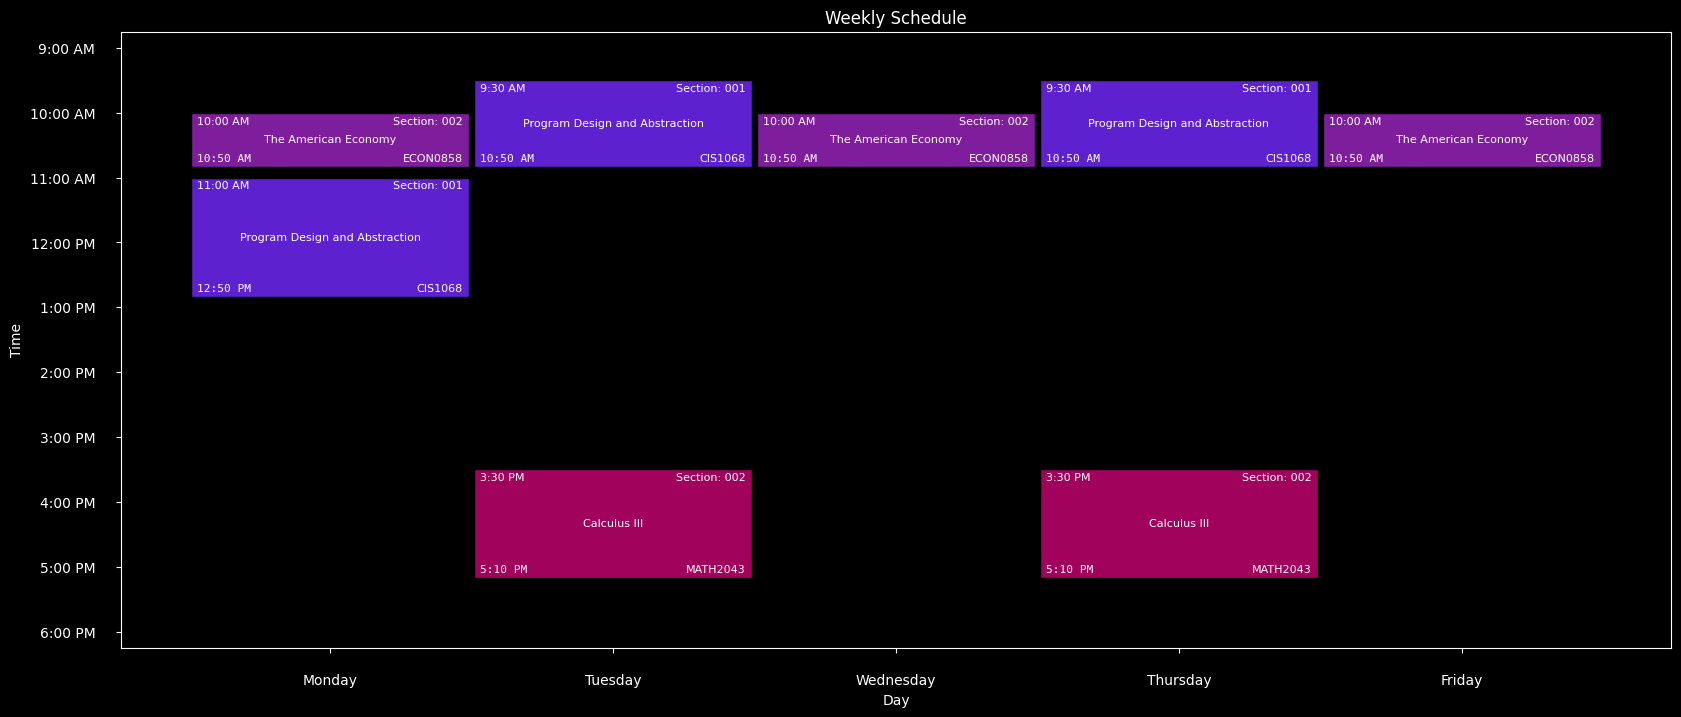

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 19.83 hrs, BREAK_TOTAL: 9.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 001 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


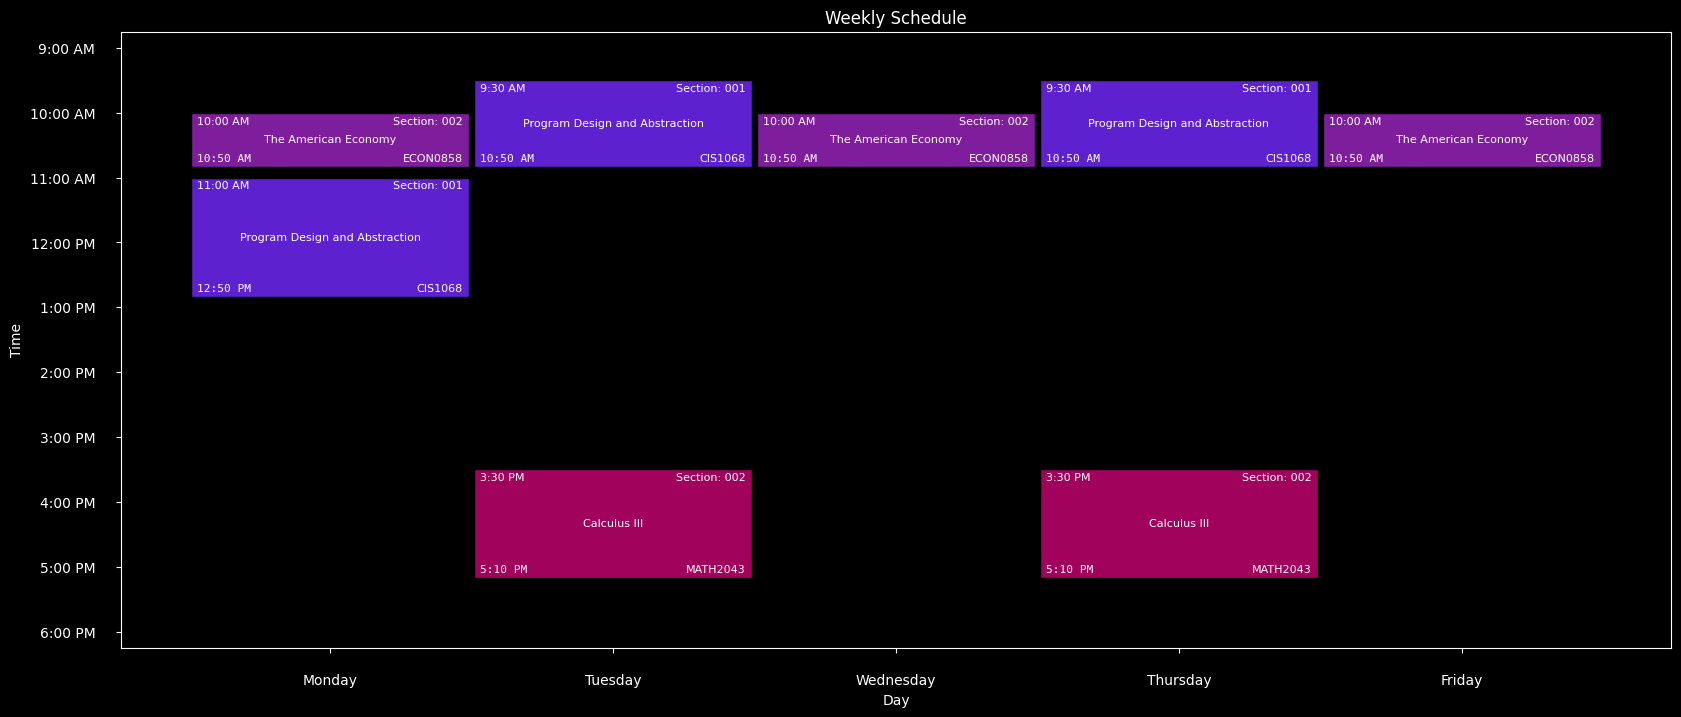

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 20.83 hrs, BREAK_TOTAL: 10.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


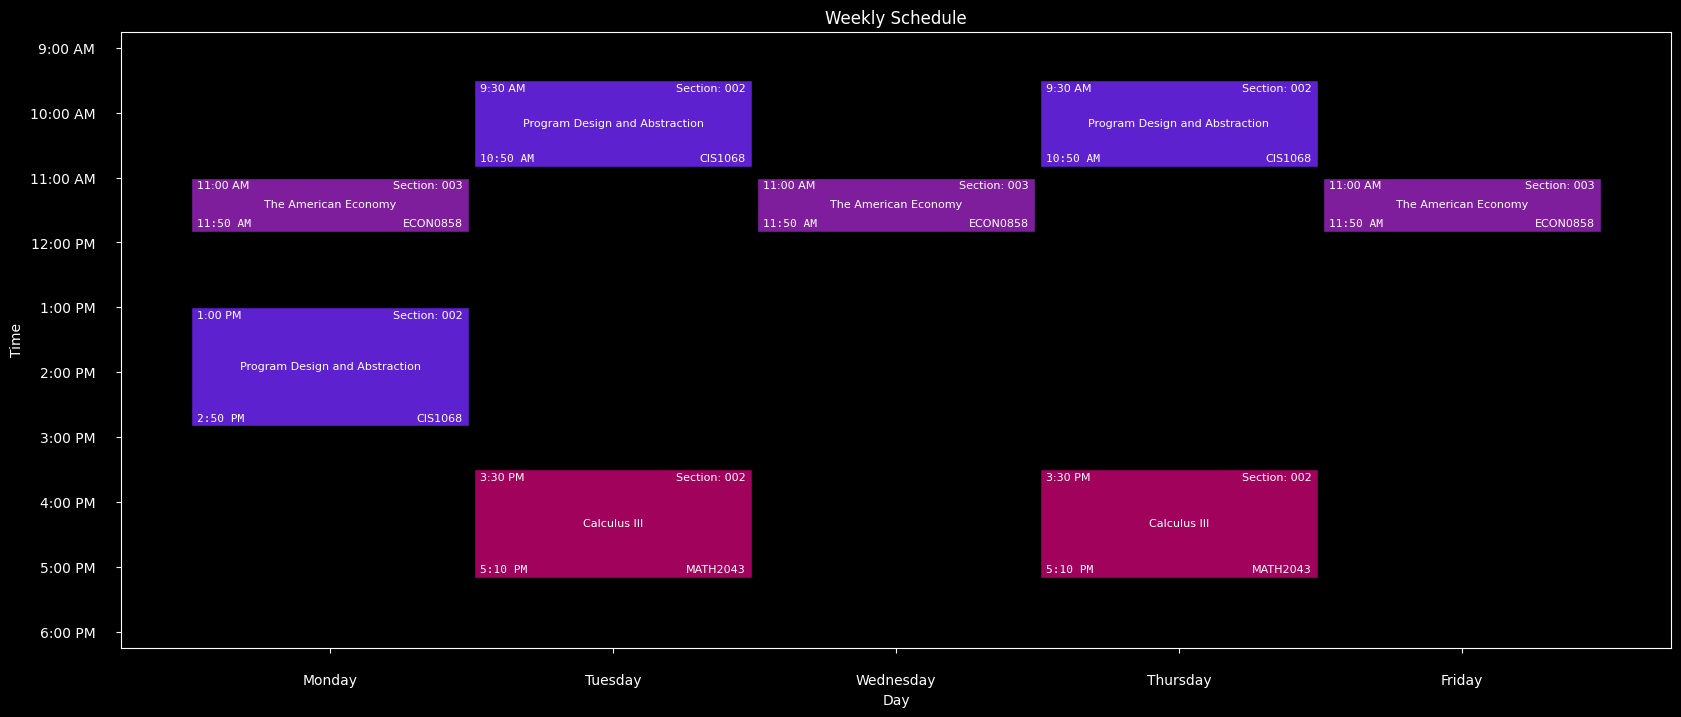

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 20.83 hrs, BREAK_TOTAL: 10.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


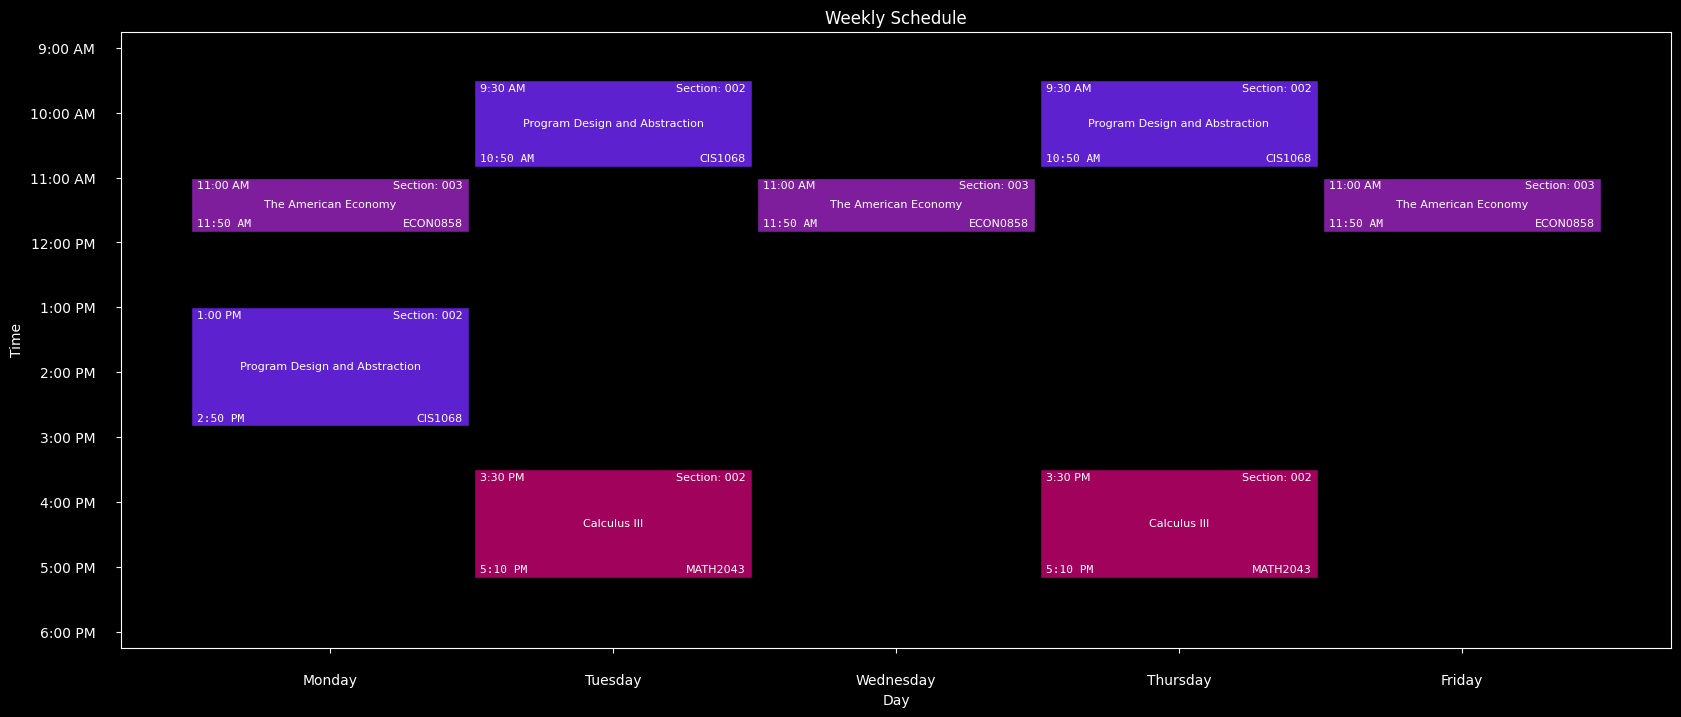

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 20.83 hrs, BREAK_TOTAL: 10.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


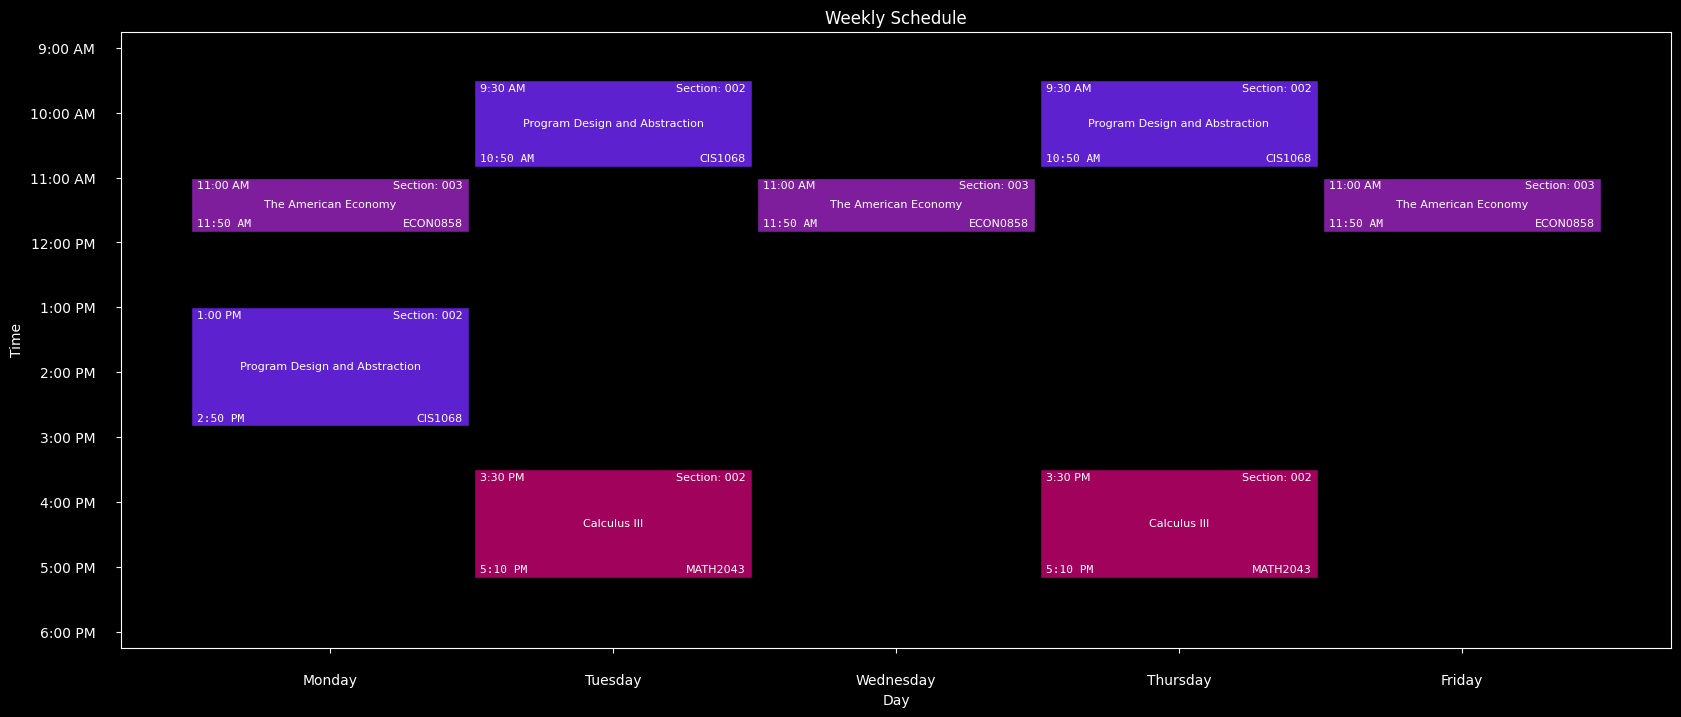

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 20.83 hrs, BREAK_TOTAL: 10.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


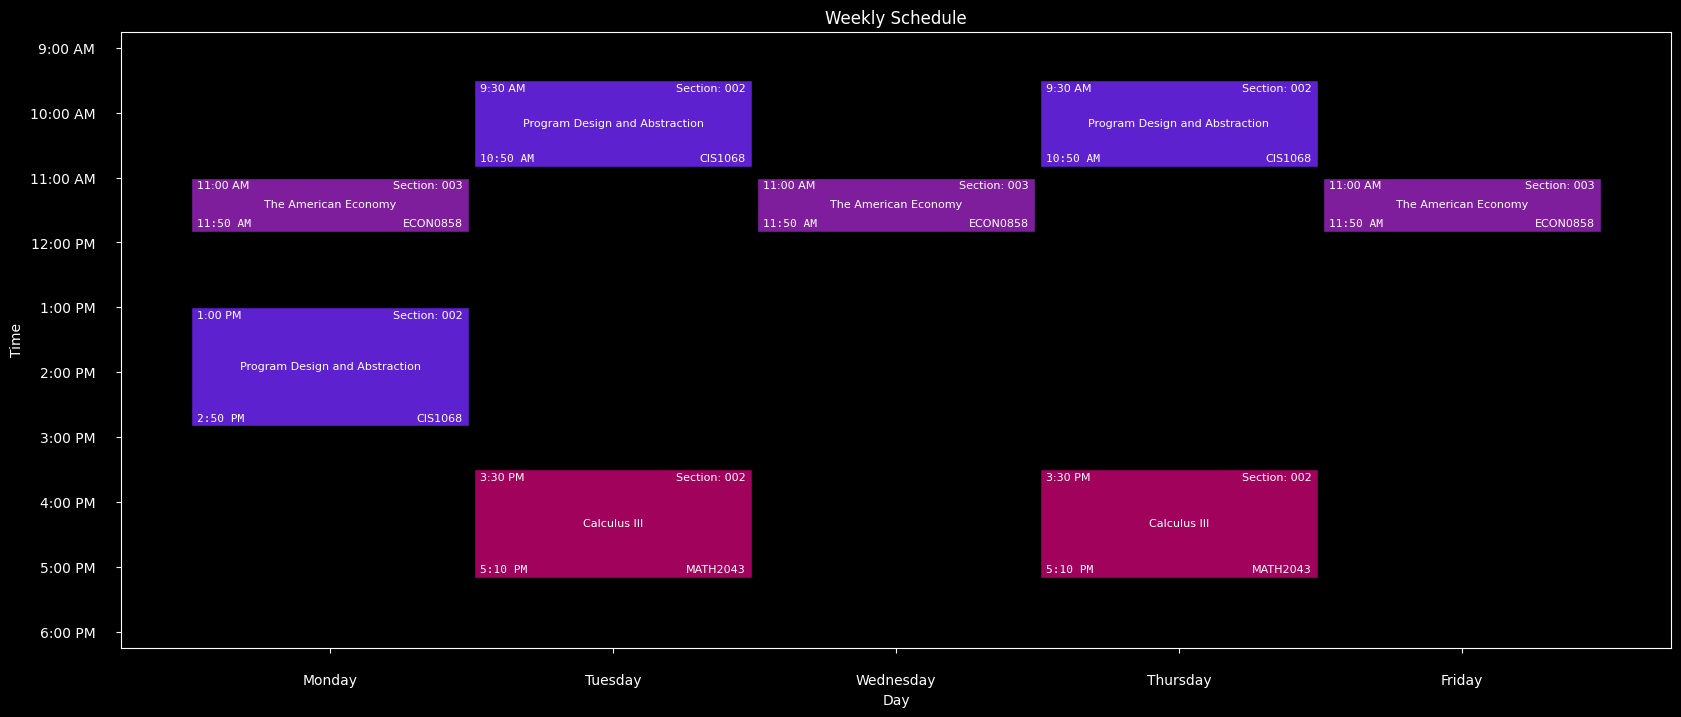

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 20.83 hrs, BREAK_TOTAL: 10.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


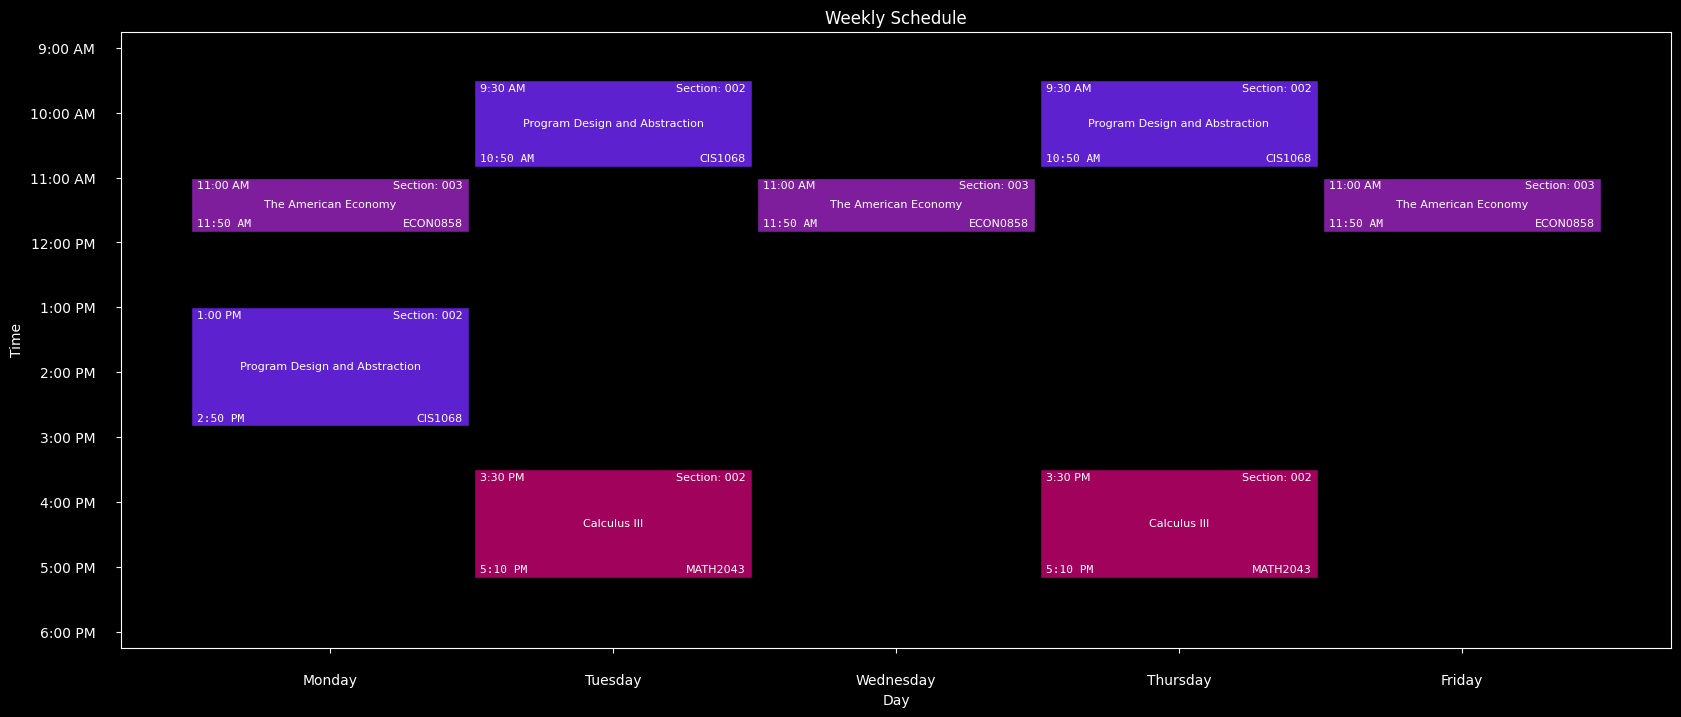

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 20.83 hrs, BREAK_TOTAL: 10.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 003 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


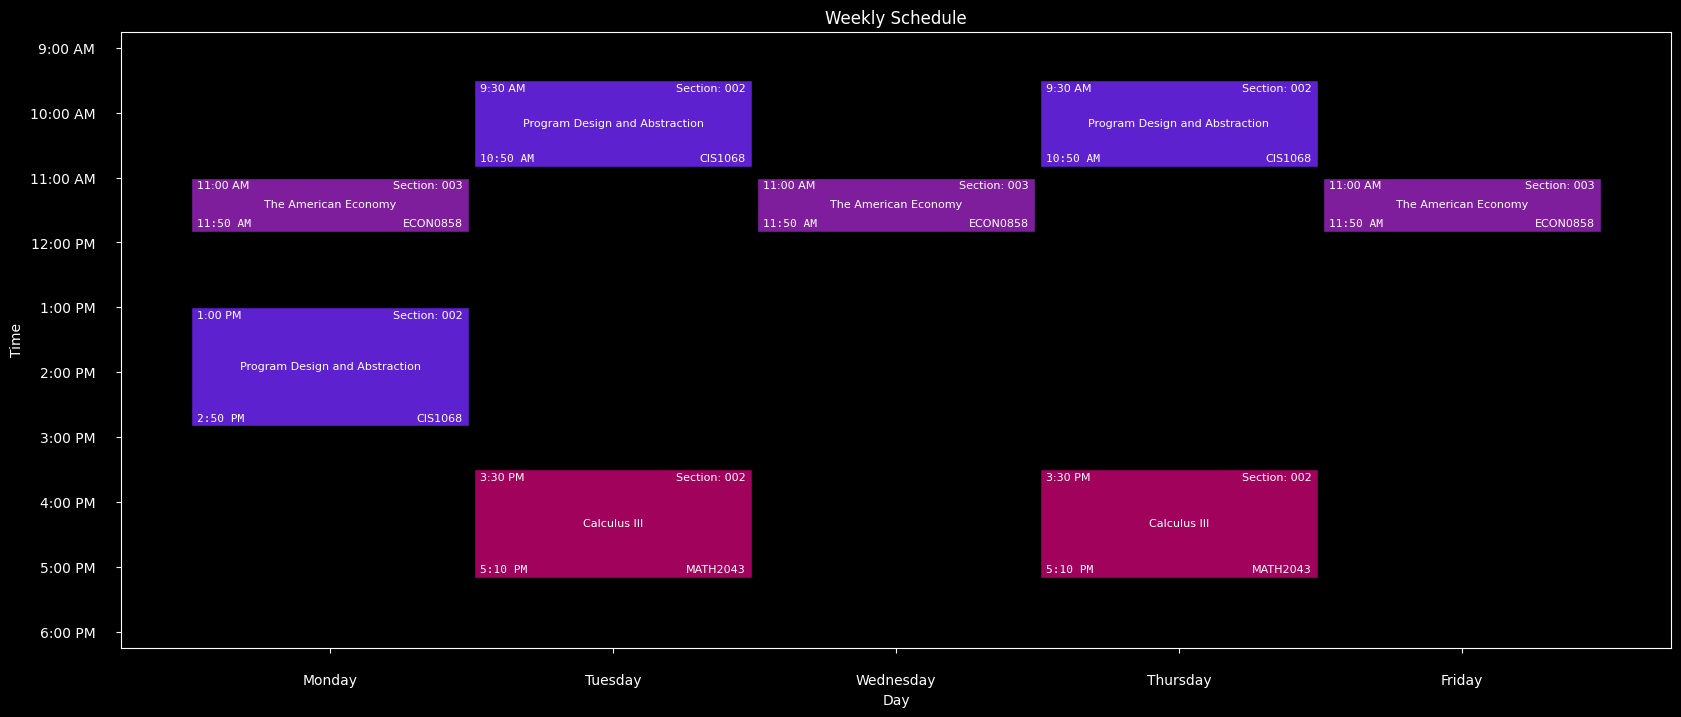

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 21.83 hrs, BREAK_TOTAL: 11.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 714 |  |  | Online | 3 |


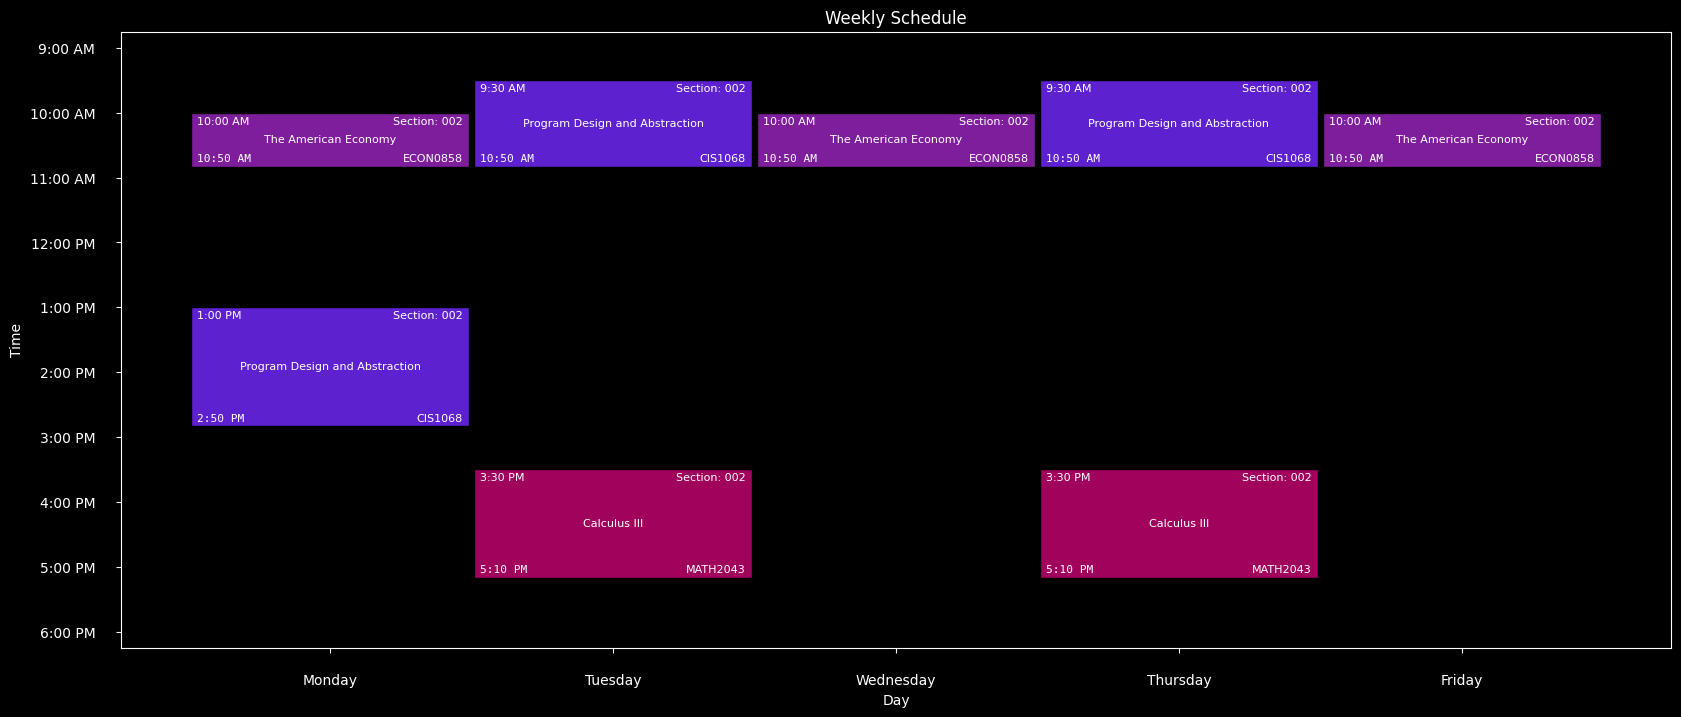

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 21.83 hrs, BREAK_TOTAL: 11.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 703 |  |  | Online | 3 |


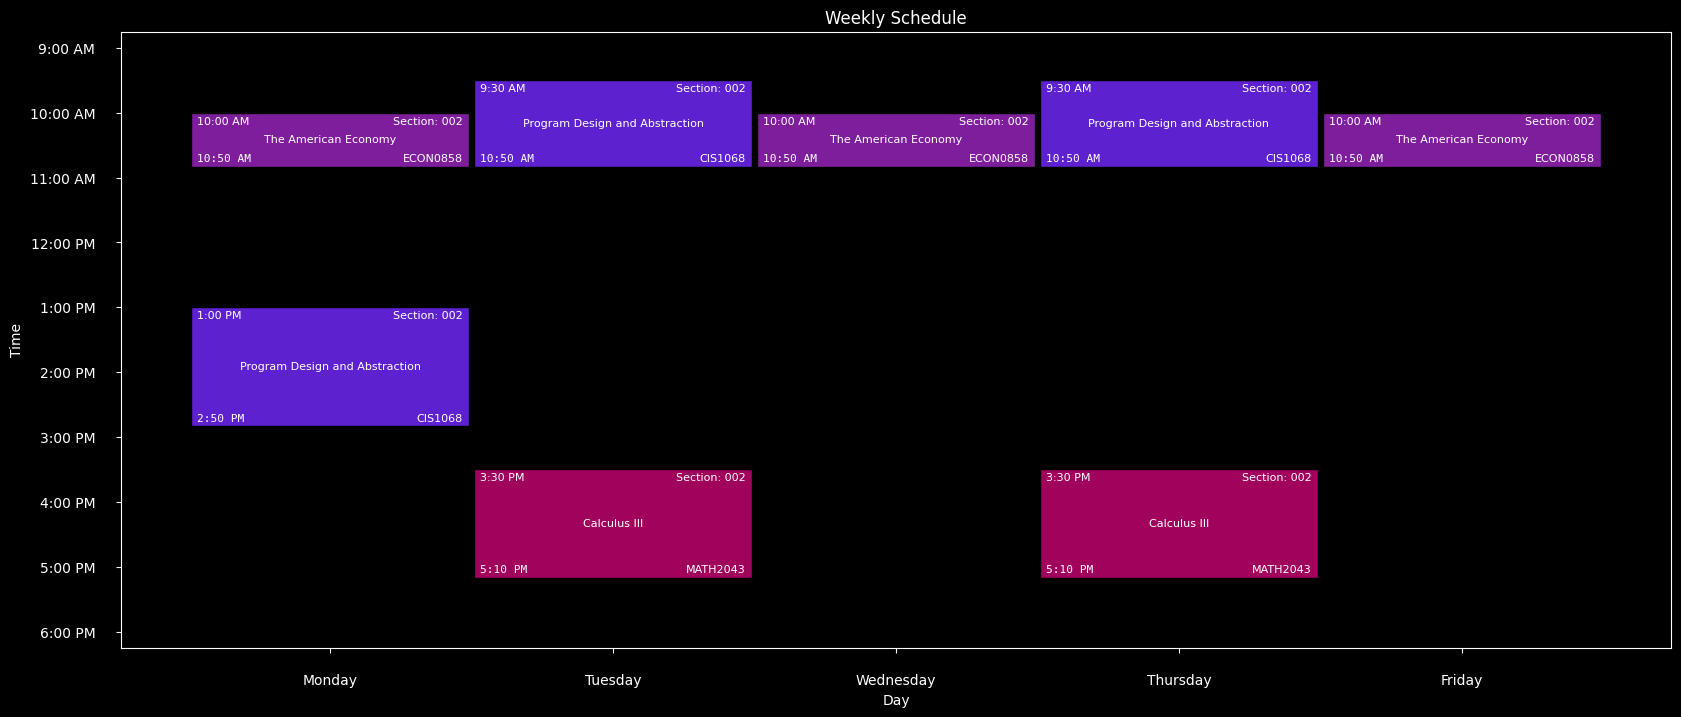

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 21.83 hrs, BREAK_TOTAL: 11.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 708 |  |  | Online | 3 |


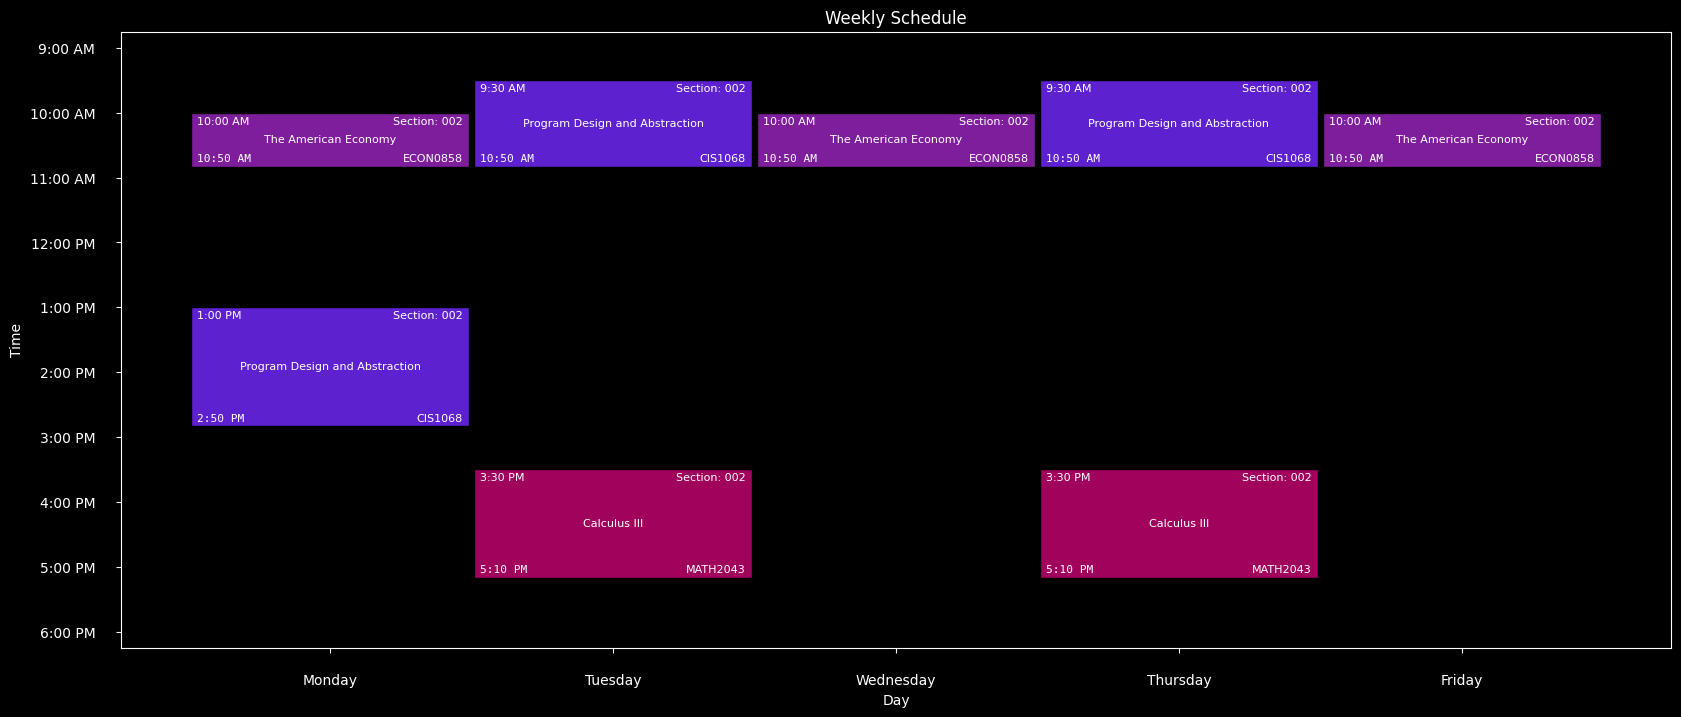

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 21.83 hrs, BREAK_TOTAL: 11.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 709 |  |  | Online | 3 |


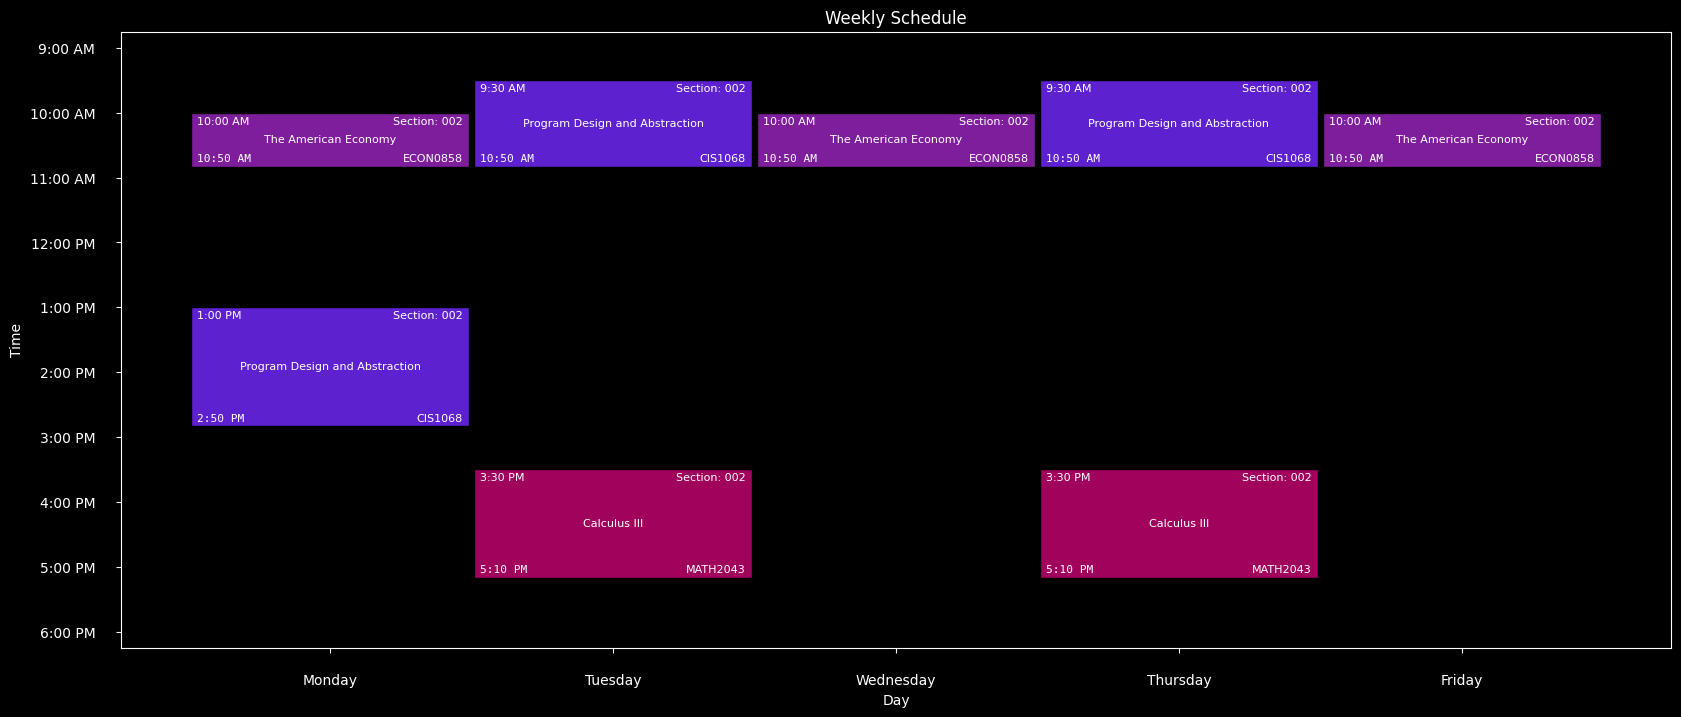

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 21.83 hrs, BREAK_TOTAL: 11.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 713 |  |  | Online | 3 |


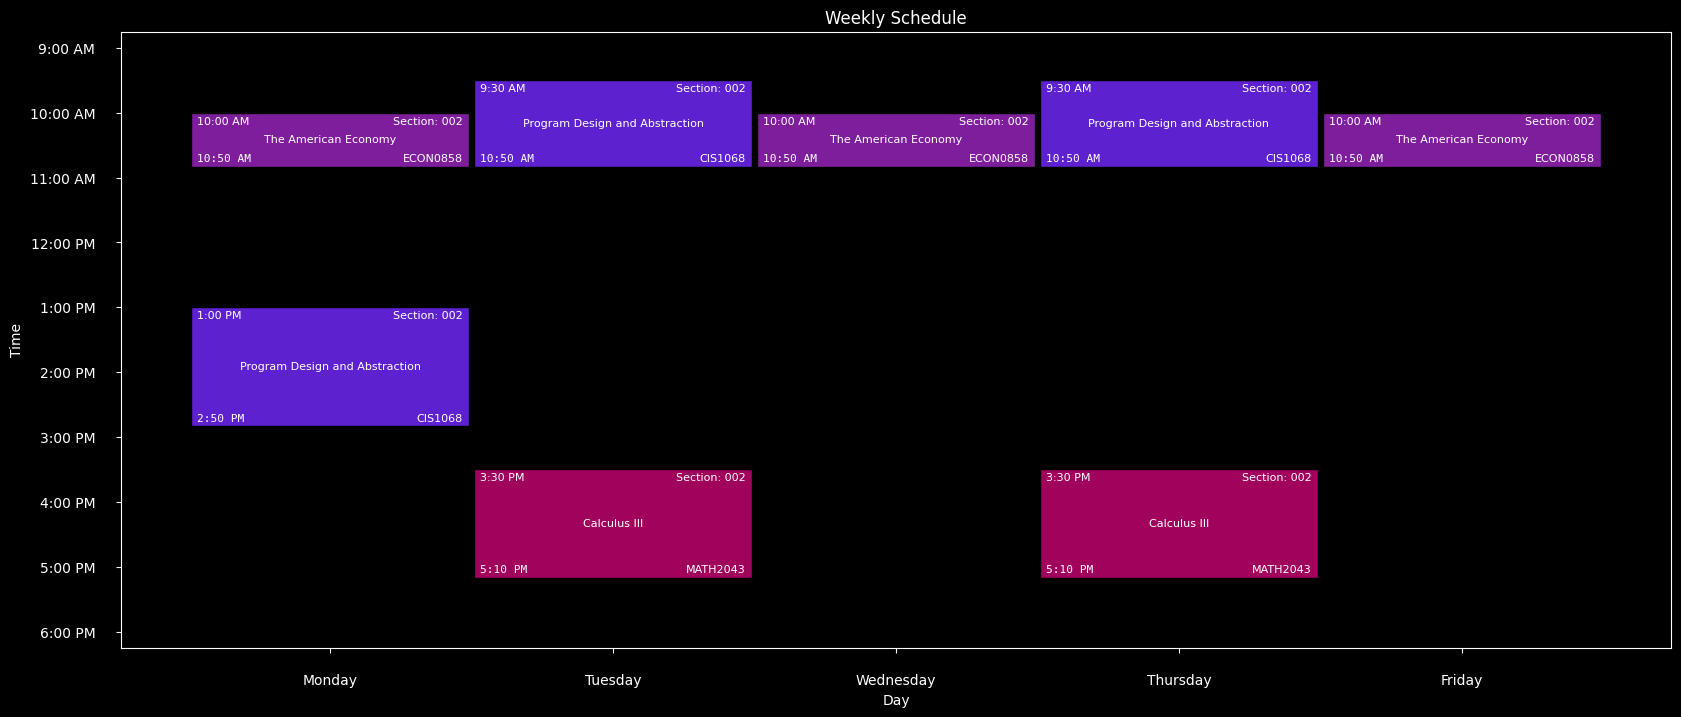

WEEK_RANGE: 7.67 hrs, WEEK_TOTAL: 21.83 hrs, BREAK_TOTAL: 11.50 hrs


| Class | Section | Teachers | Ratings | Type | Credits |
| --- | --- | --- | --- | --- | --- |
| CIS1068 | 002 | John Fiore | 4.40 | In-person | 4 |
| ECON0858 | 002 |  |  | In-person | 3 |
| MATH2043 | 002 |  |  | In-person | 4 |
| IH0851 | 715 |  |  | Online | 3 |


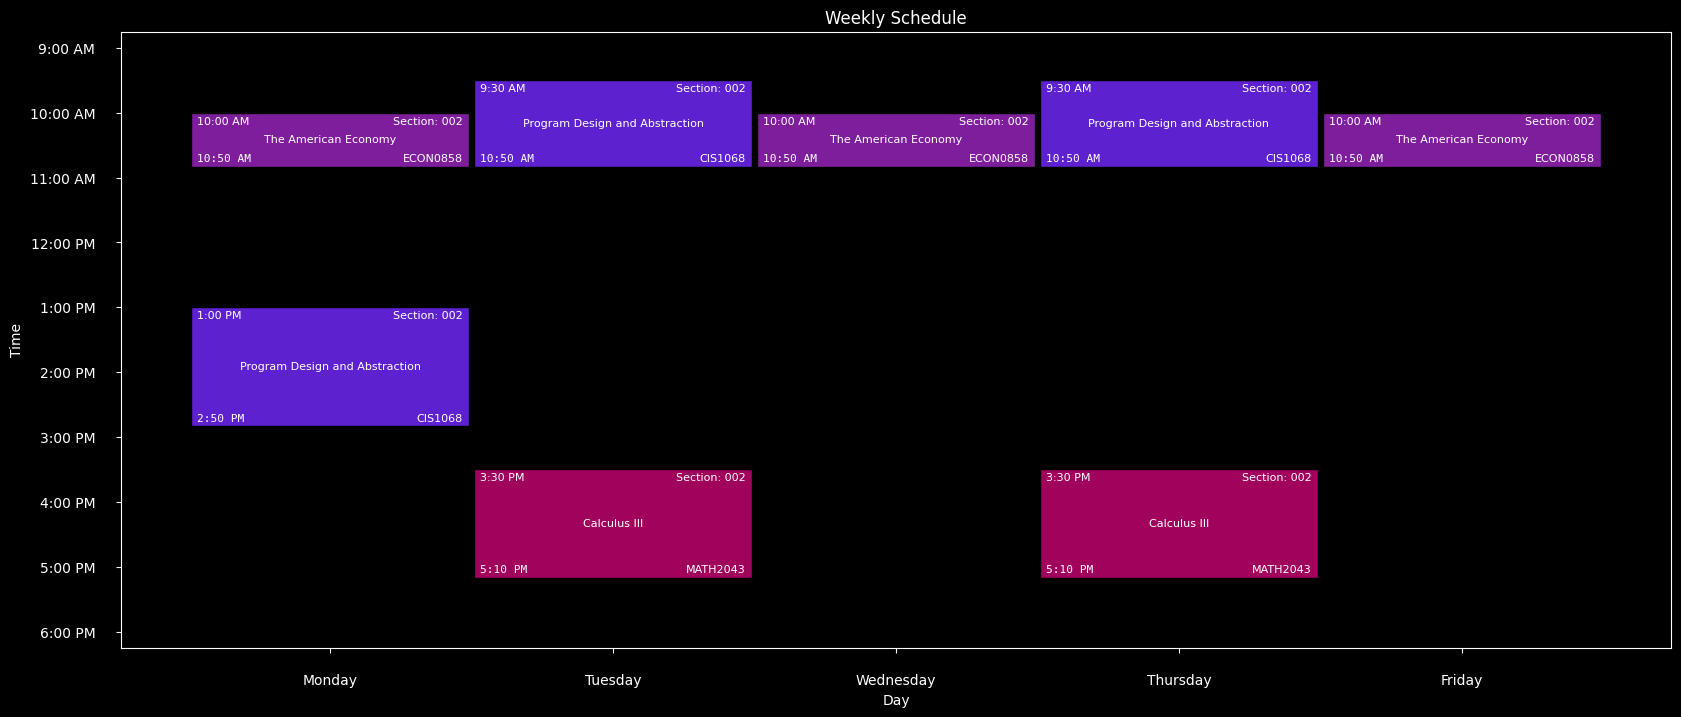

In [32]:
from IPython.display import Markdown, display

def render_table(headers: list[str], rows: list[list[str]]):
    # Create the header row
    md = "| " + " | ".join(headers) + " |\n"
    md += "| " + " | ".join(["---"] * len(headers)) + " |\n"  # Separator row

    # Add each row of data
    for row in rows:
        # Replace newline characters with <br> for Markdown rendering
        sanitized_row = [cell.replace("\n", "<br>") for cell in row]
        md += "| " + " | ".join(sanitized_row) + " |\n"

    display(Markdown(md))


for schedule in schedules:
    print(
        f"WEEK_RANGE: {ScheduleCompare.week_range(schedule):.2f} hrs, "
        f"WEEK_TOTAL: {ScheduleCompare.week_total(schedule):.2f} hrs, "
        f"BREAK_TOTAL: {ScheduleCompare.between_total(schedule):.2f} hrs"
    )

    rows = []

    for cls in {_class.subject_course: _class for _class in [*schedule.classes["normal"], *schedule.classes["online"]]}.values():
        rows.append(
            (
                cls.subject_course,
                cls.section,
                ("\n").join([f"{teacher.first_name} {teacher.last_name}" for teacher in cls.get_teachers()]),
                ("\n").join([f"{teacher.avg_rating_rounded:.2f}" for teacher in cls.get_teachers()]),
                "In-person" if cls.info["instructionalMethod"] == "CLAS" else "Online",
                str(cls.info["creditHourLow"]),
            )
        )

    render_table(["Class", "Section", "Teachers", "Ratings", "Type", "Credits"], rows)

    schedule.show()